# Problem Statement

<font color=darkblue>In business, it is crucial to understand customers'needs and desire in order to provide optimize their customer journey and maximize their potential value to our business. In order to do so, we firstly need to segment our customers into groups that share something in common. With that, only we are able to curate products and services that cater to their needs.<br><br>
Conventional method practice of customer segmentation includes using RFM analysis, customers are assigned a ranking number of 1,2,3,4, or 5 (with 5 being highest) for each RFM parameter. The three scores together are referred to as an RFM "cell" . The database is sorted to determine which customers were "the best customers" in the past, with a cell ranking of "555" being ideal.<br><br>
However, in this project uses unsupervised machine learning approach ie DBSCan,KMean clsutering to segment customers into different groups using other features on top of based on customers RFM score .

# Import Library

In [1]:
# pip install graphviz

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import math
import os
import pydotplus
from IPython.display import Image  
from datetime import datetime

pd.options.display.float_format = '{:.2f}'.format

from datetime import datetime
from datetime import timedelta 

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs, make_moons
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist



from sklearn.decomposition import PCA

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)



from sklearn import tree
import graphviz

<font color=darkblue> Click here to [here](./Data_Cleaning.ipynb) for Data Cleaning Notebook and [here](./EDA.ipynb) for EDA.

# Import Cleaned Transactional Data

In [3]:
# Read Cleaned DataFrame
customer_df=pd.read_csv('../datasets/customer_df.csv')
customer_df.head()

Customer ID  Inv_Count  No_of_Months_Transac  \
0     12346.00         12                     5   
1     12347.00          8                     8   
2     12348.00          5                     5   
3     12349.00          4                     4   
4     12350.00          1                     1   

                                         Unique MMYY         Country  \
0     ['Dec 09' 'Jan 10' 'Mar 10' 'Jun 10' 'Jan 11']  United Kingdom   
1  ['Oct 10' 'Dec 10' 'Jan 11' 'Apr 11' 'Jun 11' ...         Iceland   
2     ['Sep 10' 'Dec 10' 'Jan 11' 'Apr 11' 'Sep 11']         Finland   
3              ['Apr 10' 'May 10' 'Oct 10' 'Nov 11']           Italy   
4                                         ['Feb 11']          Norway   

   Total_Qty  Number_of_Item_Types  Total_Spending  Max_Item_UnitPrice  \
0      74285                    26        77556.46                7.49   
1       2967                   126         4921.53               12.75   
2       2714                    28         2019.40               40.00   
3       1624                   145         4428.69              300.00   
4        197                    17          334.40               40.00   

   Min_Item_UnitPrice  Median_Item_UnitPrice Last_Purchase_Date  \
0                1.00                   7.49         2011-01-18   
1                0.25                   1.95         2011-12-07   
2                0.29                   0.55         2011-09-25   
3                0.42                   2.55         2011-11-21   
4                0.85                   1.65         2011-02-02   

  First_Purchase_Date  Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
0          2009-12-14                     0.48               3102.26   
1          2010-10-31                     0.32                196.86   
2          2010-09-27                     0.20                 80.78   
3          2010-04-29                     0.16                177.15   
4          2011-02-02                     0.04                 13.38   

   Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
0                              2.40                       15511.29   
1                              1.00                         615.19   
2                              1.00                         403.88   
3                              1.00                        1107.17   
4                              1.00                         334.40   

   Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  Avg_Item_Types_Per_Inv  \
0               6463.04                   6190.42                    2.17   
1                615.19                    370.88                   15.75   
2                403.88                    542.80                    5.60   
3               1107.17                    406.00                   36.25   
4                334.40                    197.00                   17.00   

   Recency  Frequency  Monetary  Tenure  Recency_Score  Frequency_Score  \
0      326         12  77556.46     726              2                5   
1        3          8   4921.53     405              5                4   
2       76          5   2019.40     439              3                4   
3       19          4   4428.69     590              5                3   
4      311          1    334.40     311              2                1   

   Monetary_Score  Tenure_Score  RFM_Score  Customer_Country_Belgium  \
0               5             5        255                         0   
1               5             2        545                         0   
2               4             3        344                         0   
3               5             3        535                         0   
4               2             2        212                         0   

   Customer_Country_France  Customer_Country_Germany  Customer_Country_Italy  \
0                        0                         0                       0   
1                        0                         0  

## RMF Value as Features

In [4]:
# RFM Value as Features

rfm_data=customer_df[['Customer ID','Recency','Frequency','Monetary']]
rfm_data.set_index('Customer ID',inplace=True)
rfm_data.head()

Recency  Frequency  Monetary
Customer ID                              
12346.00         326         12  77556.46
12347.00           3          8   4921.53
12348.00          76          5   2019.40
12349.00          19          4   4428.69
12350.00         311          1    334.40

## Customer Feature

In [5]:
# Read Cleaned DataFrame
customer_feat=pd.read_csv('../datasets/customer_feat.csv')
customer_feat.set_index('Customer ID',inplace=True)
customer_feat.head()

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
Customer ID                                                          
12346.00                        5      74285                    26   
12347.00                        8       2967                   126   
12348.00                        5       2714                    28   
12349.00                        4       1624                   145   
12350.00                        1        197                    17   

             Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
Customer ID                                                                  
12346.00                   7.49                1.00                   7.49   
12347.00                  12.75                0.25                   1.95   
12348.00                  40.00                0.29                   0.55   
12349.00                 300.00                0.42                   2.55   
12350.00                  40.00                0.85                   1.65   

            Last_Purchase_Date First_Purchase_Date  Avg_Transaction_Per_Mth  \
Customer ID                                                                   
12346.00            2011-01-18          2009-12-14                     0.48   
12347.00            2011-12-07          2010-10-31                     0.32   
12348.00            2011-09-25          2010-09-27                     0.20   
12349.00            2011-11-21          2010-04-29                     0.16   
12350.00            2011-02-02          2011-02-02                     0.04   

             Avg_Spending_Per_Mth  Ratio_Transaction_Per_Unique_Mth  \
Customer ID                                                           
12346.00                  3102.26                              2.40   
12347.00                   196.86                              1.00   
12348.00                    80.78                              1.00   
12349.00                   177.15                              1.00   
12350.00                    13.38                              1.00   

             Ratio_Spending_Per_Unique_Mth  Avg_Spending_Per_Inv  \
Customer ID                                                        
12346.00                          15511.29               6463.04   
12347.00                            615.19                615.19   
12348.00                            403.88                403.88   
12349.00                           1107.17               1107.17   
12350.00                            334.40                334.40   

             Avg_Purchase_Qty_Per_Inv  Avg_Item_Types_Per_Inv  Recency  \
Customer ID                                                              
12346.00                      6190.42                    2.17      326   
12347.00                       370.88                   15.75        3   
12348.00                       542.80                    5.60       76   
12349.00                       406.00                   36.25       19   
12350.00                       197.00                   17.00      311   

             Frequency  Monetary  Tenure  Customer_Country_Belgium  \
Customer ID                                                          
12346.00            12  77556.46     726                         0   
12347.00             8   4921.53     405                         0   
12348.00             5   2019.40     439                         0   
12349.00             4   4428.69     590                         0   
12350.00             1    334.40     311                         0   

             Customer_Country_France  Customer_Country_Germany  \
Customer ID                                                      
12346.00                           0                         0   
12347.00                           0                         0   
12348.00                           0                         0   
12349.00                           0                         0   
12350.00                           0    

In [6]:
# customer_df=pd.get_dummies(customer_df,columns=['Customer_Country'])
# customer_df.head()

In [7]:
# customer_feat.corr()

In [8]:
# fix, ax = plt.subplots(figsize=(30,40))
# mask = np.zeros_like(customer_feat.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# ax = sns.heatmap(customer_feat.corr(), mask=mask, cmap='YlGnBu',ax=ax,annot=True,fmt='.1f',annot_kws={"size":25})
# ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=20,rotation=90)
# ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=20)
# ax.yaxis.set_tick_params(rotation=360)

# Modeling Using RFM Value as Features

In [9]:
rfm_data.head()

Recency  Frequency  Monetary
Customer ID                              
12346.00         326         12  77556.46
12347.00           3          8   4921.53
12348.00          76          5   2019.40
12349.00          19          4   4428.69
12350.00         311          1    334.40

In [10]:
# Applying K-Means Clustering Algorithm to Recency, Frequency Score, Monetary Score
df= rfm_data.copy()

In [11]:
df.head()

Recency  Frequency  Monetary
Customer ID                              
12346.00         326         12  77556.46
12347.00           3          8   4921.53
12348.00          76          5   2019.40
12349.00          19          4   4428.69
12350.00         311          1    334.40

# KMeans

In [12]:
# Applying K-Means Clustering Algorithm to Recency, Frequency Score, Monetary Score
df= rfm_data.copy()
df.head()

Recency  Frequency  Monetary
Customer ID                              
12346.00         326         12  77556.46
12347.00           3          8   4921.53
12348.00          76          5   2019.40
12349.00          19          4   4428.69
12350.00         311          1    334.40

## Define X, Standard Scale X

In [13]:
X=df

In [14]:
#Feature Scaling
sc= StandardScaler()
X_sc= sc.fit_transform(X)

In [15]:
X_sc.shape

(5878, 3)

## Elbow Method & Silhouette_Score to get Best K Value

<font color=darkblue> There's no 'correct' value for K Value,it depends of the subject matter or domain knowledge to determine the best K Value for each circumstances.<br>
We will use Silhoutte Score and Elbow Method to determine the range of K value to be fitted in to KMeans to observe clusters formed and choose the most appropriate K value. 

For n_clusters = 2 The average silhouette_score is : 0.9164670231817599
For n_clusters = 3 The average silhouette_score is : 0.5827535510973896
For n_clusters = 4 The average silhouette_score is : 0.5910465112756621
For n_clusters = 5 The average silhouette_score is : 0.6028749814130427
For n_clusters = 6 The average silhouette_score is : 0.5496159318763573
For n_clusters = 7 The average silhouette_score is : 0.5501120729306669
For n_clusters = 8 The average silhouette_score is : 0.5403088328017815
For n_clusters = 9 The average silhouette_score is : 0.5090574954992626
For n_clusters = 10 The average silhouette_score is : 0.5013438540508931


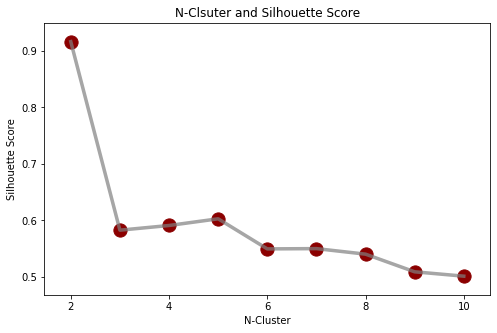

In [16]:
sils=[]

for k in range(2,11):
    km=KMeans(init='k-means++', n_clusters = k, n_init=100,random_state=101)
    km.fit(X_sc)
    sils.append(silhouette_score(X_sc,km.labels_,metric='euclidean'))
    silhouette_avg = silhouette_score(X_sc,km.labels_)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

    
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(range(2,11),sils,c='grey',lw=3.5,alpha=0.7)
ax.scatter(range(2,11),sils,c='darkred',s=175)

plt.title('N-Clsuter and Silhouette Score')
plt.xlabel('N-Cluster')
plt.ylabel('Silhouette Score')
plt.show()

For n_clusters = 2 The wcss is : 12110.480690736638
For n_clusters = 3 The wcss is : 7130.844966938392
For n_clusters = 4 The wcss is : 5158.250684669341
For n_clusters = 5 The wcss is : 3901.0675608733372
For n_clusters = 6 The wcss is : 3295.5778303335437
For n_clusters = 7 The wcss is : 2748.5723073093204
For n_clusters = 8 The wcss is : 2267.9480406521825
For n_clusters = 9 The wcss is : 1919.979655441627
For n_clusters = 10 The wcss is : 1660.4987447969268


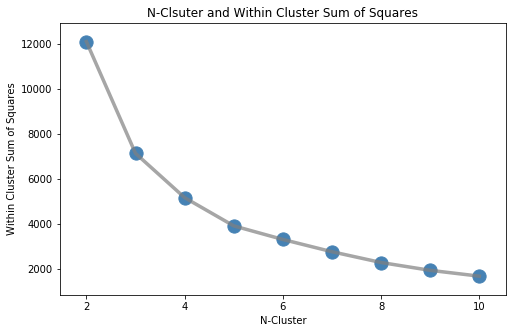

In [17]:
wcss=[]

for k in range(2,11):
    km=KMeans(init='k-means++', n_clusters = k, n_init=100,random_state=101)
    km.fit(X_sc)
    wcss.append(km.inertia_)
    
    print("For n_clusters =", k, "The wcss is :", km.inertia_)
    
fig, ax=plt.subplots(figsize=(8,5))
ax.plot(range(2,11),wcss,c='grey',lw=3.5,alpha=0.7)
ax.scatter(range(2,11),wcss,c='steelblue',s=175)
plt.title('N-Clsuter and Within Cluster Sum of Squares')
plt.xlabel('N-Cluster')
plt.ylabel('Within Cluster Sum of Squares')

plt.show()

In [18]:
scores = []
for k in range(2, 11):
    cl = KMeans(init='k-means++', n_clusters = k, n_init=100,random_state=101)
    cl.fit(X_sc)
    inertia = cl.inertia_
    
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']
score_df

k  inertia  silhouette
0   2 12110.48        0.92
1   3  7130.84        0.58
2   4  5158.25        0.59
3   5  3901.07        0.60
4   6  3295.58        0.55
5   7  2748.57        0.55
6   8  2267.95        0.54
7   9  1919.98        0.51
8  10  1660.50        0.50

## Fitting K= 3 in to KMeans

In [19]:
df_3= rfm_data.copy()
df_3.head()

Recency  Frequency  Monetary
Customer ID                              
12346.00         326         12  77556.46
12347.00           3          8   4921.53
12348.00          76          5   2019.40
12349.00          19          4   4428.69
12350.00         311          1    334.40

In [20]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++',random_state=101)
label = km.fit_predict(X_sc)

In [21]:
df_3['Cluster']=label

In [22]:
df_3.shape

(5878, 4)

In [23]:

df_3['Cluster'].value_counts()

0    3846
2    2010
1      22
Name: Cluster, dtype: int64

### KMeans K=3, Clusters Formed

In [24]:
centroids=pd.DataFrame(sc.inverse_transform(km.cluster_centers_),columns=['Recency','Frequency','Monetary'])

In [25]:
centroids

Recency  Frequency  Monetary
0    66.76       7.64   3136.20
1    23.55     143.05 173123.58
2   462.34       2.21    748.38

In [26]:
grouped_clustter_3=df_3.groupby(['Cluster']).agg({'Recency':'mean',
                                             'Frequency':'mean',
                                             'Monetary':'mean',
                                             
                                             'Cluster':'count'})
grouped_clustter_3

Recency  Frequency  Monetary  Cluster
Cluster                                       
0          66.76       7.64   3136.20     3846
1          23.55     143.05 173123.58       22
2         462.34       2.21    748.38     2010

In [27]:
df_3.reset_index(inplace=True)
df_3.head()

Customer ID  Recency  Frequency  Monetary  Cluster
0     12346.00      326         12  77556.46        0
1     12347.00        3          8   4921.53        0
2     12348.00       76          5   2019.40        0
3     12349.00       19          4   4428.69        0
4     12350.00      311          1    334.40        2

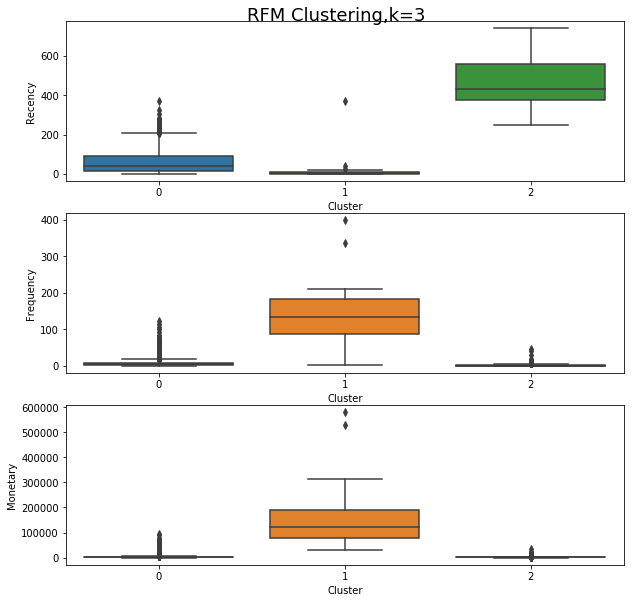

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

fig.suptitle('RFM Clustering,k=3',x=0.5, y=0.9, horizontalalignment='center', verticalalignment='top', fontsize = 18)

ax_0=sns.boxplot(y="Recency", x= "Cluster", data=df_3,  orient='v' , ax=axes[0])
ax_1=sns.boxplot(y="Frequency", x= "Cluster", data=df_3,  orient='v' , ax=axes[1])
ax_2=sns.boxplot(y="Monetary", x= "Cluster", data=df_3,  orient='v' , ax=axes[2])


In [29]:
grouped_clustter_3

Recency  Frequency  Monetary  Cluster
Cluster                                       
0          66.76       7.64   3136.20     3846
1          23.55     143.05 173123.58       22
2         462.34       2.21    748.38     2010

<font color=darkblue> Customers in <br>
   
- Cluster 0 has made purchase (3,846 Observations)
    - quite recently (mean: last purchased at past 67 days)
    - not frequent (mean: 8 transactions)
    - spending a moderately (mean: $ 3,135) <br><br>
    
- Cluster 1 has made purchase (2,010 Observations)
    - quite sometimes ago (mean: last purchased at past 462 days)
    - not frequent (mean: 2 transactions)
    - spending a little (mean: $ 749)<br><br>
    
- Cluster 2 has made purchase (22 Observations)
    - very recently (mean: last purchased at past 24 days)
    - quite frequent (mean: 143 transactions)
    - spending a lot (mean: $ 173,124) <br>    

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


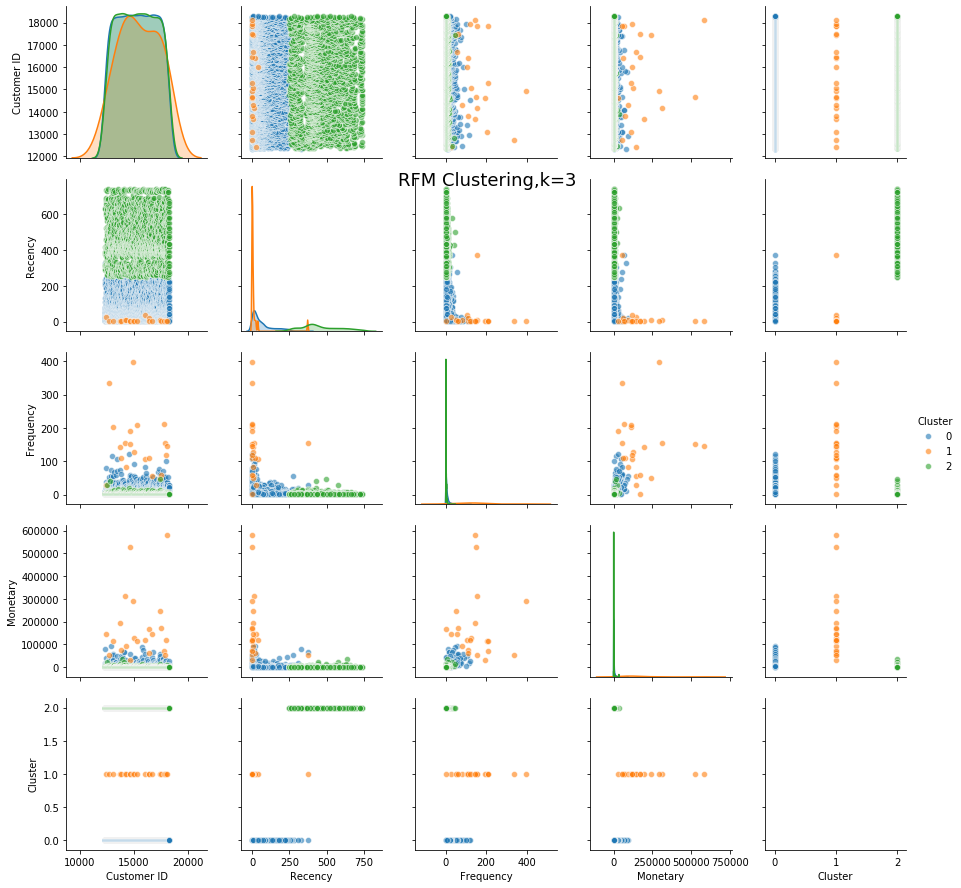

In [30]:
g=sns.pairplot(df_3,hue='Cluster',kind='scatter', plot_kws={'alpha':0.6})
g.fig.suptitle('RFM Clustering,k=3',x=0.5, y=0.8, horizontalalignment='center', verticalalignment='top', fontsize = 18);

<font color=darkblue> From the pairplot above, only 'Frequency' and "Recency" seems to have correlation.<br>
A scatter plot of 'Frequency' vs 'Monetary' is plotted below to observe clustering k=3.

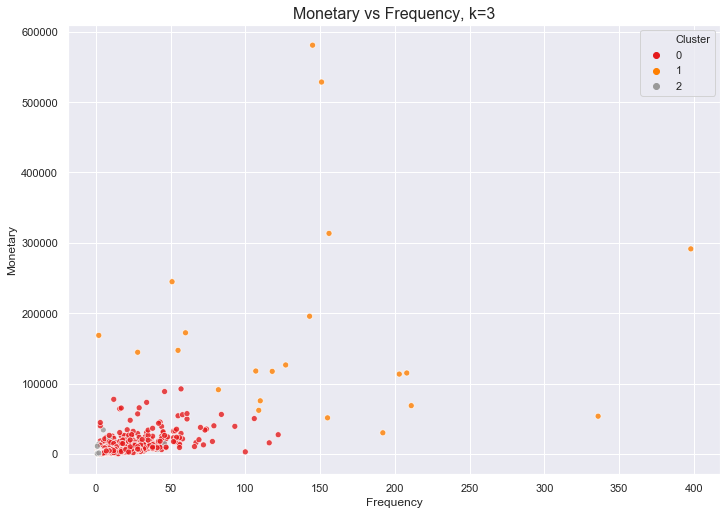

In [31]:
# Monetary vs Frequency Scatter Plot 

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='Frequency',y='Monetary',hue='Cluster',data=df_3,palette='Set1',legend='full',alpha=0.8)
plt.title('Monetary vs Frequency, k=3',fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Monetary');

<font color=darkblue> The three clsuters can be clearly seen.

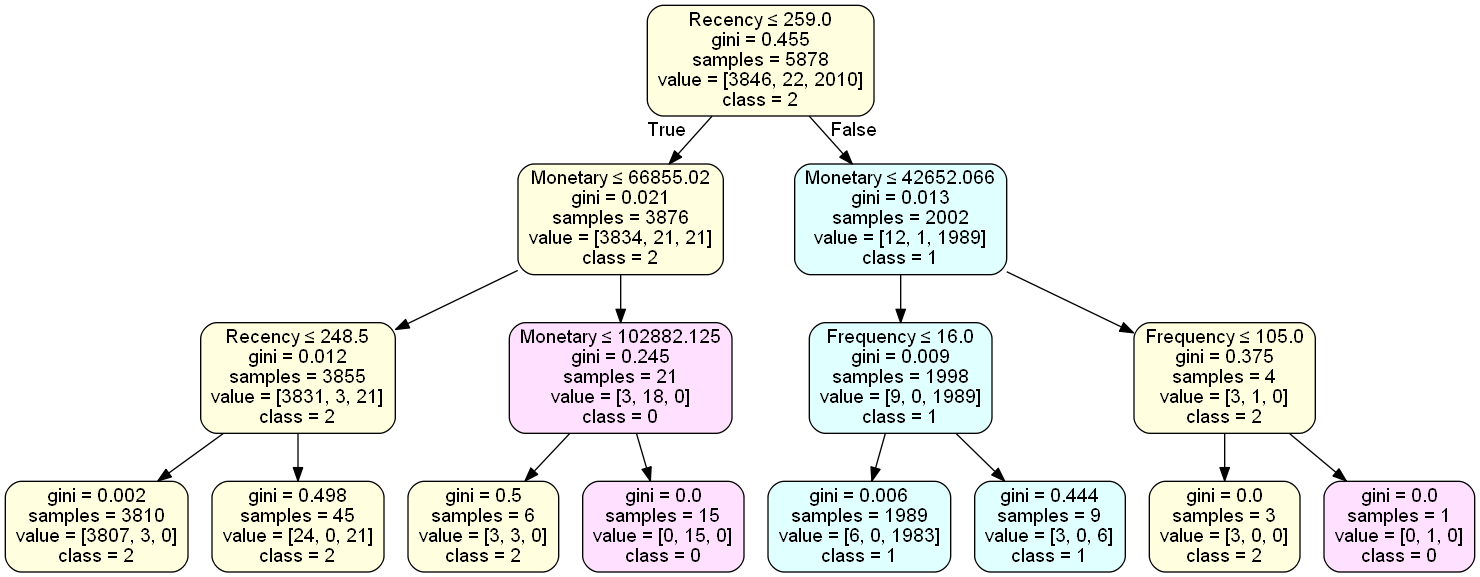

In [32]:
df_3['Cluster']=df_3["Cluster"].apply(str)

dt = tree.DecisionTreeClassifier(random_state = 101,max_depth=3)  
dt = dt.fit(df_3.iloc[:,1:4],df_3.iloc[:,4])  

 

import pydotplus  
dot_data = tree.export_graphviz(dt, out_file=None)  
graph2 = pydotplus.graph_from_dot_data(dot_data)  
graph2.write_pdf("../tree/tree.pdf")  

from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None,  
                     feature_names=list(df_3.iloc[:,1:4].columns),
                     class_names=list(set(df_3['Cluster'].values)),
                     filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)  
graph2 = pydotplus.graph_from_dot_data(dot_data)

## Color of nodes
nodes = graph2.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [224,255,255],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )
#

Image(graph2.create_png() ) 

<font color=darkblue> A decision tree is plotted with max_depth=3 to observe at under what condition the customers are segmented.The root node started with 'Recency', followed by 'Recency' and'Monetary'.

http://webgraphviz.com/

## Fitting K=4 into KMeans

In [33]:
df_4= rfm_data.copy()
df_4.head()

Recency  Frequency  Monetary
Customer ID                              
12346.00         326         12  77556.46
12347.00           3          8   4921.53
12348.00          76          5   2019.40
12349.00          19          4   4428.69
12350.00         311          1    334.40

In [34]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++',random_state=101)
label = km.fit_predict(X_sc)

In [35]:
df_4['Cluster']=label

In [36]:
df_4.shape

(5878, 4)

In [37]:
df_4['Cluster'].value_counts()

0    3842
2    1997
3      35
1       4
Name: Cluster, dtype: int64

### KMeans K=4, Clusters Formed

In [38]:
centroids=pd.DataFrame(sc.inverse_transform(km.cluster_centers_),columns=['Recency','Frequency','Monetary'])

In [39]:
centroids

Recency  Frequency  Monetary
0    67.59       7.31   2946.83
1     3.75     212.50 428612.00
2   463.68       2.21    746.70
3    26.40     103.71  81356.34

In [40]:
grouped_clustter_4=df_4.groupby(['Cluster']).agg({'Recency':'mean',
                                             'Frequency':'mean',
                                             'Monetary':'mean',
                                             'Cluster':'count'})
grouped_clustter_4

Recency  Frequency  Monetary  Cluster
Cluster                                       
0          67.59       7.31   2946.83     3842
1           3.75     212.50 428612.00        4
2         463.68       2.21    746.70     1997
3          26.40     103.71  81356.34       35

In [41]:
df_4.reset_index(inplace=True)
df_4.head()


Customer ID  Recency  Frequency  Monetary  Cluster
0     12346.00      326         12  77556.46        0
1     12347.00        3          8   4921.53        0
2     12348.00       76          5   2019.40        0
3     12349.00       19          4   4428.69        0
4     12350.00      311          1    334.40        2

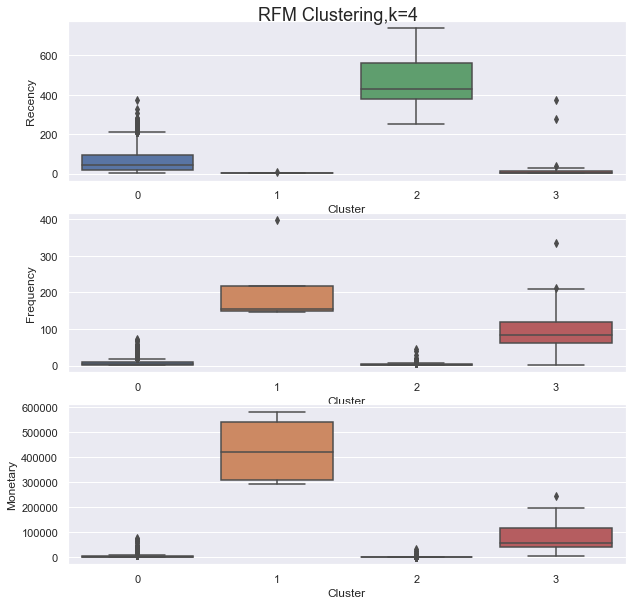

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

fig.suptitle('RFM Clustering,k=4',x=0.5, y=0.9, horizontalalignment='center', verticalalignment='top', fontsize = 18)

ax_0=sns.boxplot(y="Recency", x= "Cluster", data=df_4,  orient='v' , ax=axes[0])
ax_1=sns.boxplot(y="Frequency", x= "Cluster", data=df_4,  orient='v' , ax=axes[1])
ax_2=sns.boxplot(y="Monetary", x= "Cluster", data=df_4,  orient='v' , ax=axes[2])

In [43]:
grouped_clustter_4

Recency  Frequency  Monetary  Cluster
Cluster                                       
0          67.59       7.31   2946.83     3842
1           3.75     212.50 428612.00        4
2         463.68       2.21    746.70     1997
3          26.40     103.71  81356.34       35

<font color=darkblue> Customers in <br>
   
- Cluster 0 has purchased (3,842 Observations)
    - relatively recently (mean: last purchased at past 68 days)
    - not frequent (mean: 7 transactions)
    - spending a little (mean: $ 2,947) <br><br>
    
- Cluster 1 has purchased (4 Observations)
    - very recently (mean: last purchased at past 4 days)
    - quite frequent (mean: 213 transactions)
    - spending a lot (mean: $ 428,612) <br><br> 
    
- Cluster 2 has purchased (1,997 Observations)
    - very long ago (mean: last purchased at past 464 days)
    - not frequent (mean: 2 transactions)
    - spending the least (mean: $ 747)<br><br>    
    
- Cluster 3 has purchased (35 Observations)
    - relatively recently (mean: last purchased at past 26 days)
    - quite relatively frequent (mean: 104 transactions)
    - spending relatively a lot (mean: $ 81,356) <br><br> 

In [44]:
# g=sns.pairplot(df_4,hue='Cluster',kind='scatter', plot_kws={'alpha':0.6})
# g.fig.suptitle('RFM Clustering,k=4',x=0.5, y=0.8, horizontalalignment='center', verticalalignment='top', fontsize = 18);

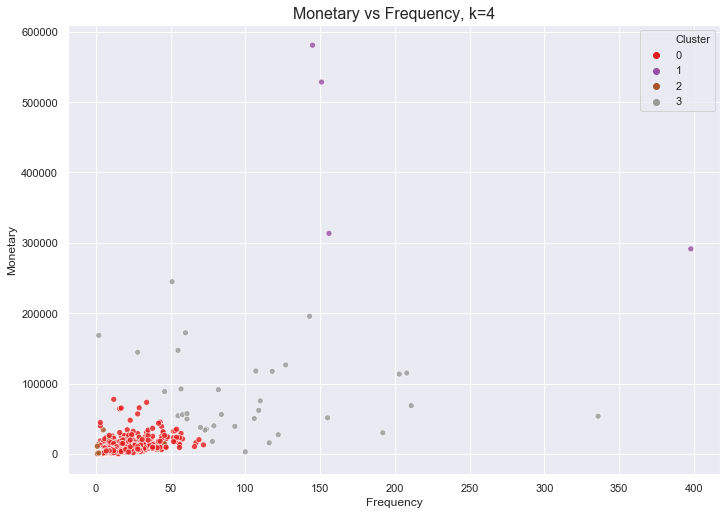

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='Frequency',y='Monetary',hue='Cluster',data=df_4,palette='Set1',legend='full',alpha=0.8)
plt.title('Monetary vs Frequency, k=4',fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Monetary');

<font color=darkblue> The four clsuters can be clearly seen.

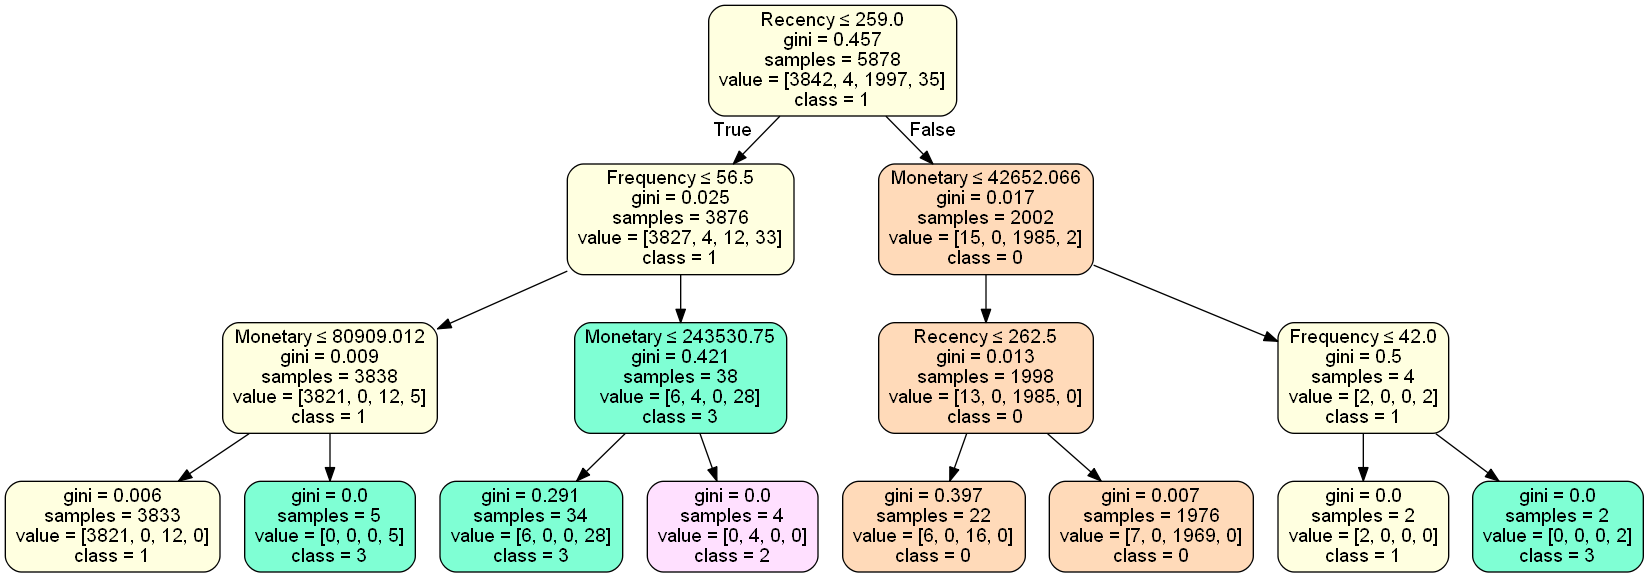

In [46]:
df_4['Cluster']=df_4["Cluster"].apply(str)

dt = tree.DecisionTreeClassifier(random_state = 101,max_depth=3)  
dt = dt.fit(df_4.iloc[:,1:4],df_4.iloc[:,4])  



import pydotplus  
dot_data = tree.export_graphviz(dt, out_file=None)  
graph2 = pydotplus.graph_from_dot_data(dot_data)  
graph2.write_pdf("../tree/tree.pdf")  

from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None,  
                     feature_names=list(df_4.iloc[:,1:4].columns),
                     class_names=list(set(df_4['Cluster'].values)),
                     filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)  
graph2 = pydotplus.graph_from_dot_data(dot_data)

## Color of nodes
nodes = graph2.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [255,218,185],3: [127,255,212],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )
        
        
#

Image(graph2.create_png() ) 

 <font color=darkblue> A decision tree is plotted with max_depth=3 to observe at under what condition the customers are segmented.The root node started with 'Recency', followed by 'Frequency'and 'Monetary'
at first branch.

## Fitting K=5 into KMeans

In [47]:
df_5= rfm_data.copy()
df_5.head()

Recency  Frequency  Monetary
Customer ID                              
12346.00         326         12  77556.46
12347.00           3          8   4921.53
12348.00          76          5   2019.40
12349.00          19          4   4428.69
12350.00         311          1    334.40

In [48]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 5, init = 'k-means++',random_state=101)
label = km.fit_predict(X_sc)

In [49]:
df_5['Cluster']=label

In [50]:
df_5.shape

(5878, 4)

In [51]:
df_5['Cluster'].value_counts()

0    3561
1    1914
4     375
2      24
3       4
Name: Cluster, dtype: int64

### KMeans K=5, Clusters Formed

In [52]:
centroids=pd.DataFrame(sc.inverse_transform(km.cluster_centers_),columns=['Recency','Frequency','Monetary'])

In [53]:
centroids

Recency  Frequency  Monetary
0    76.23       5.14   1884.98
1   471.89       2.17    738.78
2    22.83     119.79  98956.85
3     3.75     212.50 428612.00
4    28.41      28.72  13700.33

In [54]:
grouped_clustter_5=df_5.groupby(['Cluster']).agg({'Recency':'mean',
                                             'Frequency':'mean',
                                             'Monetary':'mean',
                                             'Cluster':'count'})
grouped_clustter_5

Recency  Frequency  Monetary  Cluster
Cluster                                       
0          76.35       5.14   1886.65     3561
1         472.10       2.17    738.55     1914
2          22.83     119.79  98956.85       24
3           3.75     212.50 428612.00        4
4          28.09      28.77  13742.51      375

In [55]:
df_5.reset_index(inplace=True)
df_5.head()


Customer ID  Recency  Frequency  Monetary  Cluster
0     12346.00      326         12  77556.46        4
1     12347.00        3          8   4921.53        0
2     12348.00       76          5   2019.40        0
3     12349.00       19          4   4428.69        0
4     12350.00      311          1    334.40        1

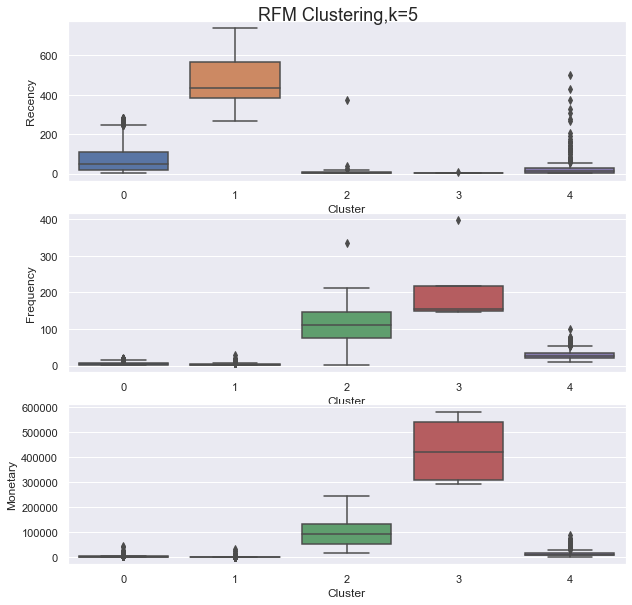

In [56]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

fig.suptitle('RFM Clustering,k=5',x=0.5, y=0.9, horizontalalignment='center', verticalalignment='top', fontsize = 18)

ax_0=sns.boxplot(y="Recency", x= "Cluster", data=df_5,  orient='v' , ax=axes[0])
ax_1=sns.boxplot(y="Frequency", x= "Cluster", data=df_5,  orient='v' , ax=axes[1])
ax_2=sns.boxplot(y="Monetary", x= "Cluster", data=df_5,  orient='v' , ax=axes[2])


In [57]:
grouped_clustter_5

Recency  Frequency  Monetary  Cluster
Cluster                                       
0          76.35       5.14   1886.65     3561
1         472.10       2.17    738.55     1914
2          22.83     119.79  98956.85       24
3           3.75     212.50 428612.00        4
4          28.09      28.77  13742.51      375

<font color=darkblue> Customers in <br>

    
    
- Cluster 0 has purchased (3,561 Observations)
    - quite sometimes ago (mean: last purchased at past 76 days)
    - not frequent (mean: 5 transactions)
    - spending a little (mean: $ 1,878)<br><br>
    
- Cluster 1 has purchased (1,914 Observations)
    - very long ago (mean: last purchased at past 472 days)
    - not frequent (mean: 2 transactions)
    - spending the least (mean: $ 739) <br><br>
    
    
- Cluster 2 has purchased (24 Observations)
    - quite recently (mean: last purchased at past 23 days)
    - quite frequent (mean: 120 transactions)
    - spending a lot (mean: $ 98,957) <br><br> 
    
- Cluster 3 has purchased (4 Observations)
    - very recently (mean: last purchased at past 3.75 days)
    - very frequent (mean: 213 transactions)
    - spending the most (mean: $ 428,612) <br><br> 
    
- Cluster 4 has purchased (375 Observations)
    - quite recently (mean: last purchased at past 29 days)
    - not so frequent (mean: 29 transactions)
    - spending moderately (mean: $ 13,663) <br><br> 

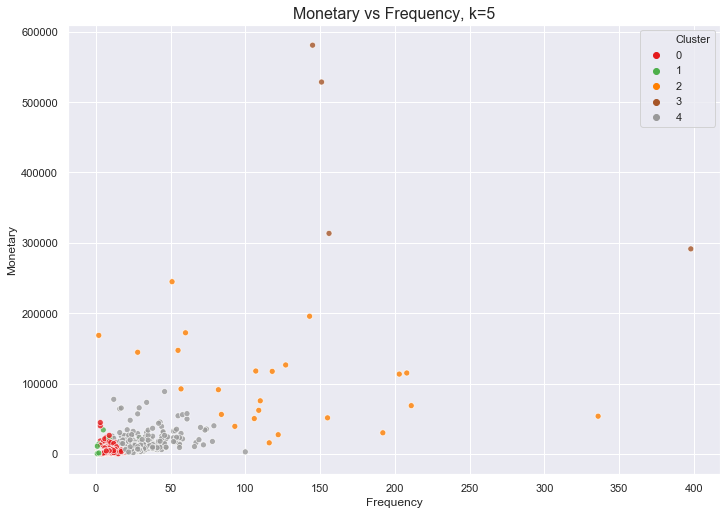

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='Frequency',y='Monetary',hue='Cluster',data=df_5,palette='Set1',legend='full',alpha=0.8)
plt.title('Monetary vs Frequency, k=5',fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Monetary');

<font color=darkblue> The five clsuters can be clearly seen.

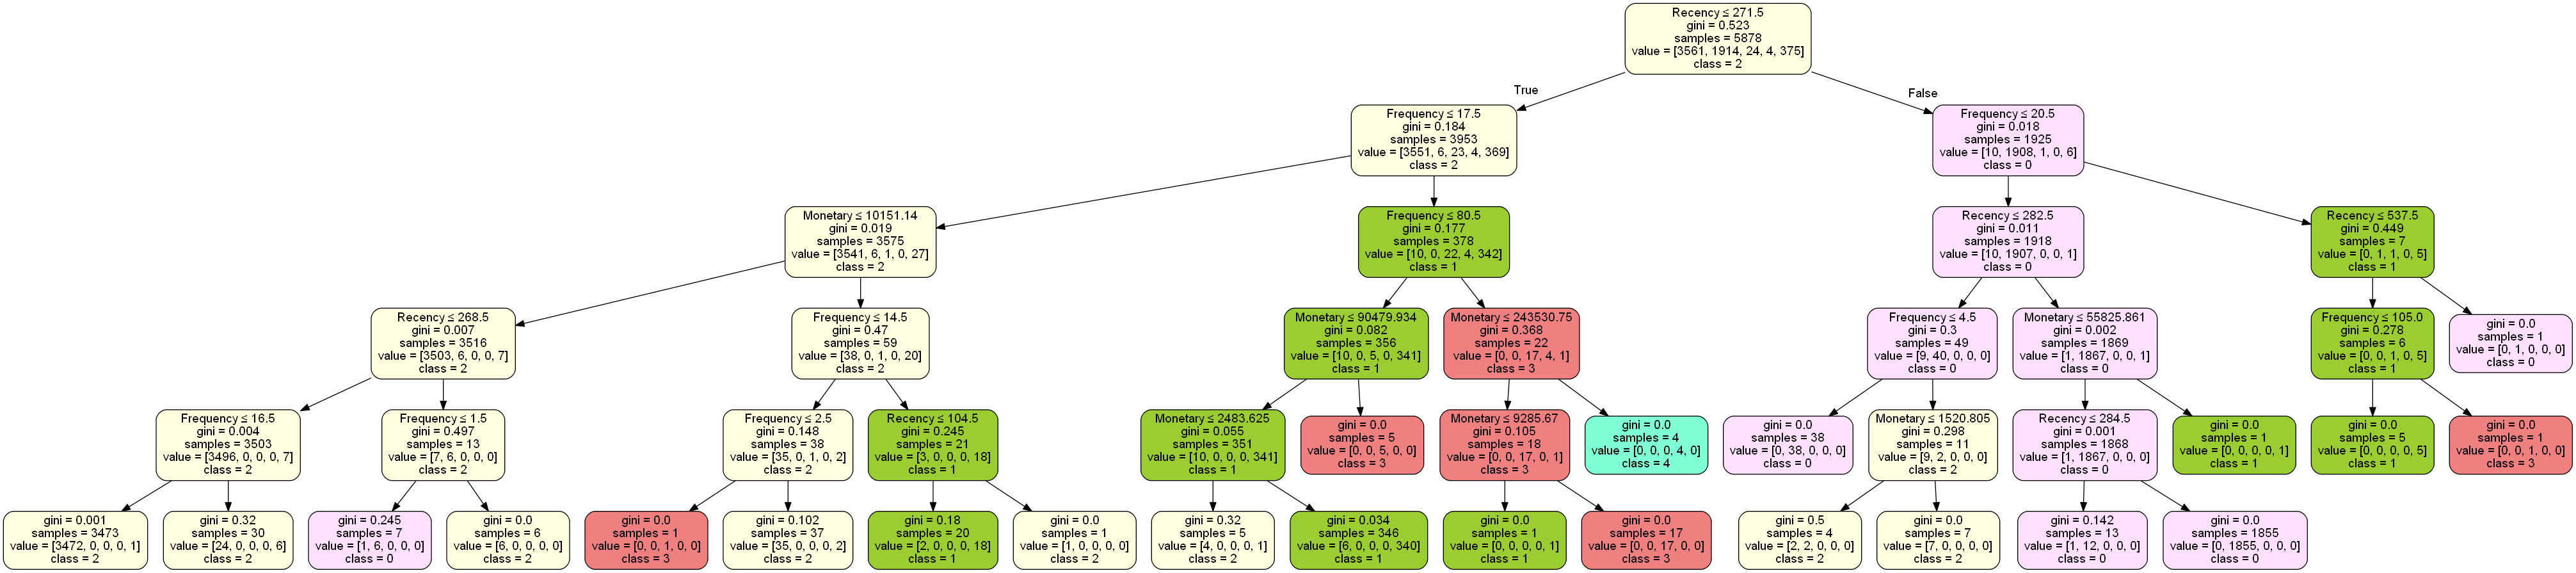

In [59]:
df_5['Cluster']=df_5["Cluster"].apply(str)

dt = tree.DecisionTreeClassifier(random_state = 101,max_depth=5)  
dt = dt.fit(df_5.iloc[:,1:4],df_5.iloc[:,4])  



import pydotplus  
dot_data = tree.export_graphviz(dt, out_file=None)  
graph2 = pydotplus.graph_from_dot_data(dot_data)  
graph2.write_pdf("../tree/tree.pdf")  

from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None,  
                     feature_names=list(df_5.iloc[:,1:4].columns),
                     class_names=list(set(df_5['Cluster'].values)),
                     filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)  
graph2 = pydotplus.graph_from_dot_data(dot_data)

## Color of nodes
nodes = graph2.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [240,128,128],3: [127,255,212],4: [154,205,50],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )
        
        
#

Image(graph2.create_png() ) 

 <font color=darkblue> A decision tree is plotted with max_depth=5 to observe at under what condition the customers are segmented.The root node started with 'Recency', followed by 'Frequency'at first branch.

## Fitting K=6 into KMeans

In [60]:
df_6= rfm_data.copy()
df_6.head()

Recency  Frequency  Monetary
Customer ID                              
12346.00         326         12  77556.46
12347.00           3          8   4921.53
12348.00          76          5   2019.40
12349.00          19          4   4428.69
12350.00         311          1    334.40

In [61]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 6, init = 'k-means++',random_state=101)
label = km.fit_predict(X_sc)

In [62]:
df_6['Cluster']=label

In [63]:
df_6.shape

(5878, 4)

In [64]:
df_6['Cluster'].value_counts()

0    3240
5    1487
1     776
4     347
3      24
2       4
Name: Cluster, dtype: int64

### KMeans K=6, Clusters Formed

In [65]:
centroids=pd.DataFrame(sc.inverse_transform(km.cluster_centers_),columns=['Recency','Frequency','Monetary'])

In [66]:
centroids

Recency  Frequency  Monetary
0    58.59       5.48   2019.81
1   599.97       1.66    638.16
2     3.75     212.50 428612.00
3    22.83     119.79  98956.85
4    27.03      29.63  14301.44
5   350.74       2.62    854.04

In [67]:
grouped_clustter_6=df_6.groupby(['Cluster']).agg({'Recency':'mean',
                                             'Frequency':'mean',
                                             'Monetary':'mean',
                                             'Cluster':'count'})
grouped_clustter_6

Recency  Frequency  Monetary  Cluster
Cluster                                       
0          58.53       5.48   2021.38     3240
1         599.97       1.66    638.16      776
2           3.75     212.50 428612.00        4
3          22.83     119.79  98956.85       24
4          27.10      29.67  14324.06      347
5         350.64       2.62    854.37     1487

In [68]:
df_6.reset_index(inplace=True)
df_6.head()

Customer ID  Recency  Frequency  Monetary  Cluster
0     12346.00      326         12  77556.46        4
1     12347.00        3          8   4921.53        0
2     12348.00       76          5   2019.40        0
3     12349.00       19          4   4428.69        0
4     12350.00      311          1    334.40        5

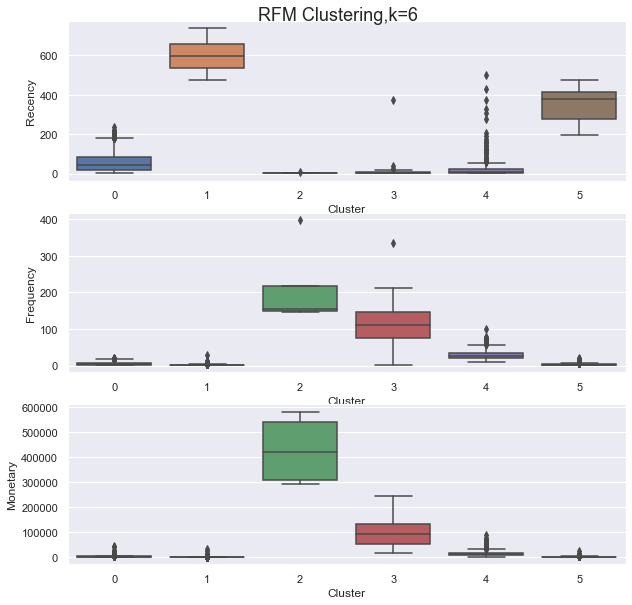

In [69]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

fig.suptitle('RFM Clustering,k=6',x=0.5, y=0.9, horizontalalignment='center', verticalalignment='top', fontsize = 18)

ax_0=sns.boxplot(y="Recency", x= "Cluster", data=df_6,  orient='v' , ax=axes[0])
ax_1=sns.boxplot(y="Frequency", x= "Cluster", data=df_6,  orient='v' , ax=axes[1])
ax_2=sns.boxplot(y="Monetary", x= "Cluster", data=df_6,  orient='v' , ax=axes[2])


In [70]:
grouped_clustter_6

Recency  Frequency  Monetary  Cluster
Cluster                                       
0          58.53       5.48   2021.38     3240
1         599.97       1.66    638.16      776
2           3.75     212.50 428612.00        4
3          22.83     119.79  98956.85       24
4          27.10      29.67  14324.06      347
5         350.64       2.62    854.37     1487

<font color=darkblue> Customers in <br>
   
- Cluster 0 has purchased (3,240 Observations)
    - quite sometimes ago (mean: last purchased at past 59 days)
    - not frequent (mean: 6 transactions)
    - spending moderately (mean: $ 2,021) <br><br>
    
- Cluster 1 has purchased (776 Observations)
    - very long ago (mean: last purchased at past 600 days)
    - not very frequent (mean: 2 transactions)
    - spending the least (mean: $ 638)<br><br>
    
- Cluster 2 has purchased (4 Observations)
    - very recently (mean: last purchased at past 4 days)
    - very frequent (mean: 213 transactions)
    - spending the most (mean: $ 428,612) <br><br> 
    
- Cluster 3 has purchased (24 Observations)
    - relatively recently (mean: last purchased at past 23 days)
    - quite frequent (mean: 120 transactions)
    - spending a lot (mean: $ 98,956) <br><br> 
    
- Cluster 4 has purchased (347 Observations)
    - relatively recently (mean: last purchased at past 27 days)
    - not so frequent (mean: 30 transactions)
    - spending relatively a lot (mean: $ 14,324) <br><br> 
    
- Cluster 5 has purchased (1,487 Observations)
    - quite long ago (mean: last purchased at past 351 days)
    - not very frequent (mean: 3 transactions)
    - spending the least (mean: $ 854) <br><br> 

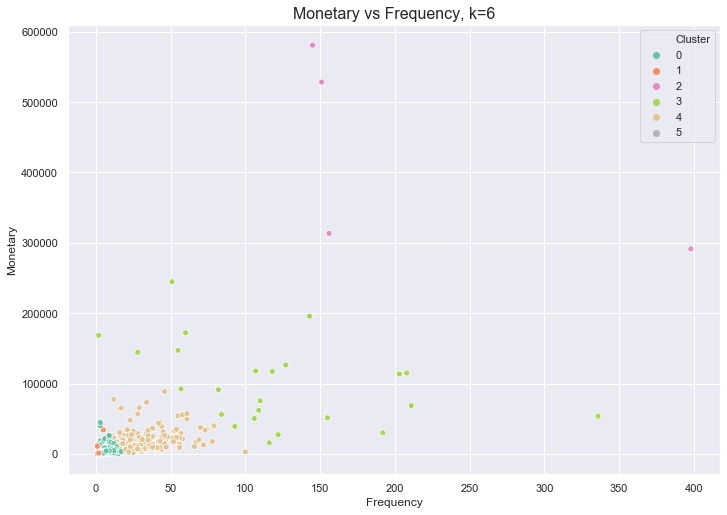

In [71]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='Frequency',y='Monetary',hue='Cluster',data=df_6,palette='Set2',legend='full')
plt.title('Monetary vs Frequency, k=6',fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Monetary');

<font color=darkblue> The  clsuters 5 could not be spotted.

<font color=darkblue> Customers in <br>
Unable to distinguish between Cluster 1 & Cluster 5

- Cluster 1 has purchased (776 Observations)
    - very long ago (mean: last purchased at past 600 days)
    - not very frequent (mean: 2 transactions)
    - spending the least (mean: $ 638)<br><br> 
 
- Cluster 5 has purchased (1,487 Observations)
    - quite long ago (mean: last purchased at past 351 days)
    - not very frequent (mean: 3 transactions)
    - spending the least (mean: $ 854) <br><br> 

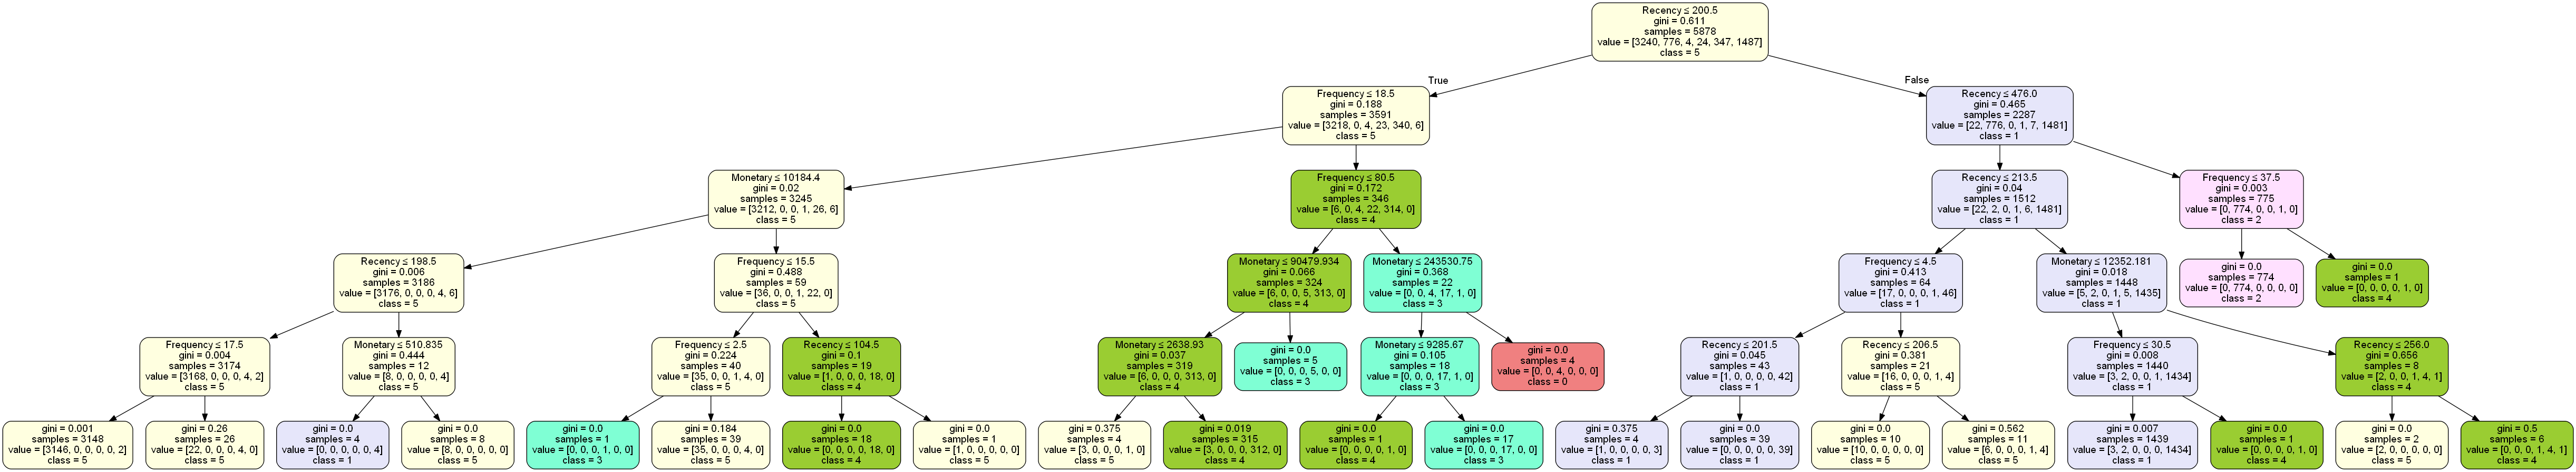

In [72]:
df_6['Cluster']=df_6["Cluster"].apply(str)

dt = tree.DecisionTreeClassifier(random_state = 101,max_depth=5)  
dt = dt.fit(df_6.iloc[:,1:4],df_6.iloc[:,4])  


import pydotplus  
dot_data = tree.export_graphviz(dt, out_file=None)  
graph2 = pydotplus.graph_from_dot_data(dot_data)  
graph2.write_pdf("../tree/tree.pdf")  

from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None,  
                     feature_names=list(df_6.iloc[:,1:4].columns),
                     class_names=list(set(df_6['Cluster'].values)),
                     filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)  
graph2 = pydotplus.graph_from_dot_data(dot_data)

## Color of nodes
nodes = graph2.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [240,128,128],3: [127,255,212],4: [154,205,50],5: [230,230,250],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )
        
        
#

Image(graph2.create_png() ) 

 <font color=darkblue> A decision tree is plotted with max_depth=5 to observe at under what condition the customers are segmented.The root node started with 'Recency', followed by 'Frequency'and 'Recency'
at first branch.

https://www.html.am/html-codes/color/color-scheme.cfm?rgbColor=255,255,224

# PCA

## Define X & StandardScale

In [73]:
rfm_data=customer_df[['Customer ID','Recency','Frequency','Monetary']]
rfm_data.set_index('Customer ID',inplace=True)

In [74]:
df= rfm_data.copy()

In [75]:
X=df
print('X shape: ',X.shape)

X shape:  (5878, 3)


In [76]:
#Feature Scaling
sc= StandardScaler()
X_sc= sc.fit_transform(X)

In [77]:
X_sc

array([[ 0.59298505,  0.43899789,  5.16637792],
       [-0.94998781,  0.13150188,  0.13612722],
       [-0.60126639, -0.09912012, -0.06485654],
       ...,
       [ 2.19328197, -0.40661612, -0.17513642],
       [ 1.31431292, -0.32974212, -0.11492502],
       [-0.75890758,  0.05462788,  0.08498046]])

In [78]:
X_sc.shape

(5878, 3)

## PCA - Explained Variance

In [79]:
# Instantiate PCA
pca = PCA(random_state=101)
pca = pca.fit(X_sc)
x_pca=pca.transform(X_sc)

In [80]:
x_pca

array([[ 3.42324449,  2.46439156,  3.07310635],
       [ 0.50976794, -0.81054473,  0.14647214],
       [ 0.10138053, -0.59184167,  0.12246577],
       ...,
       [-1.15712598,  1.90752369, -0.17002383],
       [-0.75829871,  1.12790819, -0.04650012],
       [ 0.35765636, -0.66284066,  0.13737098]])

In [81]:
x_pca.shape

(5878, 3)

In [82]:
print('PCA Explained Variance:',pca.explained_variance_)
print('PCA Components:',pca.components_)

PCA Explained Variance: [1.72924873 0.91401912 0.35724261]
PCA Components: [[-0.3501558   0.67916257  0.6450807 ]
 [ 0.92336291  0.1345087   0.3595947 ]
 [-0.1574543  -0.72155777  0.67421253]]


In [83]:
pca.components_.shape

(3, 3)

In [84]:
var_exp=pca.explained_variance_ratio_
print('Percentage of variance explained by each of the selected components:',var_exp)
cum_var_exp=np.cumsum(var_exp)
print('Cumulative Percentage of variance explained by each of the selected components:',cum_var_exp)

Percentage of variance explained by each of the selected components: [0.57631818 0.30462121 0.11906061]
Cumulative Percentage of variance explained by each of the selected components: [0.57631818 0.88093939 1.        ]


<font color=darkblue> Taking the first 2 PCA Component is able to explain 88% variability of the components.

## Choose Number of Component ,n_components=2

In [85]:
# Instantiate PCA
pca = PCA(n_components=2,random_state=101)
pca = pca.fit(X_sc)
x_pca=pca.transform(X_sc)

In [86]:
x_pca

array([[ 3.42324449,  2.46439156],
       [ 0.50976794, -0.81054473],
       [ 0.10138053, -0.59184167],
       ...,
       [-1.15712598,  1.90752369],
       [-0.75829871,  1.12790819],
       [ 0.35765636, -0.66284066]])

In [87]:
x_pca.shape

(5878, 2)

In [88]:
pca.components_

array([[-0.3501558 ,  0.67916257,  0.6450807 ],
       [ 0.92336291,  0.1345087 ,  0.3595947 ]])

In [89]:
pca.components_.shape

(2, 3)

In [90]:
df_comp=pd.DataFrame(pca.components_,columns=['Recency','Frequency','Monetary'])

In [91]:
df_comp

Recency  Frequency  Monetary
0    -0.35       0.68      0.65
1     0.92       0.13      0.36

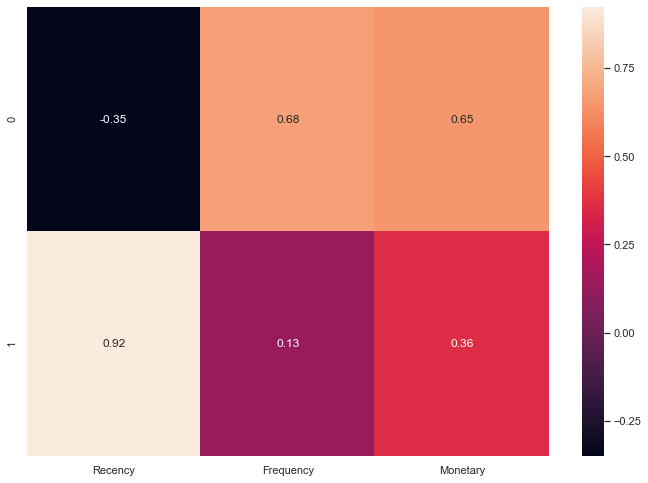

In [92]:
sns.heatmap(df_comp,annot=True);

<font color=darkblue>
For the first principle component, Frequency and Monetary is significant so this principle component is correlated well with Frequency & Monetary and Customers with a high value for the first principle component have high Frequency and Monetary and a low value for Recency. (Purchased Frequently, High Value and Very Recently).<br><br>

Customers with high values of the second principle component will have a high value for Recency,Monetary and relatively low in frequency.(Purchased very long ago,High Value, not so frequent).

In [93]:
def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features by importance:\n", important_features)

get_important_features(x_pca, pca.components_, df_comp.columns.values)

Features by importance:
 [(22.957252053446258, 'Frequency'), (22.376253286731398, 'Monetary'), (18.149466667900256, 'Recency')]


In [94]:
# a=df_5.values                         # convert to array 

# for i in range(0,x_pca.shape[0]):
#     if a[:,4][i]=='0':
#         c1=plt.scatter(x_pca[i,0],x_pca[i,1],c='r',marker='+')
#     elif a[:,4][i]=='1':
#         c2=plt.scatter(x_pca[i,0],x_pca[i,1],c='g',marker='+')
#     elif a[:,4][i]=='2':
#         c3=plt.scatter(x_pca[i,0],x_pca[i,1],c='b',marker='+')
#     elif a[:,4][i]=='3':
#         c4=plt.scatter(x_pca[i,0],x_pca[i,1],c='g',marker='o')
#     elif a[:,4][i]=='4':
#         c5=plt.scatter(x_pca[i,0],x_pca[i,1],c='b',marker='o')
# plt.legend([c1,c2,c3,c4,c5],['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'])
# plt.show()

## Preparing to fit x_pca into KMeans

In [95]:
x_pca_df=pd.DataFrame(x_pca,columns=['PCA_1','PCA_2'])

In [96]:
x_pca_df.head()

PCA_1  PCA_2
0   3.42   2.46
1   0.51  -0.81
2   0.10  -0.59
3   0.25  -0.79
4  -0.58   0.36

In [97]:
X=x_pca_df

### Fit X_pca into KMeans,k=3

In [98]:
df_pca_k3= x_pca_df.copy()
df_pca_k3.head()

PCA_1  PCA_2
0   3.42   2.46
1   0.51  -0.81
2   0.10  -0.59
3   0.25  -0.79
4  -0.58   0.36

In [99]:
# Fitting K-Means to the dataset using X_pca
km = KMeans(n_clusters = 3, init = 'k-means++',random_state=101)
label = km.fit_predict(X)

In [100]:
df_pca_k3['Cluster']=label

In [101]:
print('df_pca_k3 shape: ',df_pca_k3.shape)
df_pca_k3.head()

df_pca_k3 shape:  (5878, 3)


PCA_1  PCA_2  Cluster
0   3.42   2.46        0
1   0.51  -0.81        0
2   0.10  -0.59        0
3   0.25  -0.79        0
4  -0.58   0.36        2

In [102]:
grouped_clustter_pca_k3=df_pca_k3.groupby(['Cluster']).agg({
                                             'PCA_1':'mean',
                                             'PCA_2':'mean',
                                             'Cluster':'count'})
grouped_clustter_pca_k3

PCA_1  PCA_2  Cluster
Cluster                       
0         0.31  -0.58     3843
1        16.62   5.39       18
2        -0.75   1.05     2017

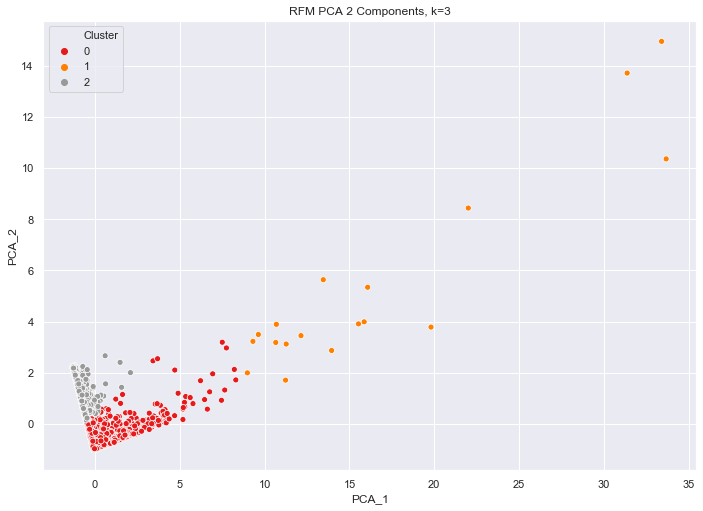

In [103]:
sns.scatterplot(x=df_pca_k3['PCA_1'],y=df_pca_k3['PCA_2'],hue=df_pca_k3['Cluster'],palette='Set1',legend='full')
plt.title('RFM PCA 2 Components, k=3');

### Fit X_pca into KMeans,k=4

In [104]:
df_pca_k4= x_pca_df.copy()
df_pca_k4.head()

PCA_1  PCA_2
0   3.42   2.46
1   0.51  -0.81
2   0.10  -0.59
3   0.25  -0.79
4  -0.58   0.36

In [105]:
# Fitting K-Means to the dataset using X_pca
km = KMeans(n_clusters = 4, init = 'k-means++',random_state=101)
label = km.fit_predict(X)

In [106]:
df_pca_k4['Cluster']=label

In [107]:
print('df_pca_k4 shape: ',df_pca_k4.shape)
df_pca_k4.head()

df_pca_k4 shape:  (5878, 3)


PCA_1  PCA_2  Cluster
0   3.42   2.46        0
1   0.51  -0.81        0
2   0.10  -0.59        0
3   0.25  -0.79        0
4  -0.58   0.36        1

In [108]:
grouped_clustter_pca_k4=df_pca_k4.groupby(['Cluster']).agg({
                                             'PCA_1':'mean',
                                             'PCA_2':'mean',
                                             'Cluster':'count'})
grouped_clustter_pca_k4

PCA_1  PCA_2  Cluster
Cluster                       
0         0.28  -0.58     3840
1        -0.75   1.06     1999
2        30.11  11.86        4
3         8.89   2.21       35

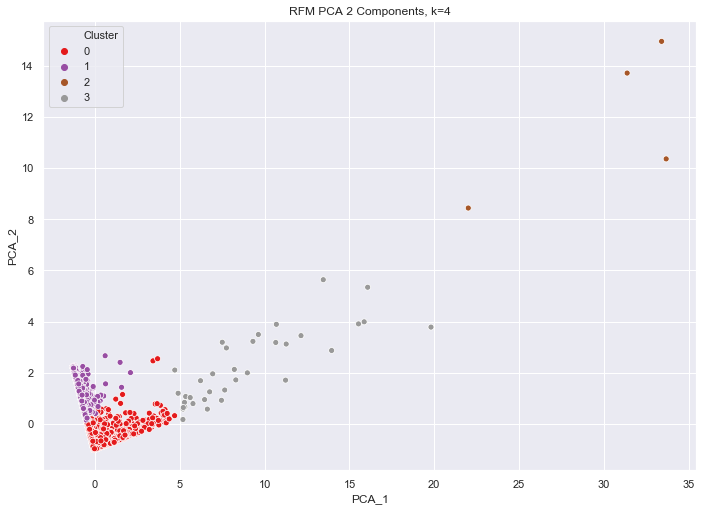

In [109]:
sns.scatterplot(x=df_pca_k4['PCA_1'],y=df_pca_k4['PCA_2'],hue=df_pca_k4['Cluster'],palette='Set1',legend='full')
plt.title('RFM PCA 2 Components, k=4');

### Fit X_pca into KMeans,k=5

In [110]:
df_pca_k5= x_pca_df.copy()
df_pca_k5.head()

PCA_1  PCA_2
0   3.42   2.46
1   0.51  -0.81
2   0.10  -0.59
3   0.25  -0.79
4  -0.58   0.36

In [111]:
# Fitting K-Means to the dataset using X_pca
km = KMeans(n_clusters = 5, init = 'k-means++',random_state=101)
label = km.fit_predict(X)

In [112]:
df_pca_k5['Cluster']=label

In [113]:
print('df_pca_k5 shape: ',df_pca_k5.shape)
df_pca_k5.head()

df_pca_k5 shape:  (5878, 3)


PCA_1  PCA_2  Cluster
0   3.42   2.46        1
1   0.51  -0.81        4
2   0.10  -0.59        4
3   0.25  -0.79        4
4  -0.58   0.36        0

In [114]:
grouped_clustter_pca_k5=df_pca_k5.groupby(['Cluster']).agg({
                                             'PCA_1':'mean',
                                             'PCA_2':'mean',
                                             'Cluster':'count'})
grouped_clustter_pca_k5

PCA_1  PCA_2  Cluster
Cluster                       
0        -0.77   1.09     1925
1         1.92  -0.26      383
2        10.34   2.73       25
3        30.11  11.86        4
4         0.10  -0.60     3541

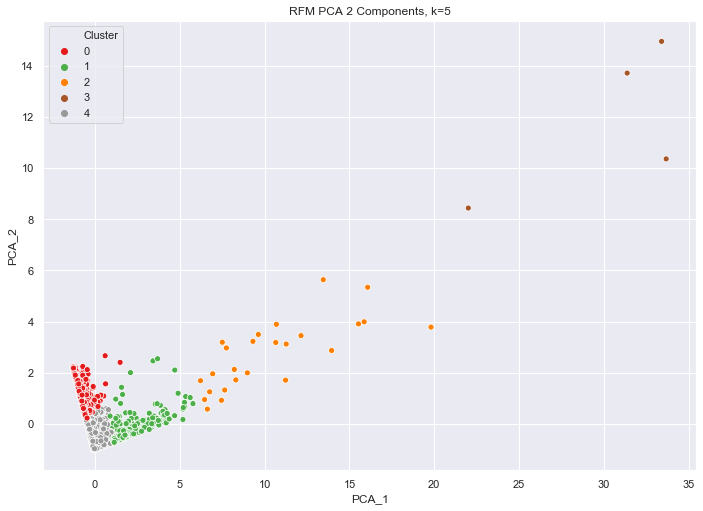

In [115]:
sns.scatterplot(x=df_pca_k5['PCA_1'],y=df_pca_k5['PCA_2'],hue=df_pca_k5['Cluster'],palette='Set1',legend='full')
plt.title('RFM PCA 2 Components, k=5');

### Fit X_pca into KMeans,k=6

In [116]:
df_pca_k6= x_pca_df.copy()
df_pca_k6.head()

PCA_1  PCA_2
0   3.42   2.46
1   0.51  -0.81
2   0.10  -0.59
3   0.25  -0.79
4  -0.58   0.36

In [117]:
# Fitting K-Means to the dataset using X_pca
km = KMeans(n_clusters = 6, init = 'k-means++',random_state=101)
label = km.fit_predict(X)

In [118]:
df_pca_k6['Cluster']=label

In [119]:
print('df_pca_k6 shape: ',df_pca_k6.shape)
df_pca_k6.head()

df_pca_k6 shape:  (5878, 3)


PCA_1  PCA_2  Cluster
0   3.42   2.46        3
1   0.51  -0.81        0
2   0.10  -0.59        0
3   0.25  -0.79        0
4  -0.58   0.36        5

In [120]:
grouped_clustter_pca_k6=df_pca_k6.groupby(['Cluster']).agg({
                                             'PCA_1':'mean',
                                             'PCA_2':'mean',
                                             'Cluster':'count'})
grouped_clustter_pca_k6

PCA_1  PCA_2  Cluster
Cluster                       
0         0.15  -0.67     3227
1        10.34   2.73       25
2        -1.01   1.65      773
3         1.97  -0.24      363
4        30.11  11.86        4
5        -0.54   0.57     1486

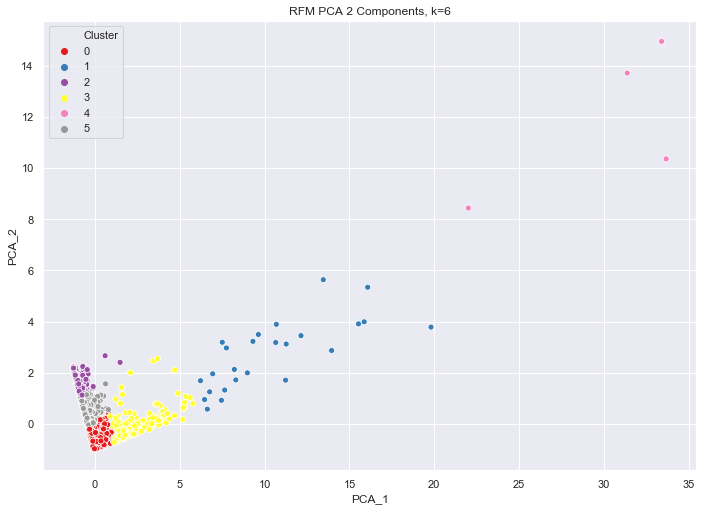

In [121]:
sns.scatterplot(x=df_pca_k6['PCA_1'],y=df_pca_k6['PCA_2'],hue=df_pca_k6['Cluster'],palette='Set1',legend='full')
plt.title('RFM PCA 2 Components, k=6');

<font color=darkblue> When using Recency, Frequency and Monetary value as features, below is the clustters formed using KMeans and KMeans with PCA:
    
- k=3
    
|Cluster|KMeans|KMeans with PCA|
|:------|:------|:------|
|0|3,846|3,843|
|1|22|18|
|2|2,010|2,017|
    
- k=4
    
|Cluster|KMeans|KMeans with PCA|
|:------|:------|:------|
|0|3,842|3,840|
|1|4|4|
|2|1,997|1,999|
|3|35|35|
    
    
- k=5
    
|Cluster|KMeans|KMeans with PCA|
|:------|:------|:------|
|0|3,561|3,541|
|1|1,914|1,925|
|2|24|25|
|3|4|4|
|4|375|383|
    
    
- k=6

    
|Cluster|KMeans|KMeans with PCA|
|:------|:------|:------|
|0|3,240|3,227|
|1|776|773|
|2|4|4|
|3|24|25|
|4|347|363|
|5|1,487|1,486|
    

The clusters formed using KMeans and KMeans with PCA are similar.<br>PCA doesn't have an impact on the clusters formed uisng the 3 attributes.

# Modeling Using Customer Feat as Features

<font color=darkblue> More features are incorporated in this round of modeling.<br>

In [122]:
customer_feat.head(2)

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
Customer ID                                                          
12346.00                        5      74285                    26   
12347.00                        8       2967                   126   

             Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
Customer ID                                                                  
12346.00                   7.49                1.00                   7.49   
12347.00                  12.75                0.25                   1.95   

            Last_Purchase_Date First_Purchase_Date  Avg_Transaction_Per_Mth  \
Customer ID                                                                   
12346.00            2011-01-18          2009-12-14                     0.48   
12347.00            2011-12-07          2010-10-31                     0.32   

             Avg_Spending_Per_Mth  Ratio_Transaction_Per_Unique_Mth  \
Customer ID                                                           
12346.00                  3102.26                              2.40   
12347.00                   196.86                              1.00   

             Ratio_Spending_Per_Unique_Mth  Avg_Spending_Per_Inv  \
Customer ID                                                        
12346.00                          15511.29               6463.04   
12347.00                            615.19                615.19   

             Avg_Purchase_Qty_Per_Inv  Avg_Item_Types_Per_Inv  Recency  \
Customer ID                                                              
12346.00                      6190.42                    2.17      326   
12347.00                       370.88                   15.75        3   

             Frequency  Monetary  Tenure  Customer_Country_Belgium  \
Customer ID                                                          
12346.00            12  77556.46     726                         0   
12347.00             8   4921.53     405                         0   

             Customer_Country_France  Customer_Country_Germany  \
Customer ID                                                      
12346.00                           0                         0   
12347.00                           0                         0   

             Customer_Country_Italy  Customer_Country_Netherlands  \
Customer ID                                                         
12346.00                          0                             0   
12347.00                          0                             0   

             Customer_Country_Other Countries  Customer_Country_Portugal  \
Customer ID                                                                
12346.00                                    0                          0   
12347.00                                    1                          0   

             Customer_Country_Spain  Customer_Country_Sweden  \
Customer ID                                                    
12346.00                          0                        0   
12347.00                          0                        0   

             Customer_Country_Switzerland  Customer_Country_United Kingdom  
Customer ID                                                                 
12346.00                                0                                1  
12347.00                                0                                0

In [123]:
customer_feat.drop(columns=['Last_Purchase_Date','First_Purchase_Date'],inplace=True)

In [124]:
customer_feat.head(2)

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
Customer ID                                                          
12346.00                        5      74285                    26   
12347.00                        8       2967                   126   

             Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
Customer ID                                                                  
12346.00                   7.49                1.00                   7.49   
12347.00                  12.75                0.25                   1.95   

             Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Customer ID                                                  
12346.00                        0.48               3102.26   
12347.00                        0.32                196.86   

             Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Customer ID                                                                    
12346.00                                 2.40                       15511.29   
12347.00                                 1.00                         615.19   

             Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Customer ID                                                   
12346.00                  6463.04                   6190.42   
12347.00                   615.19                    370.88   

             Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Customer ID                                                                 
12346.00                       2.17      326         12  77556.46     726   
12347.00                      15.75        3          8   4921.53     405   

             Customer_Country_Belgium  Customer_Country_France  \
Customer ID                                                      
12346.00                            0                        0   
12347.00                            0                        0   

             Customer_Country_Germany  Customer_Country_Italy  \
Customer ID                                                     
12346.00                            0                       0   
12347.00                            0                       0   

             Customer_Country_Netherlands  Customer_Country_Other Countries  \
Customer ID                                                                   
12346.00                                0                                 0   
12347.00                                0                                 1   

             Customer_Country_Portugal  Customer_Country_Spain  \
Customer ID                                                      
12346.00                             0                       0   
12347.00                             0                       0   

             Customer_Country_Sweden  Customer_Country_Switzerland  \
Customer ID                                                          
12346.00                           0                             0   
12347.00                           0                             0   

             Customer_Country_United Kingdom  
Customer ID                                   
12346.00                                   1  
12347.00                                   0

In [125]:
df=customer_feat.copy()

# KMeans

## Define X, StandardScale X

In [126]:
X=df

In [127]:
X.head()

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
Customer ID                                                          
12346.00                        5      74285                    26   
12347.00                        8       2967                   126   
12348.00                        5       2714                    28   
12349.00                        4       1624                   145   
12350.00                        1        197                    17   

             Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
Customer ID                                                                  
12346.00                   7.49                1.00                   7.49   
12347.00                  12.75                0.25                   1.95   
12348.00                  40.00                0.29                   0.55   
12349.00                 300.00                0.42                   2.55   
12350.00                  40.00                0.85                   1.65   

             Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Customer ID                                                  
12346.00                        0.48               3102.26   
12347.00                        0.32                196.86   
12348.00                        0.20                 80.78   
12349.00                        0.16                177.15   
12350.00                        0.04                 13.38   

             Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Customer ID                                                                    
12346.00                                 2.40                       15511.29   
12347.00                                 1.00                         615.19   
12348.00                                 1.00                         403.88   
12349.00                                 1.00                        1107.17   
12350.00                                 1.00                         334.40   

             Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Customer ID                                                   
12346.00                  6463.04                   6190.42   
12347.00                   615.19                    370.88   
12348.00                   403.88                    542.80   
12349.00                  1107.17                    406.00   
12350.00                   334.40                    197.00   

             Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Customer ID                                                                 
12346.00                       2.17      326         12  77556.46     726   
12347.00                      15.75        3          8   4921.53     405   
12348.00                       5.60       76          5   2019.40     439   
12349.00                      36.25       19          4   4428.69     590   
12350.00                      17.00      311          1    334.40     311   

             Customer_Country_Belgium  Customer_Country_France  \
Customer ID                                                      
12346.00                            0                        0   
12347.00                            0                        0   
12348.00                            0                        0   
12349.00                            0                        0   
12350.00                            0                        0   

             Customer_Country_Germany  Customer_Country_Italy  \
Customer ID                                                     
12346.00                            0                       0   
12347.00                            0                       0   
12348.00                            0                       0   
12349.00                            0                       1   
12350.00                            0                       0   

             Customer_Country_Netherlands  Customer_Country_Other Countries  \

In [128]:
X.shape

(5878, 28)

In [129]:
#Feature Scaling
sc= StandardScaler()
X_sc= sc.fit_transform(X)

In [130]:
X.head()

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
Customer ID                                                          
12346.00                        5      74285                    26   
12347.00                        8       2967                   126   
12348.00                        5       2714                    28   
12349.00                        4       1624                   145   
12350.00                        1        197                    17   

             Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
Customer ID                                                                  
12346.00                   7.49                1.00                   7.49   
12347.00                  12.75                0.25                   1.95   
12348.00                  40.00                0.29                   0.55   
12349.00                 300.00                0.42                   2.55   
12350.00                  40.00                0.85                   1.65   

             Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Customer ID                                                  
12346.00                        0.48               3102.26   
12347.00                        0.32                196.86   
12348.00                        0.20                 80.78   
12349.00                        0.16                177.15   
12350.00                        0.04                 13.38   

             Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Customer ID                                                                    
12346.00                                 2.40                       15511.29   
12347.00                                 1.00                         615.19   
12348.00                                 1.00                         403.88   
12349.00                                 1.00                        1107.17   
12350.00                                 1.00                         334.40   

             Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Customer ID                                                   
12346.00                  6463.04                   6190.42   
12347.00                   615.19                    370.88   
12348.00                   403.88                    542.80   
12349.00                  1107.17                    406.00   
12350.00                   334.40                    197.00   

             Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Customer ID                                                                 
12346.00                       2.17      326         12  77556.46     726   
12347.00                      15.75        3          8   4921.53     405   
12348.00                       5.60       76          5   2019.40     439   
12349.00                      36.25       19          4   4428.69     590   
12350.00                      17.00      311          1    334.40     311   

             Customer_Country_Belgium  Customer_Country_France  \
Customer ID                                                      
12346.00                            0                        0   
12347.00                            0                        0   
12348.00                            0                        0   
12349.00                            0                        0   
12350.00                            0                        0   

             Customer_Country_Germany  Customer_Country_Italy  \
Customer ID                                                     
12346.00                            0                       0   
12347.00                            0                       0   
12348.00                            0                       0   
12349.00                            0                       1   
12350.00                            0                       0   

             Customer_Country_Netherlands  Customer_Country_Other Countries  \

## Elbow Method & Silhouette_Score to get Best K Value

For n_clusters = 2 The average silhouette_score is : 0.8853831785854662
For n_clusters = 3 The average silhouette_score is : 0.8769249548538727
For n_clusters = 4 The average silhouette_score is : 0.6353981744871811
For n_clusters = 5 The average silhouette_score is : 0.3415261966512201
For n_clusters = 6 The average silhouette_score is : 0.3419878363111264
For n_clusters = 7 The average silhouette_score is : 0.35506237177954314
For n_clusters = 8 The average silhouette_score is : 0.3703992704060075
For n_clusters = 9 The average silhouette_score is : 0.3640970865577277
For n_clusters = 10 The average silhouette_score is : 0.37725474334024434


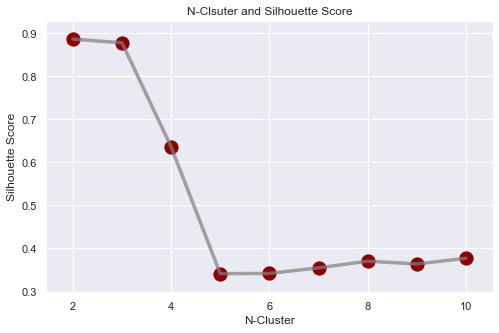

In [131]:
sils=[]

for k in range(2,11):
    km=KMeans(init='k-means++', n_clusters = k, n_init=100,random_state=101)
    km.fit(X_sc)
    sils.append(silhouette_score(X_sc,km.labels_,metric='euclidean'))
    silhouette_avg = silhouette_score(X_sc,km.labels_)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

    
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(range(2,11),sils,c='grey',lw=3.5,alpha=0.7)
ax.scatter(range(2,11),sils,c='darkred',s=175)

plt.title('N-Clsuter and Silhouette Score')
plt.xlabel('N-Cluster')
plt.ylabel('Silhouette Score')
plt.show()

For n_clusters = 2 The wcss is : 145700.80177268232
For n_clusters = 3 The wcss is : 133414.32740327503
For n_clusters = 4 The wcss is : 122092.41130916218
For n_clusters = 5 The wcss is : 112339.08712348476
For n_clusters = 6 The wcss is : 104118.4263308929
For n_clusters = 7 The wcss is : 98728.87216514084
For n_clusters = 8 The wcss is : 92773.95352427864
For n_clusters = 9 The wcss is : 86758.13599019674
For n_clusters = 10 The wcss is : 81090.41135275252


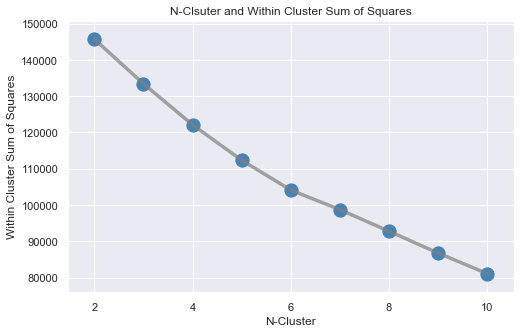

In [132]:
wcss=[]

for k in range(2,11):
    km=KMeans(init='k-means++', n_clusters = k, n_init=100,random_state=101)
    km.fit(X_sc)
    wcss.append(km.inertia_)
    
    print("For n_clusters =", k, "The wcss is :", km.inertia_)
    
fig, ax=plt.subplots(figsize=(8,5))
ax.plot(range(2,11),wcss,c='grey',lw=3.5,alpha=0.7)
ax.scatter(range(2,11),wcss,c='steelblue',s=175)
plt.title('N-Clsuter and Within Cluster Sum of Squares')
plt.xlabel('N-Cluster')
plt.ylabel('Within Cluster Sum of Squares')

plt.show()

In [133]:
scores = []
for k in range(2, 11):
    cl = KMeans(init='k-means++', n_clusters = k, n_init=100,random_state=101)
    cl.fit(X_sc)
    inertia = cl.inertia_
    
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

In [134]:
score_df

k   inertia  silhouette
0   2 145700.80        0.89
1   3 133414.33        0.88
2   4 122092.41        0.64
3   5 112339.09        0.34
4   6 104118.43        0.34
5   7  98728.87        0.36
6   8  92773.95        0.37
7   9  86758.14        0.36
8  10  81090.41        0.38

 <font color=darkblue> Based on Inertia and Silhoutte Score, k=3-7 will be fitted into Kmeans model to observe which will produce a good cluster.

## Fitting K= 3 in to KMeans

In [135]:
df_k3= customer_feat.copy()

In [136]:
df_k3.head()

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
Customer ID                                                          
12346.00                        5      74285                    26   
12347.00                        8       2967                   126   
12348.00                        5       2714                    28   
12349.00                        4       1624                   145   
12350.00                        1        197                    17   

             Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
Customer ID                                                                  
12346.00                   7.49                1.00                   7.49   
12347.00                  12.75                0.25                   1.95   
12348.00                  40.00                0.29                   0.55   
12349.00                 300.00                0.42                   2.55   
12350.00                  40.00                0.85                   1.65   

             Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Customer ID                                                  
12346.00                        0.48               3102.26   
12347.00                        0.32                196.86   
12348.00                        0.20                 80.78   
12349.00                        0.16                177.15   
12350.00                        0.04                 13.38   

             Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Customer ID                                                                    
12346.00                                 2.40                       15511.29   
12347.00                                 1.00                         615.19   
12348.00                                 1.00                         403.88   
12349.00                                 1.00                        1107.17   
12350.00                                 1.00                         334.40   

             Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Customer ID                                                   
12346.00                  6463.04                   6190.42   
12347.00                   615.19                    370.88   
12348.00                   403.88                    542.80   
12349.00                  1107.17                    406.00   
12350.00                   334.40                    197.00   

             Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Customer ID                                                                 
12346.00                       2.17      326         12  77556.46     726   
12347.00                      15.75        3          8   4921.53     405   
12348.00                       5.60       76          5   2019.40     439   
12349.00                      36.25       19          4   4428.69     590   
12350.00                      17.00      311          1    334.40     311   

             Customer_Country_Belgium  Customer_Country_France  \
Customer ID                                                      
12346.00                            0                        0   
12347.00                            0                        0   
12348.00                            0                        0   
12349.00                            0                        0   
12350.00                            0                        0   

             Customer_Country_Germany  Customer_Country_Italy  \
Customer ID                                                     
12346.00                            0                       0   
12347.00                            0                       0   
12348.00                            0                       0   
12349.00                            0                       1   
12350.00                            0                       0   

             Customer_Country_Netherlands  Customer_Country_Other Countries  \

In [137]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++',random_state=101)
label = km.fit_predict(X_sc)

In [138]:
df_k3['Cluster']=label

In [139]:
df_k3.shape

(5878, 29)

In [140]:
df_k3.head()

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
Customer ID                                                          
12346.00                        5      74285                    26   
12347.00                        8       2967                   126   
12348.00                        5       2714                    28   
12349.00                        4       1624                   145   
12350.00                        1        197                    17   

             Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
Customer ID                                                                  
12346.00                   7.49                1.00                   7.49   
12347.00                  12.75                0.25                   1.95   
12348.00                  40.00                0.29                   0.55   
12349.00                 300.00                0.42                   2.55   
12350.00                  40.00                0.85                   1.65   

             Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Customer ID                                                  
12346.00                        0.48               3102.26   
12347.00                        0.32                196.86   
12348.00                        0.20                 80.78   
12349.00                        0.16                177.15   
12350.00                        0.04                 13.38   

             Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Customer ID                                                                    
12346.00                                 2.40                       15511.29   
12347.00                                 1.00                         615.19   
12348.00                                 1.00                         403.88   
12349.00                                 1.00                        1107.17   
12350.00                                 1.00                         334.40   

             Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Customer ID                                                   
12346.00                  6463.04                   6190.42   
12347.00                   615.19                    370.88   
12348.00                   403.88                    542.80   
12349.00                  1107.17                    406.00   
12350.00                   334.40                    197.00   

             Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Customer ID                                                                 
12346.00                       2.17      326         12  77556.46     726   
12347.00                      15.75        3          8   4921.53     405   
12348.00                       5.60       76          5   2019.40     439   
12349.00                      36.25       19          4   4428.69     590   
12350.00                      17.00      311          1    334.40     311   

             Customer_Country_Belgium  Customer_Country_France  \
Customer ID                                                      
12346.00                            0                        0   
12347.00                            0                        0   
12348.00                            0                        0   
12349.00                            0                        0   
12350.00                            0                        0   

             Customer_Country_Germany  Customer_Country_Italy  \
Customer ID                                                     
12346.00                            0                       0   
12347.00                            0                       0   
12348.00                            0                       0   
12349.00                            0                       1   
12350.00                            0                       0   

             Customer_Country_Netherlands  Customer_Country_Other Countries  \

In [141]:
df_k3['Cluster'].value_counts()

0    5852
2      24
1       2
Name: Cluster, dtype: int64

### KMeans K=3, Clusters Formed

In [142]:
# df_k3.groupby(['Cluster']).mean()

In [143]:
centroids=pd.DataFrame(sc.inverse_transform(km.cluster_centers_),columns=['No_of_Months_Transac', 'Total_Qty', 'Number_of_Item_Types',
       'Max_Item_UnitPrice', 'Min_Item_UnitPrice', 'Median_Item_UnitPrice',
       'Avg_Transaction_Per_Mth', 'Avg_Spending_Per_Mth',
       'Ratio_Transaction_Per_Unique_Mth', 'Ratio_Spending_Per_Unique_Mth',
       'Avg_Spending_Per_Inv', 'Avg_Purchase_Qty_Per_Inv',
       'Avg_Item_Types_Per_Inv', 'Recency', 'Frequency', 'Monetary', 'Tenure',
       'Customer_Country_Belgium', 'Customer_Country_France',
       'Customer_Country_Germany', 'Customer_Country_Italy',
       'Customer_Country_Netherlands', 'Customer_Country_Other Countries',
       'Customer_Country_Portugal', 'Customer_Country_Spain',
       'Customer_Country_Sweden', 'Customer_Country_Switzerland',
       'Customer_Country_United Kingdom'])


In [144]:
centroids

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  Max_Item_UnitPrice  \
0                  4.29    1373.46                 81.30               30.38   
1                  1.00       1.50                  1.00             8955.84   
2                 19.92  103185.00                767.71              985.35   

   Min_Item_UnitPrice  Median_Item_UnitPrice  Avg_Transaction_Per_Mth  \
0                1.92                   4.51                     0.23   
1             8955.84                8955.83                     0.06   
2                0.24                   1.61                     5.26   

   Avg_Spending_Per_Mth  Ratio_Transaction_Per_Unique_Mth  \
0                 92.24                              1.20   
1                497.40                              1.50   
2               6424.49                              6.14   

   Ratio_Spending_Per_Unique_Mth  Avg_Spending_Per_Inv  \
0                         451.63                360.32   
1                       12434.92               8955.83   
2                       11330.02               5733.09   

   Avg_Purchase_Qty_Per_Inv  Avg_Item_Types_Per_Inv  Recency  Frequency  \
0                    215.85                   17.90   202.28       5.78   
1                      1.00                    0.75   629.00       1.50   
2                   7998.52                    7.75    66.25     131.38   

   Monetary  Tenure  Customer_Country_Belgium  Customer_Country_France  \
0   2306.09  474.37                      0.00                     0.02   
1  12434.92  629.00                      0.00                     0.00   
2 160612.29  678.71                      0.00                     0.00   

   Customer_Country_Germany  Customer_Country_Italy  \
0                      0.02                    0.00   
1                      0.00                    0.00   
2                      0.00                    0.00   

   Customer_Country_Netherlands  Customer_Country_Other Countries  \
0                          0.00                              0.03   
1                          0.00                              0.50   
2                          0.04                              0.17   

   Customer_Country_Portugal  Customer_Country_Spain  Customer_Country_Sweden  \
0                       0.00                    0.01                     0.00   
1                       0.00                    0.00                     0.00   
2                      -0.00                    0.00                     0.00   

   Customer_Country_Switzerland  Customer_Country_United Kingdom  
0                          0.00                             0.91  
1                          0.00                             0.50  
2                          0.00                             0.79

In [145]:
grouped_clustter_k3=df_k3.groupby(['Cluster']).agg({'Cluster':'count',
                                                    'No_of_Months_Transac':'mean',
                                                    'Total_Qty':'mean',
                                                    'Number_of_Item_Types':'mean',
                                                    'Max_Item_UnitPrice':'mean',
                                                    'Min_Item_UnitPrice':'mean',
                                                    'Median_Item_UnitPrice':'mean',
                                                    'Avg_Transaction_Per_Mth':'mean',
                                                    'Avg_Spending_Per_Mth':'mean',
                                                    'Ratio_Transaction_Per_Unique_Mth':'mean',
                                                    'Ratio_Spending_Per_Unique_Mth':'mean',                                                    
                                                    'Avg_Spending_Per_Inv':'mean',
                                                    'Avg_Purchase_Qty_Per_Inv':'mean',
                                                    'Avg_Item_Types_Per_Inv':'mean',
                                                    'Recency':'mean',
                                                    'Frequency':'mean',
                                                    'Monetary':'mean',
                                                    'Tenure':'mean',
                                                    'Customer_Country_Belgium':'sum',
                                                    'Customer_Country_France':'sum',
                                                    'Customer_Country_Germany':'sum',
                                                    'Customer_Country_Italy':'sum',
                                                    'Customer_Country_Netherlands':'sum',
                                                    'Customer_Country_Other Countries':'sum',
                                                    'Customer_Country_Portugal':'sum',
                                                    'Customer_Country_Spain':'sum',
                                                    'Customer_Country_Sweden':'sum',
                                                    'Customer_Country_Switzerland':'sum',
                                                    'Customer_Country_United Kingdom':'sum'})                                                                                           
                                                                                                      
grouped_clustter_k3.rename(columns={'Cluster':'Number of Customer'},inplace=True)                                                 
grouped_clustter_k3


Number of Customer  No_of_Months_Transac  Total_Qty  \
Cluster                                                        
0                      5852                  4.29    1373.46   
1                         2                  1.00       1.50   
2                        24                 19.92  103185.00   

         Number_of_Item_Types  Max_Item_UnitPrice  Min_Item_UnitPrice  \
Cluster                                                                 
0                       81.30               30.38                1.92   
1                        1.00             8955.83             8955.83   
2                      767.71              985.35                0.24   

         Median_Item_UnitPrice  Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Cluster                                                                         
0                         4.51                     0.23                 92.24   
1                      8955.83                     0.06                497.40   
2                         1.61                     5.25               6424.49   

         Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Cluster                                                                    
0                                    1.20                         451.63   
1                                    1.50                       12434.92   
2                                    6.14                       11330.02   

         Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Cluster                                                   
0                      360.32                    215.85   
1                     8955.83                      1.00   
2                     5733.09                   7998.52   

         Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Cluster                                                                 
0                         17.90   202.28       5.78   2306.09  474.37   
1                          0.75   629.00       1.50  12434.92  629.00   
2                          7.75    66.25     131.38 160612.29  678.71   

         Customer_Country_Belgium  Customer_Country_France  \
Cluster                                                      
0                              27                       93   
1                               0                        0   
2                               0                        0   

         Customer_Country_Germany  Customer_Country_Italy  \
Cluster                                                     
0                             107                      17   
1                               0                       0   
2                               0                       0   

         Customer_Country_Netherlands  Customer_Country_Other Countries  \
Cluster                                                                   
0                                  21                               155   
1                                   0                                 1   
2                                   1                                 4   

         Customer_Country_Portugal  Customer_Country_Spain  \
Cluster                                                      
0                               24                      39   
1                                0                       0   
2                                0                       0   

         Customer_Country_Sweden  Customer_Country_Switzerland  \
Cluster                                                          
0                             19                            21   
1                              0                             0   
2                              0                             0   

         Customer_Country_United Kingdom  
Cluster                                   
0                                   5329  
1                                      1  
2                                     19

In [146]:
grouped_clustter_k3_country=df_k3.groupby(['Cluster']).agg({
#                                                     'Cluster':'count',
                                                    'Customer_Country_Belgium':'sum',
                                                    'Customer_Country_France':'sum',
                                                    'Customer_Country_Germany':'sum',
                                                    'Customer_Country_Italy':'sum',
                                                    'Customer_Country_Netherlands':'sum',
                                                    'Customer_Country_Other Countries':'sum',
                                                    'Customer_Country_Portugal':'sum',
                                                    'Customer_Country_Spain':'sum',
                                                    'Customer_Country_Sweden':'sum',
                                                    'Customer_Country_Switzerland':'sum',
                                                    'Customer_Country_United Kingdom':'sum' 
                                                   })
grouped_clustter_k3_country=grouped_clustter_k3_country.transpose()
grouped_clustter_k3_country.sort_values(by=0,ascending=False)

Cluster                              0  1   2
Customer_Country_United Kingdom   5329  1  19
Customer_Country_Other Countries   155  1   4
Customer_Country_Germany           107  0   0
Customer_Country_France             93  0   0
Customer_Country_Spain              39  0   0
Customer_Country_Belgium            27  0   0
Customer_Country_Portugal           24  0   0
Customer_Country_Netherlands        21  0   1
Customer_Country_Switzerland        21  0   0
Customer_Country_Sweden             19  0   0
Customer_Country_Italy              17  0   0

In [147]:
df_k3.reset_index(inplace=True)
df_k3.head()

Customer ID  No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
0     12346.00                     5      74285                    26   
1     12347.00                     8       2967                   126   
2     12348.00                     5       2714                    28   
3     12349.00                     4       1624                   145   
4     12350.00                     1        197                    17   

   Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
0                7.49                1.00                   7.49   
1               12.75                0.25                   1.95   
2               40.00                0.29                   0.55   
3              300.00                0.42                   2.55   
4               40.00                0.85                   1.65   

   Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
0                     0.48               3102.26   
1                     0.32                196.86   
2                     0.20                 80.78   
3                     0.16                177.15   
4                     0.04                 13.38   

   Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
0                              2.40                       15511.29   
1                              1.00                         615.19   
2                              1.00                         403.88   
3                              1.00                        1107.17   
4                              1.00                         334.40   

   Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  Avg_Item_Types_Per_Inv  \
0               6463.04                   6190.42                    2.17   
1                615.19                    370.88                   15.75   
2                403.88                    542.80                    5.60   
3               1107.17                    406.00                   36.25   
4                334.40                    197.00                   17.00   

   Recency  Frequency  Monetary  Tenure  Customer_Country_Belgium  \
0      326         12  77556.46     726                         0   
1        3          8   4921.53     405                         0   
2       76          5   2019.40     439                         0   
3       19          4   4428.69     590                         0   
4      311          1    334.40     311                         0   

   Customer_Country_France  Customer_Country_Germany  Customer_Country_Italy  \
0                        0                         0                       0   
1                        0                         0                       0   
2                        0                         0                       0   
3                        0                         0                       1   
4                        0                         0                       0   

   Customer_Country_Netherlands  Customer_Country_Other Countries  \
0                             0                                 0   
1                             0                                 1   
2                             0                                 1   
3                             0                                 0   
4                             0                                 1   

   Customer_Country_Portugal  Customer_Country_Spain  Customer_Country_Sweden  \
0                          0                       0                        0   
1                          0                       0                        0   
2                          0                       0                        0   
3                          0                       0                        0   
4                          0                       0                        0   

   Customer_Country_Switzerland  Customer_Country_United Kingdom  Cluster  
0                             0                                1        0  
1       

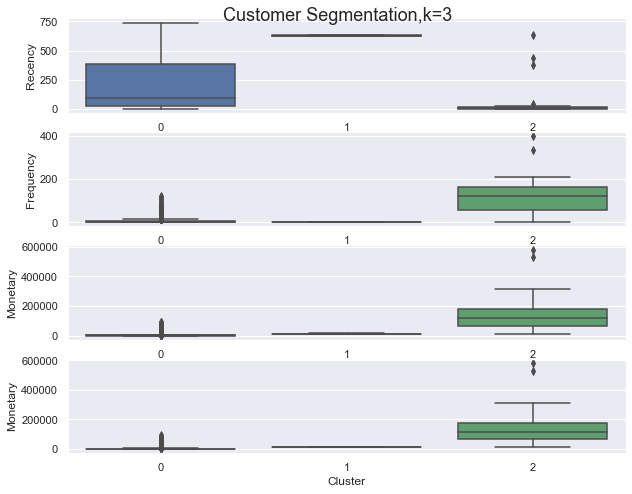

In [148]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,8))

fig.suptitle('Customer Segmentation,k=3',x=0.5, y=0.9, horizontalalignment='center', verticalalignment='top', fontsize = 18)

ax_0=sns.boxplot(y="Recency", x= "Cluster", data=df_k3,  orient='v' , ax=axes[0])
ax_1=sns.boxplot(y="Frequency", x= "Cluster", data=df_k3,  orient='v' , ax=axes[1])
ax_2=sns.boxplot(y="Monetary", x= "Cluster", data=df_k3,  orient='v' , ax=axes[2])
ax_3=sns.boxplot(y="Monetary", x= "Cluster", data=df_k3,  orient='v' , ax=axes[3])

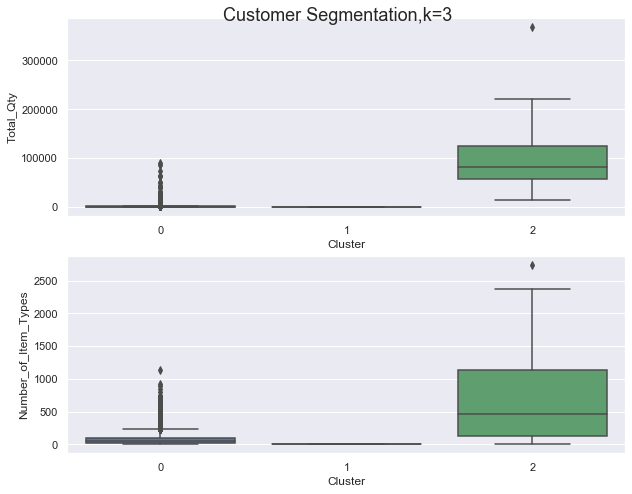

In [149]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

fig.suptitle('Customer Segmentation,k=3',x=0.5, y=0.9, horizontalalignment='center', verticalalignment='top', fontsize = 18)

ax_0=sns.boxplot(y="Total_Qty", x= "Cluster", data=df_k3,  orient='v' , ax=axes[0])
ax_1=sns.boxplot(y="Number_of_Item_Types", x= "Cluster", data=df_k3,  orient='v' , ax=axes[1])


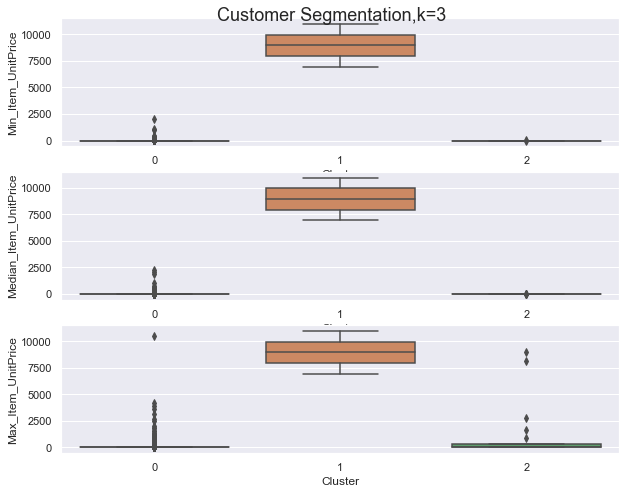

In [150]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,8))

fig.suptitle('Customer Segmentation,k=3',x=0.5, y=0.9, horizontalalignment='center', verticalalignment='top', fontsize = 18)

ax_0=sns.boxplot(y="Min_Item_UnitPrice", x= "Cluster", data=df_k3,  orient='v' , ax=axes[0])
ax_1=sns.boxplot(y="Median_Item_UnitPrice", x= "Cluster", data=df_k3,  orient='v' , ax=axes[1])
ax_2=sns.boxplot(y="Max_Item_UnitPrice", x= "Cluster", data=df_k3,  orient='v' , ax=axes[2])


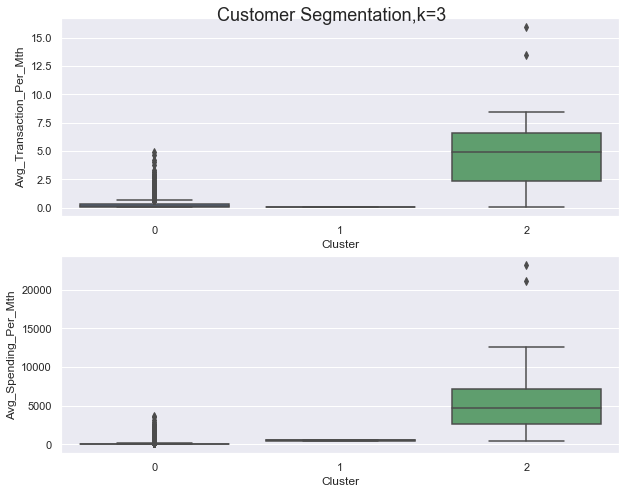

In [151]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

fig.suptitle('Customer Segmentation,k=3',x=0.5, y=0.9, horizontalalignment='center', verticalalignment='top', fontsize = 18)

ax_0=sns.boxplot(y="Avg_Transaction_Per_Mth", x= "Cluster", data=df_k3,  orient='v' , ax=axes[0])
ax_1=sns.boxplot(y="Avg_Spending_Per_Mth", x= "Cluster", data=df_k3,  orient='v' , ax=axes[1])

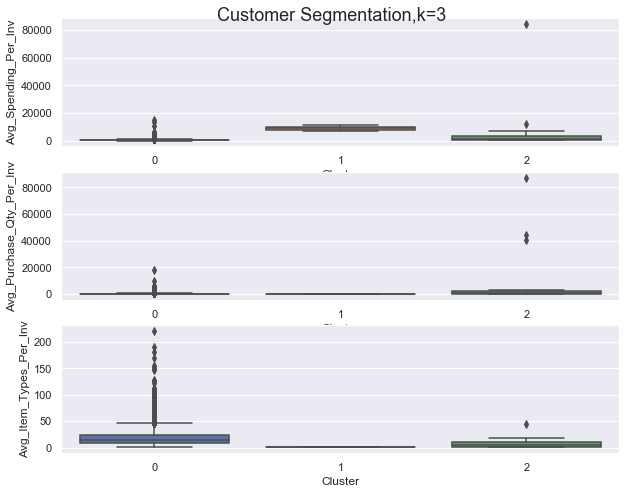

In [152]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,8))

fig.suptitle('Customer Segmentation,k=3',x=0.5, y=0.9, horizontalalignment='center', verticalalignment='top', fontsize = 18)

ax_0=sns.boxplot(y="Avg_Spending_Per_Inv", x= "Cluster", data=df_k3,  orient='v' , ax=axes[0])
ax_1=sns.boxplot(y="Avg_Purchase_Qty_Per_Inv", x= "Cluster", data=df_k3,  orient='v' , ax=axes[1])
ax_2=sns.boxplot(y="Avg_Item_Types_Per_Inv", x= "Cluster", data=df_k3,  orient='v' , ax=axes[2])

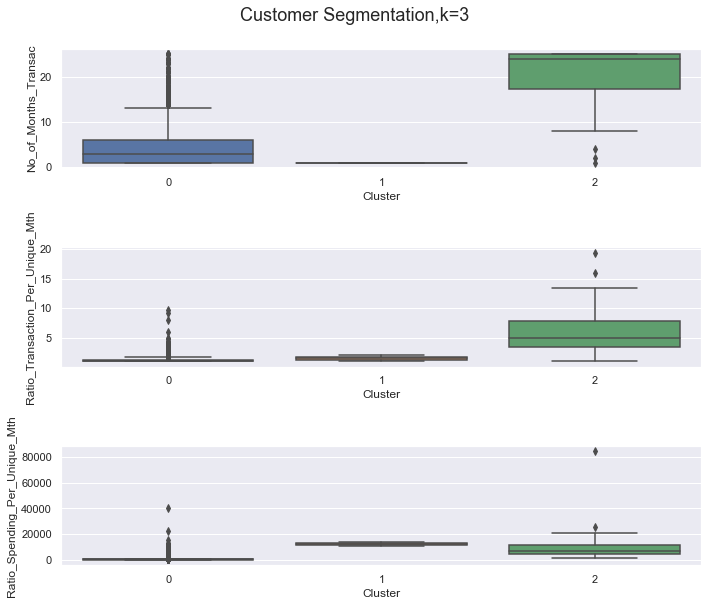

In [153]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,8))

fig.suptitle('Customer Segmentation,k=3',x=0.5, y=1.05, horizontalalignment='center', verticalalignment='top', fontsize = 18)

ax_0=sns.boxplot(y="No_of_Months_Transac", x= "Cluster", data=df_k3,  orient='v' , ax=axes[0])
ax_1=sns.boxplot(y="Ratio_Transaction_Per_Unique_Mth", x= "Cluster", data=df_k3,  orient='v' , ax=axes[1])
ax_2=sns.boxplot(y="Ratio_Spending_Per_Unique_Mth", x= "Cluster", data=df_k3,  orient='v' , ax=axes[2])

fig.tight_layout()

In [154]:
grouped_clustter_k3

Number of Customer  No_of_Months_Transac  Total_Qty  \
Cluster                                                        
0                      5852                  4.29    1373.46   
1                         2                  1.00       1.50   
2                        24                 19.92  103185.00   

         Number_of_Item_Types  Max_Item_UnitPrice  Min_Item_UnitPrice  \
Cluster                                                                 
0                       81.30               30.38                1.92   
1                        1.00             8955.83             8955.83   
2                      767.71              985.35                0.24   

         Median_Item_UnitPrice  Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Cluster                                                                         
0                         4.51                     0.23                 92.24   
1                      8955.83                     0.06                497.40   
2                         1.61                     5.25               6424.49   

         Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Cluster                                                                    
0                                    1.20                         451.63   
1                                    1.50                       12434.92   
2                                    6.14                       11330.02   

         Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Cluster                                                   
0                      360.32                    215.85   
1                     8955.83                      1.00   
2                     5733.09                   7998.52   

         Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Cluster                                                                 
0                         17.90   202.28       5.78   2306.09  474.37   
1                          0.75   629.00       1.50  12434.92  629.00   
2                          7.75    66.25     131.38 160612.29  678.71   

         Customer_Country_Belgium  Customer_Country_France  \
Cluster                                                      
0                              27                       93   
1                               0                        0   
2                               0                        0   

         Customer_Country_Germany  Customer_Country_Italy  \
Cluster                                                     
0                             107                      17   
1                               0                       0   
2                               0                       0   

         Customer_Country_Netherlands  Customer_Country_Other Countries  \
Cluster                                                                   
0                                  21                               155   
1                                   0                                 1   
2                                   1                                 4   

         Customer_Country_Portugal  Customer_Country_Spain  \
Cluster                                                      
0                               24                      39   
1                                0                       0   
2                                0                       0   

         Customer_Country_Sweden  Customer_Country_Switzerland  \
Cluster                                                          
0                             19                            21   
1                              0                             0   
2                              0                             0   

         Customer_Country_United Kingdom  
Cluster                                   
0                                   5329  
1                                      1  
2                                     19

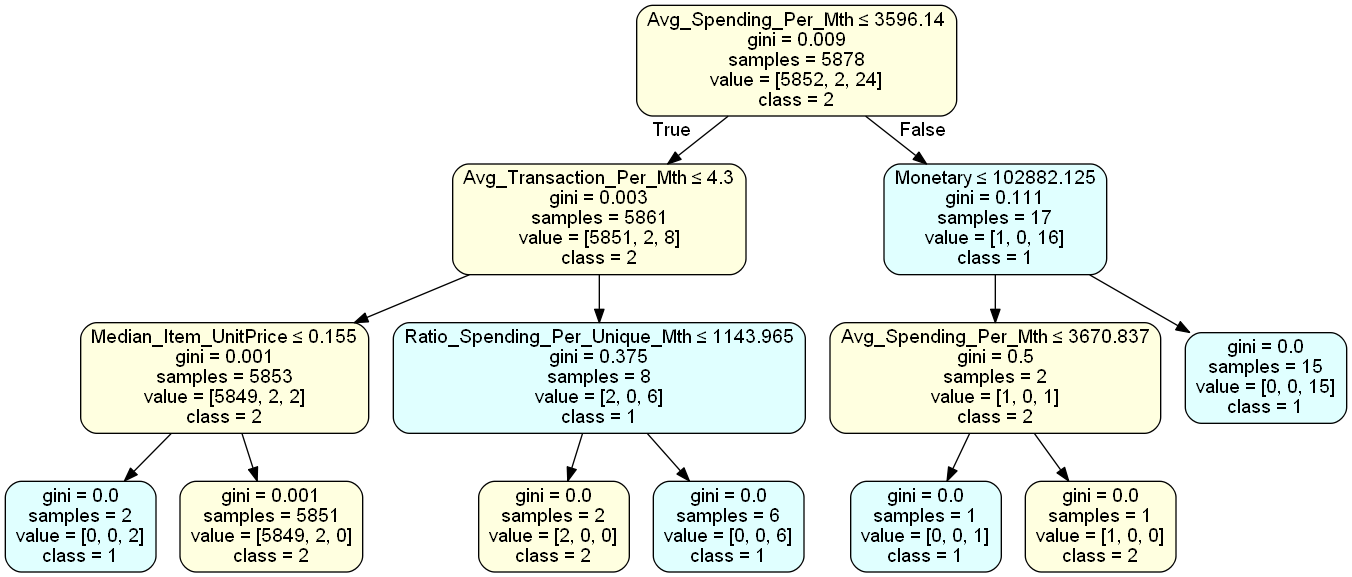

In [155]:
df_k3['Cluster']=df_k3["Cluster"].apply(str)

dt = tree.DecisionTreeClassifier(random_state = 101,max_depth=3)  
dt = dt.fit(df_k3.iloc[:,1:29],df_k3.iloc[:,29])  

 

import pydotplus  
dot_data = tree.export_graphviz(dt, out_file=None)  
graph2 = pydotplus.graph_from_dot_data(dot_data)  
graph2.write_pdf("../tree/tree.pdf")  

from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None,  
                     feature_names=list(df_k3.iloc[:,1:29].columns),
                     class_names=list(set(df_k3['Cluster'].values)),
                     filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)  
graph2 = pydotplus.graph_from_dot_data(dot_data)

## Color of nodes
nodes = graph2.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [224,255,255],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )
#

Image(graph2.create_png() ) 

 <font color=darkblue> A decision tree is plotted with max_depth=3 to observe at under what condition the customers are segmented.The root node started with 'No_of_Months_Transac', followed by 'Tenure'
at first branch.

## Fitting K= 4 in to KMeans

In [156]:
df_k4= customer_feat.copy()

In [157]:
df_k4.head()

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
Customer ID                                                          
12346.00                        5      74285                    26   
12347.00                        8       2967                   126   
12348.00                        5       2714                    28   
12349.00                        4       1624                   145   
12350.00                        1        197                    17   

             Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
Customer ID                                                                  
12346.00                   7.49                1.00                   7.49   
12347.00                  12.75                0.25                   1.95   
12348.00                  40.00                0.29                   0.55   
12349.00                 300.00                0.42                   2.55   
12350.00                  40.00                0.85                   1.65   

             Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Customer ID                                                  
12346.00                        0.48               3102.26   
12347.00                        0.32                196.86   
12348.00                        0.20                 80.78   
12349.00                        0.16                177.15   
12350.00                        0.04                 13.38   

             Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Customer ID                                                                    
12346.00                                 2.40                       15511.29   
12347.00                                 1.00                         615.19   
12348.00                                 1.00                         403.88   
12349.00                                 1.00                        1107.17   
12350.00                                 1.00                         334.40   

             Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Customer ID                                                   
12346.00                  6463.04                   6190.42   
12347.00                   615.19                    370.88   
12348.00                   403.88                    542.80   
12349.00                  1107.17                    406.00   
12350.00                   334.40                    197.00   

             Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Customer ID                                                                 
12346.00                       2.17      326         12  77556.46     726   
12347.00                      15.75        3          8   4921.53     405   
12348.00                       5.60       76          5   2019.40     439   
12349.00                      36.25       19          4   4428.69     590   
12350.00                      17.00      311          1    334.40     311   

             Customer_Country_Belgium  Customer_Country_France  \
Customer ID                                                      
12346.00                            0                        0   
12347.00                            0                        0   
12348.00                            0                        0   
12349.00                            0                        0   
12350.00                            0                        0   

             Customer_Country_Germany  Customer_Country_Italy  \
Customer ID                                                     
12346.00                            0                       0   
12347.00                            0                       0   
12348.00                            0                       0   
12349.00                            0                       1   
12350.00                            0                       0   

             Customer_Country_Netherlands  Customer_Country_Other Countries  \

In [158]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++',random_state=101)
label = km.fit_predict(X_sc)

In [159]:
df_k4['Cluster']=label

In [160]:
df_k4.shape

(5878, 29)

In [161]:
df_k4.head()

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
Customer ID                                                          
12346.00                        5      74285                    26   
12347.00                        8       2967                   126   
12348.00                        5       2714                    28   
12349.00                        4       1624                   145   
12350.00                        1        197                    17   

             Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
Customer ID                                                                  
12346.00                   7.49                1.00                   7.49   
12347.00                  12.75                0.25                   1.95   
12348.00                  40.00                0.29                   0.55   
12349.00                 300.00                0.42                   2.55   
12350.00                  40.00                0.85                   1.65   

             Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Customer ID                                                  
12346.00                        0.48               3102.26   
12347.00                        0.32                196.86   
12348.00                        0.20                 80.78   
12349.00                        0.16                177.15   
12350.00                        0.04                 13.38   

             Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Customer ID                                                                    
12346.00                                 2.40                       15511.29   
12347.00                                 1.00                         615.19   
12348.00                                 1.00                         403.88   
12349.00                                 1.00                        1107.17   
12350.00                                 1.00                         334.40   

             Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Customer ID                                                   
12346.00                  6463.04                   6190.42   
12347.00                   615.19                    370.88   
12348.00                   403.88                    542.80   
12349.00                  1107.17                    406.00   
12350.00                   334.40                    197.00   

             Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Customer ID                                                                 
12346.00                       2.17      326         12  77556.46     726   
12347.00                      15.75        3          8   4921.53     405   
12348.00                       5.60       76          5   2019.40     439   
12349.00                      36.25       19          4   4428.69     590   
12350.00                      17.00      311          1    334.40     311   

             Customer_Country_Belgium  Customer_Country_France  \
Customer ID                                                      
12346.00                            0                        0   
12347.00                            0                        0   
12348.00                            0                        0   
12349.00                            0                        0   
12350.00                            0                        0   

             Customer_Country_Germany  Customer_Country_Italy  \
Customer ID                                                     
12346.00                            0                       0   
12347.00                            0                       0   
12348.00                            0                       0   
12349.00                            0                       1   
12350.00                            0                       0   

             Customer_Country_Netherlands  Customer_Country_Other Countries  \

In [162]:
df_k4['Cluster'].value_counts()

3    5329
1     523
0      24
2       2
Name: Cluster, dtype: int64

### KMeans K=4, Clusters Formed

In [163]:
centroids=pd.DataFrame(sc.inverse_transform(km.cluster_centers_),columns=['No_of_Months_Transac', 'Total_Qty', 'Number_of_Item_Types',
       'Max_Item_UnitPrice', 'Min_Item_UnitPrice', 'Median_Item_UnitPrice',
       'Avg_Transaction_Per_Mth', 'Avg_Spending_Per_Mth',
       'Ratio_Transaction_Per_Unique_Mth', 'Ratio_Spending_Per_Unique_Mth',
       'Avg_Spending_Per_Inv', 'Avg_Purchase_Qty_Per_Inv',
       'Avg_Item_Types_Per_Inv', 'Recency', 'Frequency', 'Monetary', 'Tenure',
       'Customer_Country_Belgium', 'Customer_Country_France',
       'Customer_Country_Germany', 'Customer_Country_Italy',
       'Customer_Country_Netherlands', 'Customer_Country_Other Countries',
       'Customer_Country_Portugal', 'Customer_Country_Spain',
       'Customer_Country_Sweden', 'Customer_Country_Switzerland',
       'Customer_Country_United Kingdom'])

In [164]:
centroids

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  Max_Item_UnitPrice  \
0                 19.92  103185.00                767.71              985.35   
1                  3.99    1893.82                 79.34               83.58   
2                  1.00       1.50                  1.00             8955.84   
3                  4.32    1322.39                 81.49               25.16   

   Min_Item_UnitPrice  Median_Item_UnitPrice  Avg_Transaction_Per_Mth  \
0                0.24                   1.61                     5.26   
1                2.05                   7.37                     0.21   
2             8955.84                8955.83                     0.06   
3                1.91                   4.23                     0.23   

   Avg_Spending_Per_Mth  Ratio_Transaction_Per_Unique_Mth  \
0               6424.49                              6.14   
1                126.99                              1.19   
2                497.40                              1.50   
3                 88.83                              1.21   

   Ratio_Spending_Per_Unique_Mth  Avg_Spending_Per_Inv  \
0                       11330.02               5733.09   
1                         746.03                609.41   
2                       12434.92               8955.83   
3                         422.74                335.87   

   Avg_Purchase_Qty_Per_Inv  Avg_Item_Types_Per_Inv  Recency  Frequency  \
0                   7998.52                    7.75    66.25     131.38   
1                    347.16                   20.70   185.06       5.14   
2                      1.00                    0.75   629.00       1.50   
3                    202.97                   17.62   203.97       5.84   

   Monetary  Tenure  Customer_Country_Belgium  Customer_Country_France  \
0 160612.29  678.71                      0.00                     0.00   
1   3174.69  427.49                      0.05                     0.18   
2  12434.92  629.00                      0.00                     0.00   
3   2220.84  478.98                      0.00                     0.00   

   Customer_Country_Germany  Customer_Country_Italy  \
0                      0.00                    0.00   
1                      0.20                    0.03   
2                      0.00                    0.00   
3                     -0.00                    0.00   

   Customer_Country_Netherlands  Customer_Country_Other Countries  \
0                          0.04                              0.17   
1                          0.04                              0.30   
2                          0.00                              0.50   
3                         -0.00                             -0.00   

   Customer_Country_Portugal  Customer_Country_Spain  Customer_Country_Sweden  \
0                      -0.00                    0.00                     0.00   
1                       0.05                    0.07                     0.04   
2                       0.00                    0.00                     0.00   
3                      -0.00                   -0.00                     0.00   

   Customer_Country_Switzerland  Customer_Country_United Kingdom  
0                          0.00                             0.79  
1                          0.04                             0.00  
2                          0.00                             0.50  
3                         -0.00                             1.00

In [165]:
grouped_clustter_k4=df_k4.groupby(['Cluster']).agg({'Cluster':'count',
                                                    'No_of_Months_Transac':'mean',
                                                    'Total_Qty':'mean',
                                                    'Number_of_Item_Types':'mean',
                                                    'Max_Item_UnitPrice':'mean',
                                                    'Min_Item_UnitPrice':'mean',
                                                    'Median_Item_UnitPrice':'mean',
                                                    'Avg_Transaction_Per_Mth':'mean',
                                                    'Avg_Spending_Per_Mth':'mean',
                                                    'Ratio_Transaction_Per_Unique_Mth':'mean',
                                                    'Ratio_Spending_Per_Unique_Mth':'mean',                                                    
                                                    'Avg_Spending_Per_Inv':'mean',
                                                    'Avg_Purchase_Qty_Per_Inv':'mean',
                                                    'Avg_Item_Types_Per_Inv':'mean',
                                                    'Recency':'mean',
                                                    'Frequency':'mean',
                                                    'Monetary':'mean',
                                                    'Tenure':'mean',
                                                    'Customer_Country_Belgium':'sum',
                                                    'Customer_Country_France':'sum',
                                                    'Customer_Country_Germany':'sum',
                                                    'Customer_Country_Italy':'sum',
                                                    'Customer_Country_Netherlands':'sum',
                                                    'Customer_Country_Other Countries':'sum',
                                                    'Customer_Country_Portugal':'sum',
                                                    'Customer_Country_Spain':'sum',
                                                    'Customer_Country_Sweden':'sum',
                                                    'Customer_Country_Switzerland':'sum',
                                                    'Customer_Country_United Kingdom':'sum'})                                                                                           
                                                                                                      
grouped_clustter_k4.rename(columns={'Cluster':'Number of Customer'},inplace=True)                                                 
grouped_clustter_k4

Number of Customer  No_of_Months_Transac  Total_Qty  \
Cluster                                                        
0                        24                 19.92  103185.00   
1                       523                  3.99    1893.82   
2                         2                  1.00       1.50   
3                      5329                  4.32    1322.39   

         Number_of_Item_Types  Max_Item_UnitPrice  Min_Item_UnitPrice  \
Cluster                                                                 
0                      767.71              985.35                0.24   
1                       79.34               83.58                2.05   
2                        1.00             8955.83             8955.83   
3                       81.49               25.16                1.91   

         Median_Item_UnitPrice  Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Cluster                                                                         
0                         1.61                     5.25               6424.49   
1                         7.37                     0.21                126.99   
2                      8955.83                     0.06                497.40   
3                         4.23                     0.23                 88.83   

         Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Cluster                                                                    
0                                    6.14                       11330.02   
1                                    1.19                         746.03   
2                                    1.50                       12434.92   
3                                    1.21                         422.74   

         Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Cluster                                                   
0                     5733.09                   7998.52   
1                      609.41                    347.16   
2                     8955.83                      1.00   
3                      335.87                    202.97   

         Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Cluster                                                                 
0                          7.75    66.25     131.38 160612.29  678.71   
1                         20.70   185.06       5.14   3174.69  427.49   
2                          0.75   629.00       1.50  12434.92  629.00   
3                         17.62   203.97       5.84   2220.84  478.98   

         Customer_Country_Belgium  Customer_Country_France  \
Cluster                                                      
0                               0                        0   
1                              27                       93   
2                               0                        0   
3                               0                        0   

         Customer_Country_Germany  Customer_Country_Italy  \
Cluster                                                     
0                               0                       0   
1                             107                      17   
2                               0                       0   
3                               0                       0   

         Customer_Country_Netherlands  Customer_Country_Other Countries  \
Cluster                                                                   
0                                   1                                 4   
1                                  21                               155   
2                                   0                                 1   
3                                   0                                 0   

         Customer_Country_Portugal  Customer_Country_Spain  \
Cluster                                                      
0                                0                       0   
1                               24                      39   
2       

In [166]:
grouped_clustter_k4_country=df_k4.groupby(['Cluster']).agg({
#                                                     'Cluster':'count',
                                                    'Customer_Country_Belgium':'sum',
                                                    'Customer_Country_France':'sum',
                                                    'Customer_Country_Germany':'sum',
                                                    'Customer_Country_Italy':'sum',
                                                    'Customer_Country_Netherlands':'sum',
                                                    'Customer_Country_Other Countries':'sum',
                                                    'Customer_Country_Portugal':'sum',
                                                    'Customer_Country_Spain':'sum',
                                                    'Customer_Country_Sweden':'sum',
                                                    'Customer_Country_Switzerland':'sum',
                                                    'Customer_Country_United Kingdom':'sum' 
                                                   })
grouped_clustter_k4_country=grouped_clustter_k4_country.transpose()
grouped_clustter_k4_country.sort_values(by=0,ascending=False)

Cluster                            0    1  2     3
Customer_Country_United Kingdom   19    0  1  5329
Customer_Country_Other Countries   4  155  1     0
Customer_Country_Netherlands       1   21  0     0
Customer_Country_Belgium           0   27  0     0
Customer_Country_France            0   93  0     0
Customer_Country_Germany           0  107  0     0
Customer_Country_Italy             0   17  0     0
Customer_Country_Portugal          0   24  0     0
Customer_Country_Spain             0   39  0     0
Customer_Country_Sweden            0   19  0     0
Customer_Country_Switzerland       0   21  0     0

In [167]:
df_k4.reset_index(inplace=True)
df_k4.head()


Customer ID  No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
0     12346.00                     5      74285                    26   
1     12347.00                     8       2967                   126   
2     12348.00                     5       2714                    28   
3     12349.00                     4       1624                   145   
4     12350.00                     1        197                    17   

   Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
0                7.49                1.00                   7.49   
1               12.75                0.25                   1.95   
2               40.00                0.29                   0.55   
3              300.00                0.42                   2.55   
4               40.00                0.85                   1.65   

   Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
0                     0.48               3102.26   
1                     0.32                196.86   
2                     0.20                 80.78   
3                     0.16                177.15   
4                     0.04                 13.38   

   Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
0                              2.40                       15511.29   
1                              1.00                         615.19   
2                              1.00                         403.88   
3                              1.00                        1107.17   
4                              1.00                         334.40   

   Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  Avg_Item_Types_Per_Inv  \
0               6463.04                   6190.42                    2.17   
1                615.19                    370.88                   15.75   
2                403.88                    542.80                    5.60   
3               1107.17                    406.00                   36.25   
4                334.40                    197.00                   17.00   

   Recency  Frequency  Monetary  Tenure  Customer_Country_Belgium  \
0      326         12  77556.46     726                         0   
1        3          8   4921.53     405                         0   
2       76          5   2019.40     439                         0   
3       19          4   4428.69     590                         0   
4      311          1    334.40     311                         0   

   Customer_Country_France  Customer_Country_Germany  Customer_Country_Italy  \
0                        0                         0                       0   
1                        0                         0                       0   
2                        0                         0                       0   
3                        0                         0                       1   
4                        0                         0                       0   

   Customer_Country_Netherlands  Customer_Country_Other Countries  \
0                             0                                 0   
1                             0                                 1   
2                             0                                 1   
3                             0                                 0   
4                             0                                 1   

   Customer_Country_Portugal  Customer_Country_Spain  Customer_Country_Sweden  \
0                          0                       0                        0   
1                          0                       0                        0   
2                          0                       0                        0   
3                          0                       0                        0   
4                          0                       0                        0   

   Customer_Country_Switzerland  Customer_Country_United Kingdom  Cluster  
0                             0                                1        3  
1       

In [168]:
grouped_clustter_k4

Number of Customer  No_of_Months_Transac  Total_Qty  \
Cluster                                                        
0                        24                 19.92  103185.00   
1                       523                  3.99    1893.82   
2                         2                  1.00       1.50   
3                      5329                  4.32    1322.39   

         Number_of_Item_Types  Max_Item_UnitPrice  Min_Item_UnitPrice  \
Cluster                                                                 
0                      767.71              985.35                0.24   
1                       79.34               83.58                2.05   
2                        1.00             8955.83             8955.83   
3                       81.49               25.16                1.91   

         Median_Item_UnitPrice  Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Cluster                                                                         
0                         1.61                     5.25               6424.49   
1                         7.37                     0.21                126.99   
2                      8955.83                     0.06                497.40   
3                         4.23                     0.23                 88.83   

         Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Cluster                                                                    
0                                    6.14                       11330.02   
1                                    1.19                         746.03   
2                                    1.50                       12434.92   
3                                    1.21                         422.74   

         Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Cluster                                                   
0                     5733.09                   7998.52   
1                      609.41                    347.16   
2                     8955.83                      1.00   
3                      335.87                    202.97   

         Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Cluster                                                                 
0                          7.75    66.25     131.38 160612.29  678.71   
1                         20.70   185.06       5.14   3174.69  427.49   
2                          0.75   629.00       1.50  12434.92  629.00   
3                         17.62   203.97       5.84   2220.84  478.98   

         Customer_Country_Belgium  Customer_Country_France  \
Cluster                                                      
0                               0                        0   
1                              27                       93   
2                               0                        0   
3                               0                        0   

         Customer_Country_Germany  Customer_Country_Italy  \
Cluster                                                     
0                               0                       0   
1                             107                      17   
2                               0                       0   
3                               0                       0   

         Customer_Country_Netherlands  Customer_Country_Other Countries  \
Cluster                                                                   
0                                   1                                 4   
1                                  21                               155   
2                                   0                                 1   
3                                   0                                 0   

         Customer_Country_Portugal  Customer_Country_Spain  \
Cluster                                                      
0                                0                       0   
1                               24                      39   
2       

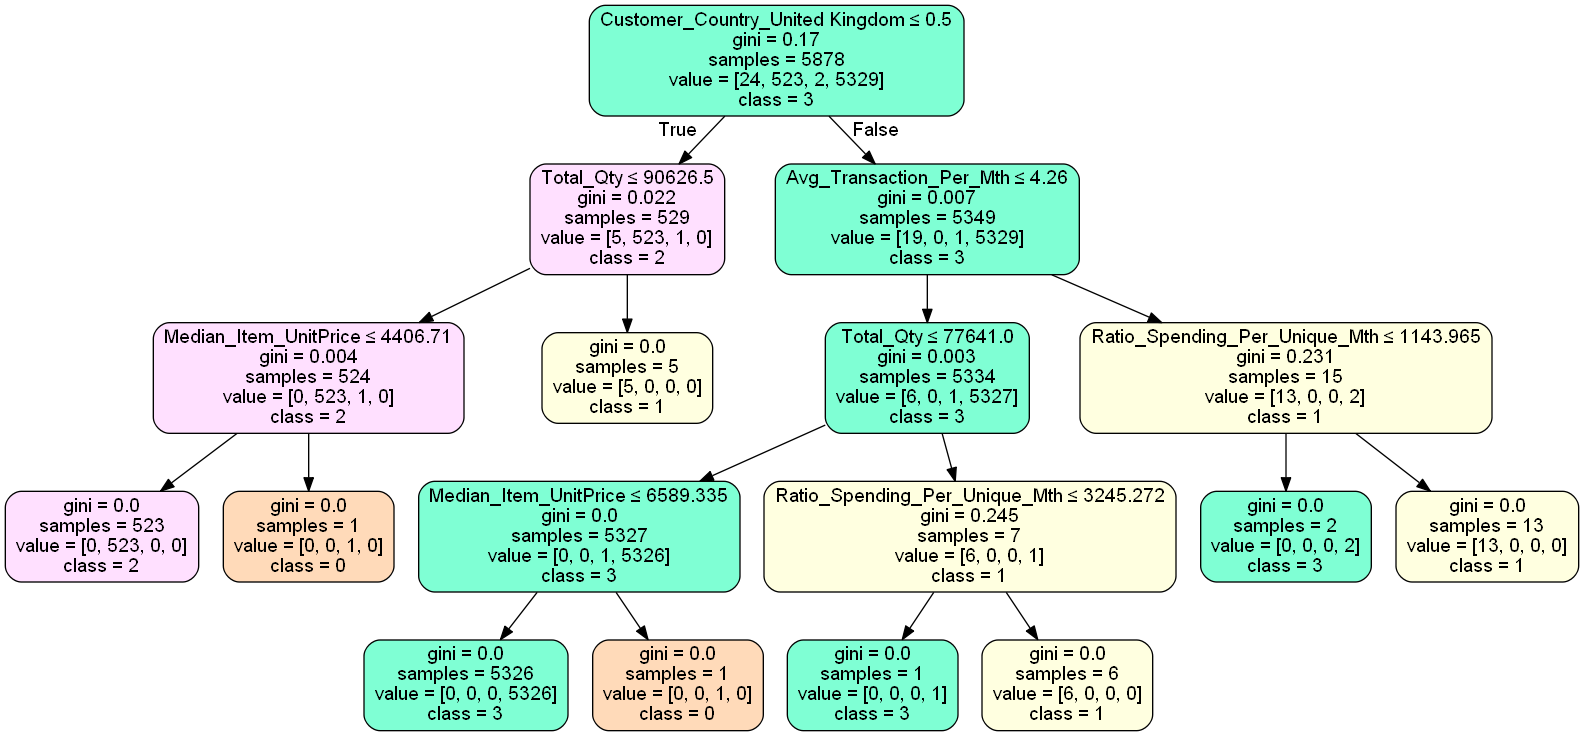

In [169]:
df_k4['Cluster']=df_k4["Cluster"].apply(str)

dt = tree.DecisionTreeClassifier(random_state = 101,max_depth=6)  
dt = dt.fit(df_k4.iloc[:,1:29],df_k4.iloc[:,29])  



import pydotplus  
dot_data = tree.export_graphviz(dt, out_file=None)  
graph2 = pydotplus.graph_from_dot_data(dot_data)  
graph2.write_pdf("../tree/tree.pdf")  

from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None,  
                     feature_names=list(df_k4.iloc[:,1:29].columns),
                     class_names=list(set(df_k4['Cluster'].values)),
                     filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)  
graph2 = pydotplus.graph_from_dot_data(dot_data)

## Color of nodes
nodes = graph2.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [255,218,185],3: [127,255,212],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )
        
        
#

Image(graph2.create_png() ) 

## Fitting K= 5 in to KMeans

In [170]:
df_k5= customer_feat.copy()

In [171]:
df_k5.head()

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
Customer ID                                                          
12346.00                        5      74285                    26   
12347.00                        8       2967                   126   
12348.00                        5       2714                    28   
12349.00                        4       1624                   145   
12350.00                        1        197                    17   

             Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
Customer ID                                                                  
12346.00                   7.49                1.00                   7.49   
12347.00                  12.75                0.25                   1.95   
12348.00                  40.00                0.29                   0.55   
12349.00                 300.00                0.42                   2.55   
12350.00                  40.00                0.85                   1.65   

             Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Customer ID                                                  
12346.00                        0.48               3102.26   
12347.00                        0.32                196.86   
12348.00                        0.20                 80.78   
12349.00                        0.16                177.15   
12350.00                        0.04                 13.38   

             Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Customer ID                                                                    
12346.00                                 2.40                       15511.29   
12347.00                                 1.00                         615.19   
12348.00                                 1.00                         403.88   
12349.00                                 1.00                        1107.17   
12350.00                                 1.00                         334.40   

             Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Customer ID                                                   
12346.00                  6463.04                   6190.42   
12347.00                   615.19                    370.88   
12348.00                   403.88                    542.80   
12349.00                  1107.17                    406.00   
12350.00                   334.40                    197.00   

             Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Customer ID                                                                 
12346.00                       2.17      326         12  77556.46     726   
12347.00                      15.75        3          8   4921.53     405   
12348.00                       5.60       76          5   2019.40     439   
12349.00                      36.25       19          4   4428.69     590   
12350.00                      17.00      311          1    334.40     311   

             Customer_Country_Belgium  Customer_Country_France  \
Customer ID                                                      
12346.00                            0                        0   
12347.00                            0                        0   
12348.00                            0                        0   
12349.00                            0                        0   
12350.00                            0                        0   

             Customer_Country_Germany  Customer_Country_Italy  \
Customer ID                                                     
12346.00                            0                       0   
12347.00                            0                       0   
12348.00                            0                       0   
12349.00                            0                       1   
12350.00                            0                       0   

             Customer_Country_Netherlands  Customer_Country_Other Countries  \

In [172]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 5, init = 'k-means++',random_state=101)
label = km.fit_predict(X_sc)

In [173]:
df_k5['Cluster']=label

In [174]:
df_k5.shape

(5878, 29)

In [175]:
df_k5.head()

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
Customer ID                                                          
12346.00                        5      74285                    26   
12347.00                        8       2967                   126   
12348.00                        5       2714                    28   
12349.00                        4       1624                   145   
12350.00                        1        197                    17   

             Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
Customer ID                                                                  
12346.00                   7.49                1.00                   7.49   
12347.00                  12.75                0.25                   1.95   
12348.00                  40.00                0.29                   0.55   
12349.00                 300.00                0.42                   2.55   
12350.00                  40.00                0.85                   1.65   

             Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Customer ID                                                  
12346.00                        0.48               3102.26   
12347.00                        0.32                196.86   
12348.00                        0.20                 80.78   
12349.00                        0.16                177.15   
12350.00                        0.04                 13.38   

             Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Customer ID                                                                    
12346.00                                 2.40                       15511.29   
12347.00                                 1.00                         615.19   
12348.00                                 1.00                         403.88   
12349.00                                 1.00                        1107.17   
12350.00                                 1.00                         334.40   

             Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Customer ID                                                   
12346.00                  6463.04                   6190.42   
12347.00                   615.19                    370.88   
12348.00                   403.88                    542.80   
12349.00                  1107.17                    406.00   
12350.00                   334.40                    197.00   

             Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Customer ID                                                                 
12346.00                       2.17      326         12  77556.46     726   
12347.00                      15.75        3          8   4921.53     405   
12348.00                       5.60       76          5   2019.40     439   
12349.00                      36.25       19          4   4428.69     590   
12350.00                      17.00      311          1    334.40     311   

             Customer_Country_Belgium  Customer_Country_France  \
Customer ID                                                      
12346.00                            0                        0   
12347.00                            0                        0   
12348.00                            0                        0   
12349.00                            0                        0   
12350.00                            0                        0   

             Customer_Country_Germany  Customer_Country_Italy  \
Customer ID                                                     
12346.00                            0                       0   
12347.00                            0                       0   
12348.00                            0                       0   
12349.00                            0                       1   
12350.00                            0                       0   

             Customer_Country_Netherlands  Customer_Country_Other Countries  \

In [176]:
df_k5['Cluster'].value_counts()

0    4755
4     604
3     510
2       7
1       2
Name: Cluster, dtype: int64

### KMeans K=5, Clusters Formed

In [177]:
centroids=pd.DataFrame(sc.inverse_transform(km.cluster_centers_),columns=['No_of_Months_Transac', 'Total_Qty', 'Number_of_Item_Types',
       'Max_Item_UnitPrice', 'Min_Item_UnitPrice', 'Median_Item_UnitPrice',
       'Avg_Transaction_Per_Mth', 'Avg_Spending_Per_Mth',
       'Ratio_Transaction_Per_Unique_Mth', 'Ratio_Spending_Per_Unique_Mth',
       'Avg_Spending_Per_Inv', 'Avg_Purchase_Qty_Per_Inv',
       'Avg_Item_Types_Per_Inv', 'Recency', 'Frequency', 'Monetary', 'Tenure',
       'Customer_Country_Belgium', 'Customer_Country_France',
       'Customer_Country_Germany', 'Customer_Country_Italy',
       'Customer_Country_Netherlands', 'Customer_Country_Other Countries',
       'Customer_Country_Portugal', 'Customer_Country_Spain',
       'Customer_Country_Sweden', 'Customer_Country_Switzerland',
       'Customer_Country_United Kingdom'])


In [178]:
centroids

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  Max_Item_UnitPrice  \
0                  3.13     702.66                 58.96               19.25   
1                  1.00       1.50                  1.00             8955.84   
2                 19.71  173463.86                982.14              685.56   
3                  3.61    1522.31                 74.29               81.73   
4                 14.48    8605.91                280.65              105.32   

   Min_Item_UnitPrice  Median_Item_UnitPrice  Avg_Transaction_Per_Mth  \
0                2.11                   4.35                     0.15   
1             8955.84                8955.83                     0.06   
2                0.34                   2.00                     5.98   
3                2.10                   7.51                     0.17   
4                0.25                   3.18                     1.08   

   Avg_Spending_Per_Mth  Ratio_Transaction_Per_Unique_Mth  \
0                 46.55                              1.15   
1                497.40                              1.50   
2              13276.26                              6.45   
3                104.27                              1.16   
4                542.26                              1.78   

   Ratio_Spending_Per_Unique_Mth  Avg_Spending_Per_Inv  \
0                         362.77                313.06   
1                       12434.92               8955.83   
2                       25809.66              14379.00   
3                         718.66                605.15   
4                        1066.46                577.50   

   Avg_Purchase_Qty_Per_Inv  Avg_Item_Types_Per_Inv  Recency  Frequency  \
0                    190.79                   18.04   224.04       3.69   
1                      1.00                    0.75   629.00       1.50   
2                   6938.51                    5.42     4.14     149.43   
3                    342.11                   21.03   188.34       4.33   
4                    539.05                   13.85    38.96      26.88   

   Monetary  Tenure  Customer_Country_Belgium  Customer_Country_France  \
0   1163.78  455.35                      0.00                    -0.00   
1  12434.92  629.00                      0.00                     0.00   
2 331906.49  619.43                      0.00                     0.00   
3   2606.75  420.29                      0.05                     0.17   
4  13556.58  677.00                      0.00                     0.01   

   Customer_Country_Germany  Customer_Country_Italy  \
0                     -0.00                    0.00   
1                      0.00                    0.00   
2                      0.00                    0.00   
3                      0.20                    0.03   
4                      0.01                   -0.00   

   Customer_Country_Netherlands  Customer_Country_Other Countries  \
0                         -0.00                             -0.00   
1                          0.00                              0.50   
2                          0.14                              0.29   
3                          0.04                              0.30   
4                          0.00                              0.00   

   Customer_Country_Portugal  Customer_Country_Spain  Customer_Country_Sweden  \
0                       0.00                   -0.00                    -0.00   
1                       0.00                    0.00                     0.00   
2                       0.00                   -0.00                     0.00   
3                       0.05                    0.07                     0.03   
4                       0.00                    0.00                     0.00   

   Customer_Country_Switzerland  Customer_Country_United Kingdom  
0                          0.00                             1.00  
1                          0.00                             0.50  
2                          0.00      

In [179]:
grouped_clustter_k5=df_k5.groupby(['Cluster']).agg({'Cluster':'count',
                                                    'No_of_Months_Transac':'mean',
                                                    'Total_Qty':'mean',
                                                    'Number_of_Item_Types':'mean',
                                                    'Max_Item_UnitPrice':'mean',
                                                    'Min_Item_UnitPrice':'mean',
                                                    'Median_Item_UnitPrice':'mean',
                                                    'Avg_Transaction_Per_Mth':'mean',
                                                    'Avg_Spending_Per_Mth':'mean',
                                                    'Ratio_Transaction_Per_Unique_Mth':'mean',
                                                    'Ratio_Spending_Per_Unique_Mth':'mean',                                                    
                                                    'Avg_Spending_Per_Inv':'mean',
                                                    'Avg_Purchase_Qty_Per_Inv':'mean',
                                                    'Avg_Item_Types_Per_Inv':'mean',
                                                    'Recency':'mean',
                                                    'Frequency':'mean',
                                                    'Monetary':'mean',
                                                    'Tenure':'mean',
                                                    'Customer_Country_Belgium':'sum',
                                                    'Customer_Country_France':'sum',
                                                    'Customer_Country_Germany':'sum',
                                                    'Customer_Country_Italy':'sum',
                                                    'Customer_Country_Netherlands':'sum',
                                                    'Customer_Country_Other Countries':'sum',
                                                    'Customer_Country_Portugal':'sum',
                                                    'Customer_Country_Spain':'sum',
                                                    'Customer_Country_Sweden':'sum',
                                                    'Customer_Country_Switzerland':'sum',
                                                    'Customer_Country_United Kingdom':'sum'})                                                                                           
                                                                                                      
grouped_clustter_k5.rename(columns={'Cluster':'Number of Customer'},inplace=True)                                                 
grouped_clustter_k5

Number of Customer  No_of_Months_Transac  Total_Qty  \
Cluster                                                        
0                      4755                  3.13     700.34   
1                         2                  1.00       1.50   
2                         7                 19.71  173463.86   
3                       510                  3.61    1522.31   
4                       604                 14.47    8598.01   

         Number_of_Item_Types  Max_Item_UnitPrice  Min_Item_UnitPrice  \
Cluster                                                                 
0                       58.95               19.25                2.11   
1                        1.00             8955.83             8955.83   
2                      982.14              685.56                0.34   
3                       74.29               81.73                2.10   
4                      280.03              105.00                0.25   

         Median_Item_UnitPrice  Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Cluster                                                                         
0                         4.35                     0.15                 46.46   
1                      8955.83                     0.06                497.40   
2                         2.00                     5.98              13276.26   
3                         7.51                     0.17                104.27   
4                         3.18                     1.07                541.37   

         Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Cluster                                                                    
0                                    1.15                         362.67   
1                                    1.50                       12434.92   
2                                    6.45                       25809.66   
3                                    1.16                         718.66   
4                                    1.78                        1064.90   

         Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Cluster                                                   
0                      312.98                    190.67   
1                     8955.83                      1.00   
2                    14379.00                   6938.51   
3                      605.15                    342.11   
4                      577.32                    538.85   

         Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Cluster                                                                 
0                         18.05   224.12       3.68   1161.41  455.25   
1                          0.75   629.00       1.50  12434.92  629.00   
2                          5.42     4.14     149.43 331906.49  619.43   
3                         21.03   188.34       4.33   2606.75  420.29   
4                         13.82    38.99      26.83  13534.21  677.01   

         Customer_Country_Belgium  Customer_Country_France  \
Cluster                                                      
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                              27                       88   
4                               0                        5   

         Customer_Country_Germany  Customer_Country_Italy  \
Cluster                                                     
0                               0                       0   
1                               0                       0   
2                               0                       0   
3                             102                      17   
4                               5                       0   

         Customer_Country_Netherlands  Customer_Country_Other Countries  \
Cluster                                                                   
0       

In [180]:
grouped_clustter_k5_country=df_k5.groupby(['Cluster']).agg({
#                                                     'Cluster':'count',
                                                    'Customer_Country_Belgium':'sum',
                                                    'Customer_Country_France':'sum',
                                                    'Customer_Country_Germany':'sum',
                                                    'Customer_Country_Italy':'sum',
                                                    'Customer_Country_Netherlands':'sum',
                                                    'Customer_Country_Other Countries':'sum',
                                                    'Customer_Country_Portugal':'sum',
                                                    'Customer_Country_Spain':'sum',
                                                    'Customer_Country_Sweden':'sum',
                                                    'Customer_Country_Switzerland':'sum',
                                                    'Customer_Country_United Kingdom':'sum' 
                                                   })
grouped_clustter_k5_country=grouped_clustter_k5_country.transpose()
grouped_clustter_k5_country.sort_values(by=0,ascending=False)

Cluster                              0  1  2    3    4
Customer_Country_United Kingdom   4755  1  4    0  589
Customer_Country_Belgium             0  0  0   27    0
Customer_Country_France              0  0  0   88    5
Customer_Country_Germany             0  0  0  102    5
Customer_Country_Italy               0  0  0   17    0
Customer_Country_Netherlands         0  0  1   21    0
Customer_Country_Other Countries     0  1  2  155    2
Customer_Country_Portugal            0  0  0   24    0
Customer_Country_Spain               0  0  0   38    1
Customer_Country_Sweden              0  0  0   17    2
Customer_Country_Switzerland         0  0  0   21    0

In [181]:
df_k5.reset_index(inplace=True)
df_k5.head()

Customer ID  No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
0     12346.00                     5      74285                    26   
1     12347.00                     8       2967                   126   
2     12348.00                     5       2714                    28   
3     12349.00                     4       1624                   145   
4     12350.00                     1        197                    17   

   Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
0                7.49                1.00                   7.49   
1               12.75                0.25                   1.95   
2               40.00                0.29                   0.55   
3              300.00                0.42                   2.55   
4               40.00                0.85                   1.65   

   Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
0                     0.48               3102.26   
1                     0.32                196.86   
2                     0.20                 80.78   
3                     0.16                177.15   
4                     0.04                 13.38   

   Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
0                              2.40                       15511.29   
1                              1.00                         615.19   
2                              1.00                         403.88   
3                              1.00                        1107.17   
4                              1.00                         334.40   

   Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  Avg_Item_Types_Per_Inv  \
0               6463.04                   6190.42                    2.17   
1                615.19                    370.88                   15.75   
2                403.88                    542.80                    5.60   
3               1107.17                    406.00                   36.25   
4                334.40                    197.00                   17.00   

   Recency  Frequency  Monetary  Tenure  Customer_Country_Belgium  \
0      326         12  77556.46     726                         0   
1        3          8   4921.53     405                         0   
2       76          5   2019.40     439                         0   
3       19          4   4428.69     590                         0   
4      311          1    334.40     311                         0   

   Customer_Country_France  Customer_Country_Germany  Customer_Country_Italy  \
0                        0                         0                       0   
1                        0                         0                       0   
2                        0                         0                       0   
3                        0                         0                       1   
4                        0                         0                       0   

   Customer_Country_Netherlands  Customer_Country_Other Countries  \
0                             0                                 0   
1                             0                                 1   
2                             0                                 1   
3                             0                                 0   
4                             0                                 1   

   Customer_Country_Portugal  Customer_Country_Spain  Customer_Country_Sweden  \
0                          0                       0                        0   
1                          0                       0                        0   
2                          0                       0                        0   
3                          0                       0                        0   
4                          0                       0                        0   

   Customer_Country_Switzerland  Customer_Country_United Kingdom  Cluster  
0                             0                                1        4  
1       

In [182]:
grouped_clustter_k5

Number of Customer  No_of_Months_Transac  Total_Qty  \
Cluster                                                        
0                      4755                  3.13     700.34   
1                         2                  1.00       1.50   
2                         7                 19.71  173463.86   
3                       510                  3.61    1522.31   
4                       604                 14.47    8598.01   

         Number_of_Item_Types  Max_Item_UnitPrice  Min_Item_UnitPrice  \
Cluster                                                                 
0                       58.95               19.25                2.11   
1                        1.00             8955.83             8955.83   
2                      982.14              685.56                0.34   
3                       74.29               81.73                2.10   
4                      280.03              105.00                0.25   

         Median_Item_UnitPrice  Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Cluster                                                                         
0                         4.35                     0.15                 46.46   
1                      8955.83                     0.06                497.40   
2                         2.00                     5.98              13276.26   
3                         7.51                     0.17                104.27   
4                         3.18                     1.07                541.37   

         Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Cluster                                                                    
0                                    1.15                         362.67   
1                                    1.50                       12434.92   
2                                    6.45                       25809.66   
3                                    1.16                         718.66   
4                                    1.78                        1064.90   

         Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Cluster                                                   
0                      312.98                    190.67   
1                     8955.83                      1.00   
2                    14379.00                   6938.51   
3                      605.15                    342.11   
4                      577.32                    538.85   

         Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Cluster                                                                 
0                         18.05   224.12       3.68   1161.41  455.25   
1                          0.75   629.00       1.50  12434.92  629.00   
2                          5.42     4.14     149.43 331906.49  619.43   
3                         21.03   188.34       4.33   2606.75  420.29   
4                         13.82    38.99      26.83  13534.21  677.01   

         Customer_Country_Belgium  Customer_Country_France  \
Cluster                                                      
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                              27                       88   
4                               0                        5   

         Customer_Country_Germany  Customer_Country_Italy  \
Cluster                                                     
0                               0                       0   
1                               0                       0   
2                               0                       0   
3                             102                      17   
4                               5                       0   

         Customer_Country_Netherlands  Customer_Country_Other Countries  \
Cluster                                                                   
0       

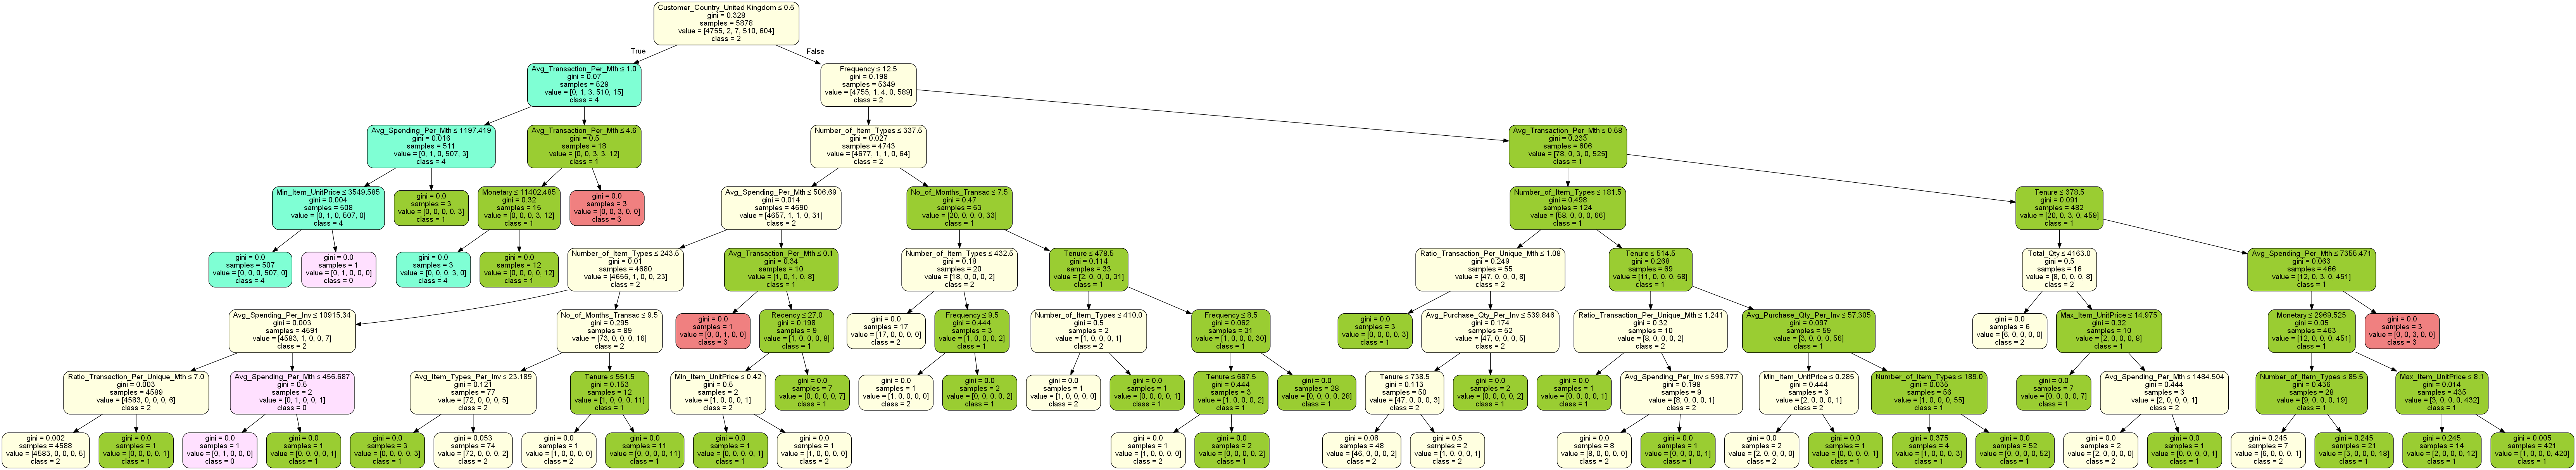

In [183]:
df_k5['Cluster']=df_k5["Cluster"].apply(str)

dt = tree.DecisionTreeClassifier(random_state = 101,max_depth=7)  
dt = dt.fit(df_k5.iloc[:,1:29],df_k5.iloc[:,29])  



import pydotplus  
dot_data = tree.export_graphviz(dt, out_file=None)  
graph2 = pydotplus.graph_from_dot_data(dot_data)  
graph2.write_pdf("../tree/tree.pdf")  

from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None,  
                     feature_names=list(df_k5.iloc[:,1:29].columns),
                     class_names=list(set(df_k5['Cluster'].values)),
                     filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)  
graph2 = pydotplus.graph_from_dot_data(dot_data)

## Color of nodes
nodes = graph2.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [240,128,128],3: [127,255,212],4: [154,205,50],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )
        
        
#

Image(graph2.create_png() ) 

<font color=darkblue> A decision tree is plotted with max_depth=7 to observe at under what condition the customers are segmented.The root node started with 'No_of_Months_Transac', followed by 'Tenure'
at first branch.

## Fitting K= 6 in to KMeans

In [184]:
df_k6= customer_feat.copy()

In [185]:
df_k6.head()

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
Customer ID                                                          
12346.00                        5      74285                    26   
12347.00                        8       2967                   126   
12348.00                        5       2714                    28   
12349.00                        4       1624                   145   
12350.00                        1        197                    17   

             Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
Customer ID                                                                  
12346.00                   7.49                1.00                   7.49   
12347.00                  12.75                0.25                   1.95   
12348.00                  40.00                0.29                   0.55   
12349.00                 300.00                0.42                   2.55   
12350.00                  40.00                0.85                   1.65   

             Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Customer ID                                                  
12346.00                        0.48               3102.26   
12347.00                        0.32                196.86   
12348.00                        0.20                 80.78   
12349.00                        0.16                177.15   
12350.00                        0.04                 13.38   

             Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Customer ID                                                                    
12346.00                                 2.40                       15511.29   
12347.00                                 1.00                         615.19   
12348.00                                 1.00                         403.88   
12349.00                                 1.00                        1107.17   
12350.00                                 1.00                         334.40   

             Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Customer ID                                                   
12346.00                  6463.04                   6190.42   
12347.00                   615.19                    370.88   
12348.00                   403.88                    542.80   
12349.00                  1107.17                    406.00   
12350.00                   334.40                    197.00   

             Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Customer ID                                                                 
12346.00                       2.17      326         12  77556.46     726   
12347.00                      15.75        3          8   4921.53     405   
12348.00                       5.60       76          5   2019.40     439   
12349.00                      36.25       19          4   4428.69     590   
12350.00                      17.00      311          1    334.40     311   

             Customer_Country_Belgium  Customer_Country_France  \
Customer ID                                                      
12346.00                            0                        0   
12347.00                            0                        0   
12348.00                            0                        0   
12349.00                            0                        0   
12350.00                            0                        0   

             Customer_Country_Germany  Customer_Country_Italy  \
Customer ID                                                     
12346.00                            0                       0   
12347.00                            0                       0   
12348.00                            0                       0   
12349.00                            0                       1   
12350.00                            0                       0   

             Customer_Country_Netherlands  Customer_Country_Other Countries  \

In [186]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 6, init = 'k-means++',random_state=101)
label = km.fit_predict(X_sc)

In [187]:
df_k6['Cluster']=label

In [188]:
df_k6.shape

(5878, 29)

In [189]:
df_k6.head()

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
Customer ID                                                          
12346.00                        5      74285                    26   
12347.00                        8       2967                   126   
12348.00                        5       2714                    28   
12349.00                        4       1624                   145   
12350.00                        1        197                    17   

             Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
Customer ID                                                                  
12346.00                   7.49                1.00                   7.49   
12347.00                  12.75                0.25                   1.95   
12348.00                  40.00                0.29                   0.55   
12349.00                 300.00                0.42                   2.55   
12350.00                  40.00                0.85                   1.65   

             Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Customer ID                                                  
12346.00                        0.48               3102.26   
12347.00                        0.32                196.86   
12348.00                        0.20                 80.78   
12349.00                        0.16                177.15   
12350.00                        0.04                 13.38   

             Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Customer ID                                                                    
12346.00                                 2.40                       15511.29   
12347.00                                 1.00                         615.19   
12348.00                                 1.00                         403.88   
12349.00                                 1.00                        1107.17   
12350.00                                 1.00                         334.40   

             Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Customer ID                                                   
12346.00                  6463.04                   6190.42   
12347.00                   615.19                    370.88   
12348.00                   403.88                    542.80   
12349.00                  1107.17                    406.00   
12350.00                   334.40                    197.00   

             Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Customer ID                                                                 
12346.00                       2.17      326         12  77556.46     726   
12347.00                      15.75        3          8   4921.53     405   
12348.00                       5.60       76          5   2019.40     439   
12349.00                      36.25       19          4   4428.69     590   
12350.00                      17.00      311          1    334.40     311   

             Customer_Country_Belgium  Customer_Country_France  \
Customer ID                                                      
12346.00                            0                        0   
12347.00                            0                        0   
12348.00                            0                        0   
12349.00                            0                        0   
12350.00                            0                        0   

             Customer_Country_Germany  Customer_Country_Italy  \
Customer ID                                                     
12346.00                            0                       0   
12347.00                            0                       0   
12348.00                            0                       0   
12349.00                            0                       1   
12350.00                            0                       0   

             Customer_Country_Netherlands  Customer_Country_Other Countries  \

In [190]:
df_k6['Cluster'].value_counts()

4    4390
0     950
2     495
1      22
3      19
5       2
Name: Cluster, dtype: int64

### KMeans K=6, Clusters Formed


In [191]:
centroids=pd.DataFrame(sc.inverse_transform(km.cluster_centers_),columns=['No_of_Months_Transac', 'Total_Qty', 'Number_of_Item_Types',
       'Max_Item_UnitPrice', 'Min_Item_UnitPrice', 'Median_Item_UnitPrice',
       'Avg_Transaction_Per_Mth', 'Avg_Spending_Per_Mth',
       'Ratio_Transaction_Per_Unique_Mth', 'Ratio_Spending_Per_Unique_Mth',
       'Avg_Spending_Per_Inv', 'Avg_Purchase_Qty_Per_Inv',
       'Avg_Item_Types_Per_Inv', 'Recency', 'Frequency', 'Monetary', 'Tenure',
       'Customer_Country_Belgium', 'Customer_Country_France',
       'Customer_Country_Germany', 'Customer_Country_Italy',
       'Customer_Country_Netherlands', 'Customer_Country_Other Countries',
       'Customer_Country_Portugal', 'Customer_Country_Spain',
       'Customer_Country_Sweden', 'Customer_Country_Switzerland',
       'Customer_Country_United Kingdom'])


In [192]:
centroids

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  Max_Item_UnitPrice  \
0                 12.15    4988.21                227.46               57.32   
1                 19.55  107455.82                823.18             1071.06   
2                  3.71    1609.12                 75.89               82.97   
3                  3.26    4657.63                 46.32               90.94   
4                  2.67     577.43                 50.55               18.39   
5                  1.00       1.50                  1.00             8955.84   

   Min_Item_UnitPrice  Median_Item_UnitPrice  Avg_Transaction_Per_Mth  \
0                0.27                   2.80                     0.77   
1                0.24                   1.63                     5.33   
2                2.14                   7.69                     0.18   
3                0.46                   1.70                     0.22   
4                2.26                   4.54                     0.12   
5             8955.84                8955.83                     0.06   

   Avg_Spending_Per_Mth  Ratio_Transaction_Per_Unique_Mth  \
0                338.12                              1.52   
1               6758.81                              6.28   
2                109.68                              1.16   
3                192.66                              1.57   
4                 37.98                              1.14   
5                497.40                              1.50   

   Ratio_Spending_Per_Unique_Mth  Avg_Spending_Per_Inv  \
0                         748.48                461.51   
1                       12100.51               6197.29   
2                         725.67                610.01   
3                        1102.78                615.87   
4                         354.95                309.35   
5                       12434.92               8955.83   

   Avg_Purchase_Qty_Per_Inv  Avg_Item_Types_Per_Inv  Recency  Frequency  \
0                    269.17                   14.85    43.23      19.19   
1                   8678.96                    8.33    71.36     133.36   
2                    345.42                   20.89   183.03       4.45   
3                    421.74                   21.50   320.11       5.47   
4                    188.99                   18.20   238.18       3.08   
5                      1.00                    0.75   629.00       1.50   

   Monetary  Tenure  Customer_Country_Belgium  Customer_Country_France  \
0   8452.91  658.45                      0.00                     0.00   
1 168970.24  675.45                      0.00                     0.00   
2   2741.97  420.19                      0.05                     0.18   
3   4816.62  481.53                      0.00                     0.00   
4    949.55  440.83                      0.00                    -0.00   
5  12434.92  629.00                      0.00                     0.00   

   Customer_Country_Germany  Customer_Country_Italy  \
0                      0.01                    0.00   
1                      0.00                    0.00   
2                      0.21                    0.03   
3                      0.00                   -0.00   
4                      0.00                    0.00   
5                      0.00                    0.00   

   Customer_Country_Netherlands  Customer_Country_Other Countries  \
0                          0.00                             -0.00   
1                          0.05                              0.18   
2                          0.04                              0.31   
3                         -0.00                              0.00   
4                         -0.00                             -0.00   
5                          0.00                              0.50   

   Customer_Country_Portugal  Customer_Country_Spain  Customer_Country_Sweden  \
0                       0.00                    0.00                    -0.00   
1                 

In [193]:
grouped_clustter_k6=df_k6.groupby(['Cluster']).agg({'Cluster':'count',
                                                    'No_of_Months_Transac':'mean',
                                                    'Total_Qty':'mean',
                                                    'Number_of_Item_Types':'mean',
                                                    'Max_Item_UnitPrice':'mean',
                                                    'Min_Item_UnitPrice':'mean',
                                                    'Median_Item_UnitPrice':'mean',
                                                    'Avg_Transaction_Per_Mth':'mean',
                                                    'Avg_Spending_Per_Mth':'mean',
                                                    'Ratio_Transaction_Per_Unique_Mth':'mean',
                                                    'Ratio_Spending_Per_Unique_Mth':'mean',                                                    
                                                    'Avg_Spending_Per_Inv':'mean',
                                                    'Avg_Purchase_Qty_Per_Inv':'mean',
                                                    'Avg_Item_Types_Per_Inv':'mean',
                                                    'Recency':'mean',
                                                    'Frequency':'mean',
                                                    'Monetary':'mean',
                                                    'Tenure':'mean',
                                                    'Customer_Country_Belgium':'sum',
                                                    'Customer_Country_France':'sum',
                                                    'Customer_Country_Germany':'sum',
                                                    'Customer_Country_Italy':'sum',
                                                    'Customer_Country_Netherlands':'sum',
                                                    'Customer_Country_Other Countries':'sum',
                                                    'Customer_Country_Portugal':'sum',
                                                    'Customer_Country_Spain':'sum',
                                                    'Customer_Country_Sweden':'sum',
                                                    'Customer_Country_Switzerland':'sum',
                                                    'Customer_Country_United Kingdom':'sum'})                                                                                           
                                                                                                      
grouped_clustter_k6.rename(columns={'Cluster':'Number of Customer'},inplace=True)                                                 
grouped_clustter_k6

Number of Customer  No_of_Months_Transac  Total_Qty  \
Cluster                                                        
0                       950                 12.15    4980.63   
1                        22                 19.55  107455.82   
2                       495                  3.71    1609.12   
3                        19                  3.26    4657.63   
4                      4390                  2.67     577.06   
5                         2                  1.00       1.50   

         Number_of_Item_Types  Max_Item_UnitPrice  Min_Item_UnitPrice  \
Cluster                                                                 
0                      227.10               57.21                0.27   
1                      823.18             1071.06                0.24   
2                       75.89               82.97                2.14   
3                       46.32               90.94                0.46   
4                       50.54               18.39                2.26   
5                        1.00             8955.83             8955.83   

         Median_Item_UnitPrice  Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Cluster                                                                         
0                         2.80                     0.77                337.58   
1                         1.63                     5.33               6758.81   
2                         7.69                     0.18                109.68   
3                         1.70                     0.22                192.66   
4                         4.54                     0.12                 37.96   
5                      8955.83                     0.06                497.40   

         Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Cluster                                                                    
0                                    1.52                         747.40   
1                                    6.28                       12100.51   
2                                    1.16                         725.67   
3                                    1.57                        1102.78   
4                                    1.14                         355.00   
5                                    1.50                       12434.92   

         Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Cluster                                                   
0                      460.89                    268.83   
1                     6197.29                   8678.96   
2                      610.01                    345.42   
3                      615.87                    421.74   
4                      309.42                    189.02   
5                     8955.83                      1.00   

         Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Cluster                                                                 
0                         14.83    43.17      19.17   8439.46  658.00   
1                          8.33    71.36     133.36 168970.24  675.45   
2                         20.89   183.03       4.45   2741.97  420.19   
3                         21.50   320.11       5.47   4816.62  481.53   
4                         18.20   238.28       3.08    949.05  440.83   
5                          0.75   629.00       1.50  12434.92  629.00   

         Customer_Country_Belgium  Customer_Country_France  \
Cluster                                                      
0                               0                        3   
1                               0                        0   
2                              27                       90   
3                               0                        0   
4                               0                        0   
5                               0                        0   

         Customer_Country_Germany  Customer_Country_Italy  \
Cluster                              

In [194]:
grouped_clustter_k6_country=df_k6.groupby(['Cluster']).agg({
#                                                     'Cluster':'count',
                                                    'Customer_Country_Belgium':'sum',
                                                    'Customer_Country_France':'sum',
                                                    'Customer_Country_Germany':'sum',
                                                    'Customer_Country_Italy':'sum',
                                                    'Customer_Country_Netherlands':'sum',
                                                    'Customer_Country_Other Countries':'sum',
                                                    'Customer_Country_Portugal':'sum',
                                                    'Customer_Country_Spain':'sum',
                                                    'Customer_Country_Sweden':'sum',
                                                    'Customer_Country_Switzerland':'sum',
                                                    'Customer_Country_United Kingdom':'sum' 
                                                   })
grouped_clustter_k6_country=grouped_clustter_k6_country.transpose()
grouped_clustter_k6_country.sort_values(by=0,ascending=False)

Cluster                             0   1    2   3     4  5
Customer_Country_United Kingdom   941  17    0   0  4390  1
Customer_Country_Germany            5   0  102   0     0  0
Customer_Country_France             3   0   90   0     0  0
Customer_Country_Spain              1   0   38   0     0  0
Customer_Country_Belgium            0   0   27   0     0  0
Customer_Country_Italy              0   0   17   0     0  0
Customer_Country_Netherlands        0   1   21   0     0  0
Customer_Country_Other Countries    0   4  155   0     0  1
Customer_Country_Portugal           0   0   24   0     0  0
Customer_Country_Sweden             0   0    0  19     0  0
Customer_Country_Switzerland        0   0   21   0     0  0

In [195]:
df_k6.reset_index(inplace=True)
df_k6.head()

Customer ID  No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
0     12346.00                     5      74285                    26   
1     12347.00                     8       2967                   126   
2     12348.00                     5       2714                    28   
3     12349.00                     4       1624                   145   
4     12350.00                     1        197                    17   

   Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
0                7.49                1.00                   7.49   
1               12.75                0.25                   1.95   
2               40.00                0.29                   0.55   
3              300.00                0.42                   2.55   
4               40.00                0.85                   1.65   

   Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
0                     0.48               3102.26   
1                     0.32                196.86   
2                     0.20                 80.78   
3                     0.16                177.15   
4                     0.04                 13.38   

   Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
0                              2.40                       15511.29   
1                              1.00                         615.19   
2                              1.00                         403.88   
3                              1.00                        1107.17   
4                              1.00                         334.40   

   Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  Avg_Item_Types_Per_Inv  \
0               6463.04                   6190.42                    2.17   
1                615.19                    370.88                   15.75   
2                403.88                    542.80                    5.60   
3               1107.17                    406.00                   36.25   
4                334.40                    197.00                   17.00   

   Recency  Frequency  Monetary  Tenure  Customer_Country_Belgium  \
0      326         12  77556.46     726                         0   
1        3          8   4921.53     405                         0   
2       76          5   2019.40     439                         0   
3       19          4   4428.69     590                         0   
4      311          1    334.40     311                         0   

   Customer_Country_France  Customer_Country_Germany  Customer_Country_Italy  \
0                        0                         0                       0   
1                        0                         0                       0   
2                        0                         0                       0   
3                        0                         0                       1   
4                        0                         0                       0   

   Customer_Country_Netherlands  Customer_Country_Other Countries  \
0                             0                                 0   
1                             0                                 1   
2                             0                                 1   
3                             0                                 0   
4                             0                                 1   

   Customer_Country_Portugal  Customer_Country_Spain  Customer_Country_Sweden  \
0                          0                       0                        0   
1                          0                       0                        0   
2                          0                       0                        0   
3                          0                       0                        0   
4                          0                       0                        0   

   Customer_Country_Switzerland  Customer_Country_United Kingdom  Cluster  
0                             0                                1        0  
1       

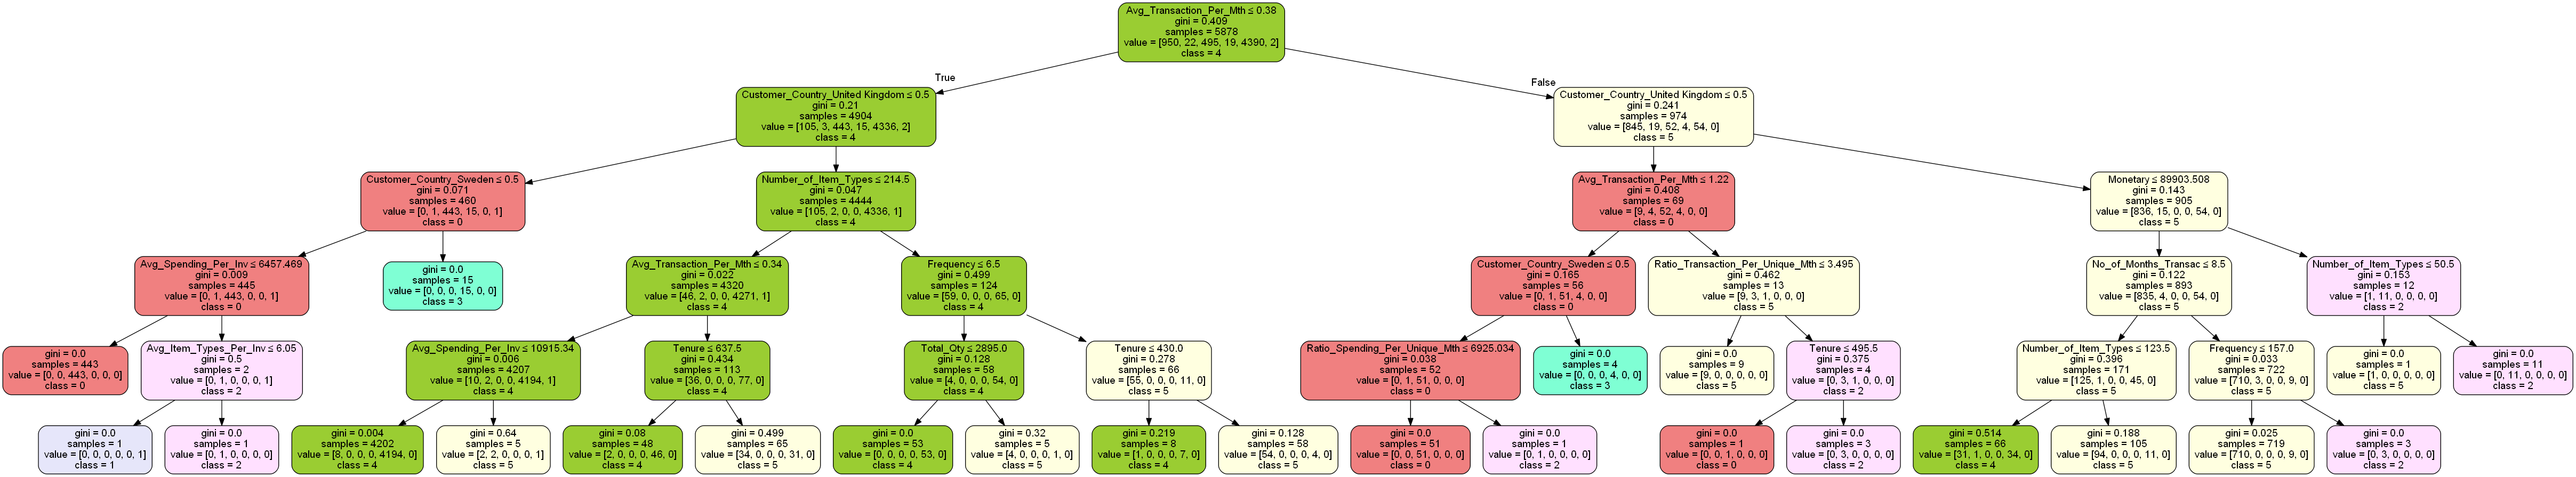

In [196]:
df_k6['Cluster']=df_k6["Cluster"].apply(str)

dt = tree.DecisionTreeClassifier(random_state = 101,max_depth=5)  
dt = dt.fit(df_k6.iloc[:,1:29],df_k6.iloc[:,29])  


import pydotplus  
dot_data = tree.export_graphviz(dt, out_file=None)  
graph2 = pydotplus.graph_from_dot_data(dot_data)  
graph2.write_pdf("../tree/tree.pdf")  

from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None,  
                     feature_names=list(df_k6.iloc[:,1:29].columns),
                     class_names=list(set(df_k6['Cluster'].values)),
                     filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)  
graph2 = pydotplus.graph_from_dot_data(dot_data)

## Color of nodes
nodes = graph2.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [240,128,128],3: [127,255,212],4: [154,205,50],5: [230,230,250],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )
        
        
#

Image(graph2.create_png() ) 

 <font color=darkblue> A decision tree is plotted with max_depth=5 to observe at under what condition the customers are segmented.The root node started with 'Recency', followed by 'Frequency'and 'Monetary'
at first branch.


## Fitting K= 7 in to KMeans

In [197]:
df_k7= customer_feat.copy()

In [198]:
df_k7.head()

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
Customer ID                                                          
12346.00                        5      74285                    26   
12347.00                        8       2967                   126   
12348.00                        5       2714                    28   
12349.00                        4       1624                   145   
12350.00                        1        197                    17   

             Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
Customer ID                                                                  
12346.00                   7.49                1.00                   7.49   
12347.00                  12.75                0.25                   1.95   
12348.00                  40.00                0.29                   0.55   
12349.00                 300.00                0.42                   2.55   
12350.00                  40.00                0.85                   1.65   

             Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Customer ID                                                  
12346.00                        0.48               3102.26   
12347.00                        0.32                196.86   
12348.00                        0.20                 80.78   
12349.00                        0.16                177.15   
12350.00                        0.04                 13.38   

             Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Customer ID                                                                    
12346.00                                 2.40                       15511.29   
12347.00                                 1.00                         615.19   
12348.00                                 1.00                         403.88   
12349.00                                 1.00                        1107.17   
12350.00                                 1.00                         334.40   

             Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Customer ID                                                   
12346.00                  6463.04                   6190.42   
12347.00                   615.19                    370.88   
12348.00                   403.88                    542.80   
12349.00                  1107.17                    406.00   
12350.00                   334.40                    197.00   

             Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Customer ID                                                                 
12346.00                       2.17      326         12  77556.46     726   
12347.00                      15.75        3          8   4921.53     405   
12348.00                       5.60       76          5   2019.40     439   
12349.00                      36.25       19          4   4428.69     590   
12350.00                      17.00      311          1    334.40     311   

             Customer_Country_Belgium  Customer_Country_France  \
Customer ID                                                      
12346.00                            0                        0   
12347.00                            0                        0   
12348.00                            0                        0   
12349.00                            0                        0   
12350.00                            0                        0   

             Customer_Country_Germany  Customer_Country_Italy  \
Customer ID                                                     
12346.00                            0                       0   
12347.00                            0                       0   
12348.00                            0                       0   
12349.00                            0                       1   
12350.00                            0                       0   

             Customer_Country_Netherlands  Customer_Country_Other Countries  \

In [199]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 7, init = 'k-means++',random_state=101)
label = km.fit_predict(X_sc)

In [200]:
df_k7['Cluster']=label

In [201]:
df_k7.shape

(5878, 29)

In [202]:
df_k7.head()

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
Customer ID                                                          
12346.00                        5      74285                    26   
12347.00                        8       2967                   126   
12348.00                        5       2714                    28   
12349.00                        4       1624                   145   
12350.00                        1        197                    17   

             Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
Customer ID                                                                  
12346.00                   7.49                1.00                   7.49   
12347.00                  12.75                0.25                   1.95   
12348.00                  40.00                0.29                   0.55   
12349.00                 300.00                0.42                   2.55   
12350.00                  40.00                0.85                   1.65   

             Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Customer ID                                                  
12346.00                        0.48               3102.26   
12347.00                        0.32                196.86   
12348.00                        0.20                 80.78   
12349.00                        0.16                177.15   
12350.00                        0.04                 13.38   

             Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Customer ID                                                                    
12346.00                                 2.40                       15511.29   
12347.00                                 1.00                         615.19   
12348.00                                 1.00                         403.88   
12349.00                                 1.00                        1107.17   
12350.00                                 1.00                         334.40   

             Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Customer ID                                                   
12346.00                  6463.04                   6190.42   
12347.00                   615.19                    370.88   
12348.00                   403.88                    542.80   
12349.00                  1107.17                    406.00   
12350.00                   334.40                    197.00   

             Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Customer ID                                                                 
12346.00                       2.17      326         12  77556.46     726   
12347.00                      15.75        3          8   4921.53     405   
12348.00                       5.60       76          5   2019.40     439   
12349.00                      36.25       19          4   4428.69     590   
12350.00                      17.00      311          1    334.40     311   

             Customer_Country_Belgium  Customer_Country_France  \
Customer ID                                                      
12346.00                            0                        0   
12347.00                            0                        0   
12348.00                            0                        0   
12349.00                            0                        0   
12350.00                            0                        0   

             Customer_Country_Germany  Customer_Country_Italy  \
Customer ID                                                     
12346.00                            0                       0   
12347.00                            0                       0   
12348.00                            0                       0   
12349.00                            0                       1   
12350.00                            0                       0   

             Customer_Country_Netherlands  Customer_Country_Other Countries  \

In [203]:
df_k7['Cluster'].value_counts()

0    4336
6     998
5     514
2      23
1       4
3       2
4       1
Name: Cluster, dtype: int64

### KMeans K=7, Clusters Formed

In [204]:
centroids=pd.DataFrame(sc.inverse_transform(km.cluster_centers_),columns=['No_of_Months_Transac', 'Total_Qty', 'Number_of_Item_Types',
       'Max_Item_UnitPrice', 'Min_Item_UnitPrice', 'Median_Item_UnitPrice',
       'Avg_Transaction_Per_Mth', 'Avg_Spending_Per_Mth',
       'Ratio_Transaction_Per_Unique_Mth', 'Ratio_Spending_Per_Unique_Mth',
       'Avg_Spending_Per_Inv', 'Avg_Purchase_Qty_Per_Inv',
       'Avg_Item_Types_Per_Inv', 'Recency', 'Frequency', 'Monetary', 'Tenure',
       'Customer_Country_Belgium', 'Customer_Country_France',
       'Customer_Country_Germany', 'Customer_Country_Italy',
       'Customer_Country_Netherlands', 'Customer_Country_Other Countries',
       'Customer_Country_Portugal', 'Customer_Country_Spain',
       'Customer_Country_Sweden', 'Customer_Country_Switzerland',
       'Customer_Country_United Kingdom'])


In [205]:
centroids

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  Max_Item_UnitPrice  \
0                  2.62     563.27                 49.47               18.14   
1                 24.25  215283.75               1446.50             1192.78   
2                 19.70   74209.61                596.22              825.11   
3                  1.00       1.50                  1.00             8955.84   
4                  2.00   80997.00                  3.00                2.08   
5                  3.69    1721.81                 74.80               83.26   
6                 11.85    4558.75                222.69               56.48   

   Min_Item_UnitPrice  Median_Item_UnitPrice  Avg_Transaction_Per_Mth  \
0                2.29                   4.57                     0.12   
1                0.13                   2.16                     8.50   
2                0.25                   1.89                     4.52   
3             8955.84                8955.83                     0.06   
4                1.25                   1.65                     0.08   
5                2.08                   7.46                     0.18   
6                0.27                   2.76                     0.73   

   Avg_Spending_Per_Mth  Ratio_Transaction_Per_Unique_Mth  \
0                 37.04                              1.14   
1              17144.48                              8.69   
2               3859.30                              5.48   
3                497.40                              1.50   
4               6738.90                              1.00   
5                112.75                              1.17   
6                312.81                              1.49   

   Ratio_Spending_Per_Unique_Mth  Avg_Spending_Per_Inv  \
0                         354.20                309.02   
1                       17780.29               2562.23   
2                        6088.34               2256.04   
3                       12434.92               8955.83   
4                       84236.25              84236.25   
5                         739.61                610.23   
6                         705.96                447.53   

   Avg_Purchase_Qty_Per_Inv  Avg_Item_Types_Per_Inv  Recency  Frequency  \
0                    188.80                   18.20   240.19       3.01   
1                   1277.41                    6.70     3.75     212.50   
2                   6694.58                    7.36    83.78     112.96   
3                      1.00                    0.75   629.00       1.50   
4                  40498.50                    1.50     1.00       2.00   
5                    348.24                   20.92   188.10       4.49   
6                    258.63                   15.08    44.72      18.24   

   Monetary  Tenure  Customer_Country_Belgium  Customer_Country_France  \
0    926.00  438.49                      0.00                    -0.00   
1 428612.00  738.75                      0.00                     0.00   
2  96482.61  698.57                      0.00                     0.00   
3  12434.92  629.00                      0.00                     0.00   
4 168472.50  206.00                      0.00                     0.00   
5   2818.66  422.46                      0.05                     0.18   
6   7820.30  656.61                      0.00                     0.00   

   Customer_Country_Germany  Customer_Country_Italy  \
0                      0.00                    0.00   
1                      0.00                    0.00   
2                      0.00                    0.00   
3                      0.00                    0.00   
4                      0.00                    0.00   
5                      0.20                    0.03   
6                      0.01                    0.00   

   Customer_Country_Netherlands  Customer_Country_Other Countries  \
0                          0.00                             -0.00   
1                          0.25                   

In [206]:
grouped_clustter_k7=df_k7.groupby(['Cluster']).agg({'Cluster':'count',
                                                    'No_of_Months_Transac':'mean',
                                                    'Total_Qty':'mean',
                                                    'Number_of_Item_Types':'mean',
                                                    'Max_Item_UnitPrice':'mean',
                                                    'Min_Item_UnitPrice':'mean',
                                                    'Median_Item_UnitPrice':'mean',
                                                    'Avg_Transaction_Per_Mth':'mean',
                                                    'Avg_Spending_Per_Mth':'mean',
                                                    'Ratio_Transaction_Per_Unique_Mth':'mean',
                                                    'Ratio_Spending_Per_Unique_Mth':'mean',                                                    
                                                    'Avg_Spending_Per_Inv':'mean',
                                                    'Avg_Purchase_Qty_Per_Inv':'mean',
                                                    'Avg_Item_Types_Per_Inv':'mean',
                                                    'Recency':'mean',
                                                    'Frequency':'mean',
                                                    'Monetary':'mean',
                                                    'Tenure':'mean',
                                                    'Customer_Country_Belgium':'sum',
                                                    'Customer_Country_France':'sum',
                                                    'Customer_Country_Germany':'sum',
                                                    'Customer_Country_Italy':'sum',
                                                    'Customer_Country_Netherlands':'sum',
                                                    'Customer_Country_Other Countries':'sum',
                                                    'Customer_Country_Portugal':'sum',
                                                    'Customer_Country_Spain':'sum',
                                                    'Customer_Country_Sweden':'sum',
                                                    'Customer_Country_Switzerland':'sum',
                                                    'Customer_Country_United Kingdom':'sum'})                                                                                           
                                                                                                      
grouped_clustter_k7.rename(columns={'Cluster':'Number of Customer'},inplace=True)                                                 
grouped_clustter_k7


Number of Customer  No_of_Months_Transac  Total_Qty  \
Cluster                                                        
0                      4336                  2.61     562.59   
1                         4                 24.25  215283.75   
2                        23                 19.70   74209.61   
3                         2                  1.00       1.50   
4                         1                  2.00   80997.00   
5                       514                  3.69    1721.81   
6                       998                 11.83    4549.71   

         Number_of_Item_Types  Max_Item_UnitPrice  Min_Item_UnitPrice  \
Cluster                                                                 
0                       49.42               18.14                2.29   
1                     1446.50             1192.78                0.14   
2                      596.22              825.11                0.25   
3                        1.00             8955.83             8955.83   
4                        3.00                2.08                1.25   
5                       74.80               83.26                2.08   
6                      222.39               56.35                0.27   

         Median_Item_UnitPrice  Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Cluster                                                                         
0                         4.57                     0.12                 37.00   
1                         2.16                     8.50              17144.48   
2                         1.89                     4.52               3859.30   
3                      8955.83                     0.06                497.40   
4                         1.65                     0.08               6738.90   
5                         7.46                     0.18                112.75   
6                         2.76                     0.73                312.18   

         Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Cluster                                                                    
0                                    1.14                         354.18   
1                                    8.69                       17780.29   
2                                    5.48                        6088.34   
3                                    1.50                       12434.92   
4                                    1.00                       84236.25   
5                                    1.17                         739.61   
6                                    1.49                         705.00   

         Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Cluster                                                   
0                      309.01                    188.79   
1                     2562.23                   1277.41   
2                     2256.04                   6694.58   
3                     8955.83                      1.00   
4                    84236.25                  40498.50   
5                      610.23                    348.24   
6                      447.19                    258.49   

         Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Cluster                                                                 
0                         18.20   240.34       3.01    924.89  438.31   
1                          6.70     3.75     212.50 428612.00  738.75   
2                          7.36    83.78     112.96  96482.61  698.57   
3                          0.75   629.00       1.50  12434.92  629.00   
4                          1.50     1.00       2.00 168472.50  206.00   
5                         20.92   188.10       4.49   2818.66  422.46   
6                         15.09    44.65      18.21   7804.39  656.74   

         Customer_Country_Belgium  Customer_Country_France  \
Cluster                                                      
0                               0            

In [207]:
grouped_clustter_k7_country=df_k7.groupby(['Cluster']).agg({
#                                                     'Cluster':'count',
                                                    'Customer_Country_Belgium':'sum',
                                                    'Customer_Country_France':'sum',
                                                    'Customer_Country_Germany':'sum',
                                                    'Customer_Country_Italy':'sum',
                                                    'Customer_Country_Netherlands':'sum',
                                                    'Customer_Country_Other Countries':'sum',
                                                    'Customer_Country_Portugal':'sum',
                                                    'Customer_Country_Spain':'sum',
                                                    'Customer_Country_Sweden':'sum',
                                                    'Customer_Country_Switzerland':'sum',
                                                    'Customer_Country_United Kingdom':'sum' 
                                                   })
grouped_clustter_k7_country=grouped_clustter_k7_country.transpose()
grouped_clustter_k7_country.sort_values(by=0,ascending=False)


Cluster                              0  1   2  3  4    5    6
Customer_Country_United Kingdom   4336  1  21  1  1    0  989
Customer_Country_Belgium             0  0   0  0  0   27    0
Customer_Country_France              0  0   0  0  0   90    3
Customer_Country_Germany             0  0   0  0  0  102    5
Customer_Country_Italy               0  0   0  0  0   17    0
Customer_Country_Netherlands         0  1   0  0  0   21    0
Customer_Country_Other Countries     0  2   2  1  0  155    0
Customer_Country_Portugal            0  0   0  0  0   24    0
Customer_Country_Spain               0  0   0  0  0   38    1
Customer_Country_Sweden              0  0   0  0  0   19    0
Customer_Country_Switzerland         0  0   0  0  0   21    0

In [208]:
df_k7.reset_index(inplace=True)
df_k7.head()

Customer ID  No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
0     12346.00                     5      74285                    26   
1     12347.00                     8       2967                   126   
2     12348.00                     5       2714                    28   
3     12349.00                     4       1624                   145   
4     12350.00                     1        197                    17   

   Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
0                7.49                1.00                   7.49   
1               12.75                0.25                   1.95   
2               40.00                0.29                   0.55   
3              300.00                0.42                   2.55   
4               40.00                0.85                   1.65   

   Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
0                     0.48               3102.26   
1                     0.32                196.86   
2                     0.20                 80.78   
3                     0.16                177.15   
4                     0.04                 13.38   

   Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
0                              2.40                       15511.29   
1                              1.00                         615.19   
2                              1.00                         403.88   
3                              1.00                        1107.17   
4                              1.00                         334.40   

   Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  Avg_Item_Types_Per_Inv  \
0               6463.04                   6190.42                    2.17   
1                615.19                    370.88                   15.75   
2                403.88                    542.80                    5.60   
3               1107.17                    406.00                   36.25   
4                334.40                    197.00                   17.00   

   Recency  Frequency  Monetary  Tenure  Customer_Country_Belgium  \
0      326         12  77556.46     726                         0   
1        3          8   4921.53     405                         0   
2       76          5   2019.40     439                         0   
3       19          4   4428.69     590                         0   
4      311          1    334.40     311                         0   

   Customer_Country_France  Customer_Country_Germany  Customer_Country_Italy  \
0                        0                         0                       0   
1                        0                         0                       0   
2                        0                         0                       0   
3                        0                         0                       1   
4                        0                         0                       0   

   Customer_Country_Netherlands  Customer_Country_Other Countries  \
0                             0                                 0   
1                             0                                 1   
2                             0                                 1   
3                             0                                 0   
4                             0                                 1   

   Customer_Country_Portugal  Customer_Country_Spain  Customer_Country_Sweden  \
0                          0                       0                        0   
1                          0                       0                        0   
2                          0                       0                        0   
3                          0                       0                        0   
4                          0                       0                        0   

   Customer_Country_Switzerland  Customer_Country_United Kingdom  Cluster  
0                             0                                1        2  
1       

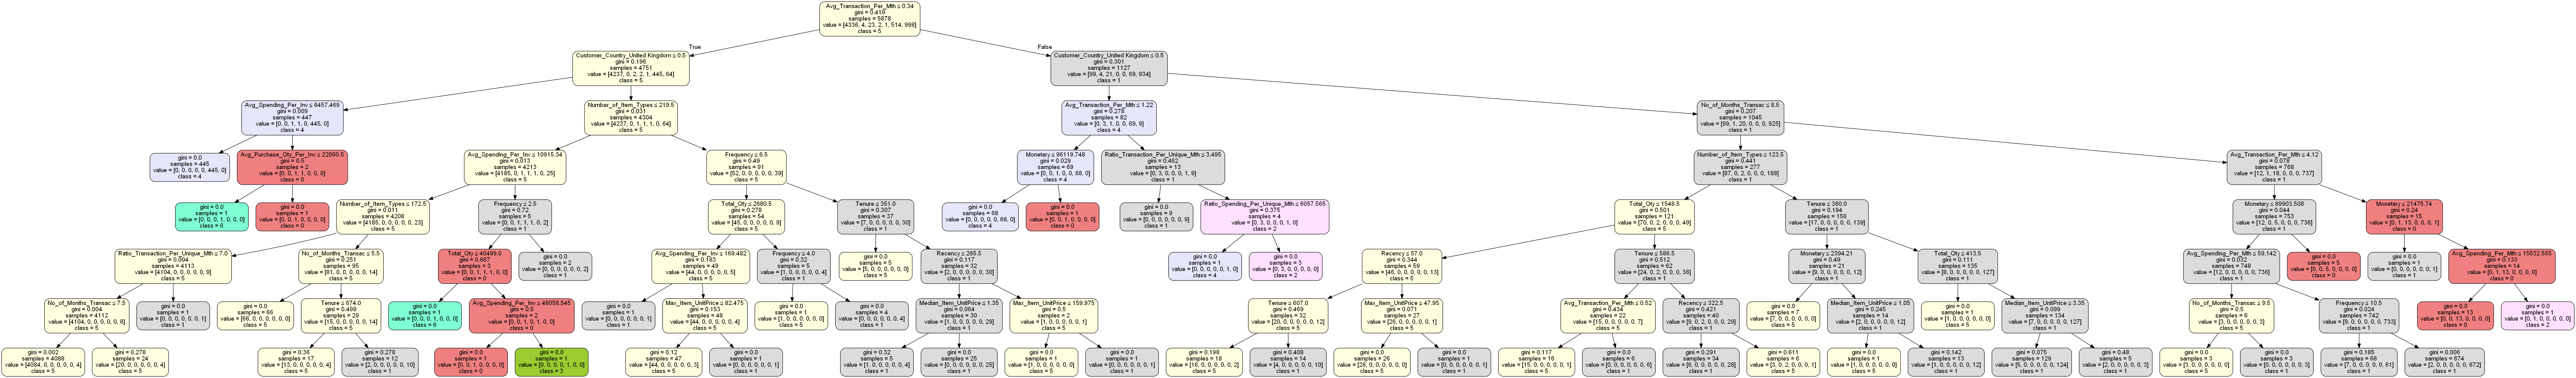

In [209]:
df_k7['Cluster']=df_k7["Cluster"].apply(str)

dt = tree.DecisionTreeClassifier(random_state = 101,max_depth=7)  
dt = dt.fit(df_k7.iloc[:,1:29],df_k7.iloc[:,29])  


import pydotplus  
dot_data = tree.export_graphviz(dt, out_file=None)  
graph2 = pydotplus.graph_from_dot_data(dot_data)  
graph2.write_pdf("../tree/tree.pdf")  

from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None,  
                     feature_names=list(df_k7.iloc[:,1:29].columns),
                     class_names=list(set(df_k7['Cluster'].values)),
                     filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)  
graph2 = pydotplus.graph_from_dot_data(dot_data)

## Color of nodes
nodes = graph2.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [240,128,128],3: [127,255,212],4: [154,205,50],5: [230,230,250],6: [220,220,220],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )
        
        
#

Image(graph2.create_png() ) 

# PCA

## Define X & StandardScale

In [210]:
customer_feat.head(2)

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  \
Customer ID                                                          
12346.00                        5      74285                    26   
12347.00                        8       2967                   126   

             Max_Item_UnitPrice  Min_Item_UnitPrice  Median_Item_UnitPrice  \
Customer ID                                                                  
12346.00                   7.49                1.00                   7.49   
12347.00                  12.75                0.25                   1.95   

             Avg_Transaction_Per_Mth  Avg_Spending_Per_Mth  \
Customer ID                                                  
12346.00                        0.48               3102.26   
12347.00                        0.32                196.86   

             Ratio_Transaction_Per_Unique_Mth  Ratio_Spending_Per_Unique_Mth  \
Customer ID                                                                    
12346.00                                 2.40                       15511.29   
12347.00                                 1.00                         615.19   

             Avg_Spending_Per_Inv  Avg_Purchase_Qty_Per_Inv  \
Customer ID                                                   
12346.00                  6463.04                   6190.42   
12347.00                   615.19                    370.88   

             Avg_Item_Types_Per_Inv  Recency  Frequency  Monetary  Tenure  \
Customer ID                                                                 
12346.00                       2.17      326         12  77556.46     726   
12347.00                      15.75        3          8   4921.53     405   

             Customer_Country_Belgium  Customer_Country_France  \
Customer ID                                                      
12346.00                            0                        0   
12347.00                            0                        0   

             Customer_Country_Germany  Customer_Country_Italy  \
Customer ID                                                     
12346.00                            0                       0   
12347.00                            0                       0   

             Customer_Country_Netherlands  Customer_Country_Other Countries  \
Customer ID                                                                   
12346.00                                0                                 0   
12347.00                                0                                 1   

             Customer_Country_Portugal  Customer_Country_Spain  \
Customer ID                                                      
12346.00                             0                       0   
12347.00                             0                       0   

             Customer_Country_Sweden  Customer_Country_Switzerland  \
Customer ID                                                          
12346.00                           0                             0   
12347.00                           0                             0   

             Customer_Country_United Kingdom  
Customer ID                                   
12346.00                                   1  
12347.00                                   0

In [211]:
df=customer_feat.copy()

In [212]:
X=df
print('X shape: ',X.shape)

X shape:  (5878, 28)


In [213]:
#Feature Scaling
sc= StandardScaler()
X_sc= sc.fit_transform(X)


In [214]:
X_sc

array([[ 0.14367495,  8.16809875, -0.47679866, ..., -0.05694624,
        -0.05987865,  0.31447892],
       [ 0.81128078,  0.1327586 ,  0.3442132 , ..., -0.05694624,
        -0.05987865, -3.17986339],
       [ 0.14367495,  0.1042533 , -0.46037842, ..., -0.05694624,
        -0.05987865, -3.17986339],
       ...,
       [-0.74646615, -0.18519381, -0.59174032, ..., -0.05694624,
        -0.05987865,  0.31447892],
       [-0.52393088, -0.13302798, -0.1401838 , ..., -0.05694624,
        -0.05987865,  0.31447892],
       [ 0.14367495,  0.13794138,  0.29495249, ..., -0.05694624,
        -0.05987865,  0.31447892]])

In [215]:
X_sc.shape

(5878, 28)

## PCA - Explained Variance

In [216]:
# Instantiate PCA
pca2 = PCA(random_state=101)
pca2 = pca2.fit(X_sc)
x_pca2=pca2.transform(X_sc)

In [217]:
x_pca2

array([[ 1.04566091e+01,  7.04535645e+00, -7.46029912e+00, ...,
        -4.51808729e-15, -1.47104551e-15, -8.11850587e-16],
       [ 7.97640295e-01,  9.48219756e-01, -1.15674286e+00, ...,
        -6.10622664e-16,  2.66453526e-15, -2.77555756e-16],
       [ 1.73995529e-02,  1.19443433e+00, -1.17969988e+00, ...,
        -2.22044605e-16,  3.10862447e-15, -2.22044605e-16],
       ...,
       [-1.14684861e+00,  4.00114928e-01, -4.43244538e-03, ...,
         2.80471301e-16,  3.88557185e-16,  1.01533051e-16],
       [-6.83721266e-01,  3.51304953e-01, -1.67042443e-01, ...,
         1.50367040e-16, -2.08732944e-20,  1.11941392e-16],
       [ 5.64158018e-01, -1.62239824e-01,  7.69738613e-02, ...,
        -7.24247051e-17, -3.40005801e-16, -5.72458747e-17]])

In [218]:
x_pca2.shape

(5878, 28)

In [219]:
print('PCA Explained Variance:',pca2.explained_variance_)
print('PCA Components:',pca2.components_)

PCA Explained Variance: [5.80366821e+00 2.74130769e+00 2.22557427e+00 1.88524314e+00
 1.36603843e+00 1.21053795e+00 1.12498581e+00 1.02270576e+00
 1.01236449e+00 1.01114631e+00 1.00749885e+00 1.00488564e+00
 1.00426032e+00 1.00295356e+00 9.78722128e-01 9.39302118e-01
 7.80141233e-01 6.41760642e-01 4.96648690e-01 2.56724216e-01
 2.13508079e-01 1.21385870e-01 1.00665412e-01 4.01768660e-02
 1.25586488e-02 1.14457174e-30 6.73814542e-31 3.67346501e-32]
PCA Components: [[ 2.83976041e-01  3.35168865e-01  2.89500625e-01  1.01062365e-01
   2.48322010e-02  2.62654839e-02  3.68734699e-01  3.55502551e-01
   2.89096533e-01  2.25837984e-01  1.26060899e-01  8.43963440e-02
  -3.32931029e-02 -1.14372840e-01  3.68734699e-01  3.55502551e-01
   1.13800956e-01  3.29224152e-04  7.28947548e-03  1.02225127e-02
  -3.41991385e-03  2.79941544e-02  2.36519519e-02 -3.06678276e-03
  -4.10478847e-03  3.65000907e-03  3.37898157e-03 -2.63927510e-02]
 [-2.04929925e-01  7.50778913e-02 -1.61055532e-01  3.30836491e-01
   

In [220]:
pca2.components_.shape

(28, 28)

In [221]:
var_exp2=pca2.explained_variance_ratio_
print('Percentage of variance explained by each of the selected components:',var_exp2)
print(len(var_exp2))
cum_var_exp2=np.cumsum(var_exp2)
print('Cumulative Percentage of variance explained by each of the selected components:',cum_var_exp2)
print(len(cum_var_exp2))

Percentage of variance explained by each of the selected components: [2.07238602e-01 9.78871901e-02 7.94712730e-02 6.73186574e-02
 4.87787870e-02 4.32261430e-02 4.01712292e-02 3.65189920e-02
 3.61497234e-02 3.61062247e-02 3.59759802e-02 3.58826674e-02
 3.58603383e-02 3.58136763e-02 3.49484151e-02 3.35407971e-02
 2.78574468e-02 2.29161236e-02 1.77344356e-02 9.16716215e-03
 7.62399126e-03 4.33447213e-03 3.59458164e-03 1.43464396e-03
 4.48446867e-04 4.08706078e-32 2.40607110e-32 1.31172859e-33]
28
Cumulative Percentage of variance explained by each of the selected components: [0.2072386  0.30512579 0.38459706 0.45191572 0.50069451 0.54392065
 0.58409188 0.62061087 0.6567606  0.69286682 0.7288428  0.76472547
 0.80058581 0.83639948 0.8713479  0.9048887  0.93274614 0.95566227
 0.9733967  0.98256386 0.99018786 0.99452233 0.99811691 0.99955155
 1.         1.         1.         1.        ]
28


In [222]:
# that explain 99%，take 21 components

## Choose Number of Component 

In [223]:
# Instantiate PCA
pca2 = PCA(n_components=21,random_state=101)
pca2 = pca2.fit(X_sc)
x_pca2=pca2.transform(X_sc)

In [224]:
x_pca2

array([[ 1.04566091e+01,  7.04535645e+00, -7.46029912e+00, ...,
        -5.80720801e-01,  1.95359755e+00,  8.22531277e-01],
       [ 7.97640295e-01,  9.48219756e-01, -1.15674286e+00, ...,
        -1.72247788e-01, -2.00837762e-01, -9.17693203e-02],
       [ 1.73995529e-02,  1.19443433e+00, -1.17969988e+00, ...,
        -3.98681725e-02,  2.54148347e-02, -1.10890178e-01],
       ...,
       [-1.14684861e+00,  4.00114928e-01, -4.43244538e-03, ...,
         1.60671512e-02, -4.22284361e-01,  5.80009202e-02],
       [-6.83721266e-01,  3.51304953e-01, -1.67042443e-01, ...,
         1.12026124e-01,  1.12027341e-01, -1.84029690e-01],
       [ 5.64158018e-01, -1.62239824e-01,  7.69738613e-02, ...,
         1.23209107e-01,  5.50168227e-01,  2.54336569e-01]])

In [225]:
x_pca2.shape

(5878, 21)

In [226]:
pca2.components_

array([[ 2.83976041e-01,  3.35168865e-01,  2.89500625e-01,
         1.01062365e-01,  2.48322010e-02,  2.62654839e-02,
         3.68734699e-01,  3.55502551e-01,  2.89096533e-01,
         2.25837984e-01,  1.26060899e-01,  8.43963440e-02,
        -3.32931029e-02, -1.14372840e-01,  3.68734699e-01,
         3.55502551e-01,  1.13800956e-01,  3.29224152e-04,
         7.28947548e-03,  1.02225127e-02, -3.41991385e-03,
         2.79941544e-02,  2.36519519e-02, -3.06678276e-03,
        -4.10478847e-03,  3.65000907e-03,  3.37898157e-03,
        -2.63927510e-02],
       [-2.04929925e-01,  7.50778913e-02, -1.61055532e-01,
         3.30836491e-01,  4.18134448e-01,  4.24882250e-01,
        -1.68618856e-01,  6.49552330e-02, -8.68992007e-02,
         3.52267895e-01,  3.71508544e-01,  2.32718290e-01,
         5.31566633e-02,  1.10900397e-01, -1.68618856e-01,
         6.49552330e-02, -1.04829078e-01,  1.89362613e-02,
         4.61716297e-02,  3.73494561e-02,  2.11186114e-02,
         3.11824298e-02,  1.19

In [227]:
pca2.components_.shape

(21, 28)

In [228]:
df_comp2=pd.DataFrame(pca2.components_,columns=['No_of_Months_Transac', 'Total_Qty',
       'Number_of_Item_Types', 'Max_Item_UnitPrice', 'Min_Item_UnitPrice',
       'Median_Item_UnitPrice', 'Avg_Transaction_Per_Mth',
       'Avg_Spending_Per_Mth', 'Ratio_Transaction_Per_Unique_Mth',
       'Ratio_Spending_Per_Unique_Mth', 'Avg_Spending_Per_Inv',
       'Avg_Purchase_Qty_Per_Inv', 'Avg_Item_Types_Per_Inv', 'Recency',
       'Frequency', 'Monetary', 'Tenure', 'Customer_Country_Belgium',
       'Customer_Country_France', 'Customer_Country_Germany',
       'Customer_Country_Italy', 'Customer_Country_Netherlands',
       'Customer_Country_Other Countries', 'Customer_Country_Portugal',
       'Customer_Country_Spain', 'Customer_Country_Sweden',
       'Customer_Country_Switzerland', 'Customer_Country_United Kingdom'])

In [229]:
df_comp2.head(2)

No_of_Months_Transac  Total_Qty  Number_of_Item_Types  Max_Item_UnitPrice  \
0                  0.28       0.34                  0.29                0.10   
1                 -0.20       0.08                 -0.16                0.33   

   Min_Item_UnitPrice  Median_Item_UnitPrice  Avg_Transaction_Per_Mth  \
0                0.02                   0.03                     0.37   
1                0.42                   0.42                    -0.17   

   Avg_Spending_Per_Mth  Ratio_Transaction_Per_Unique_Mth  \
0                  0.36                              0.29   
1                  0.06                             -0.09   

   Ratio_Spending_Per_Unique_Mth  Avg_Spending_Per_Inv  \
0                           0.23                  0.13   
1                           0.35                  0.37   

   Avg_Purchase_Qty_Per_Inv  Avg_Item_Types_Per_Inv  Recency  Frequency  \
0                      0.08                   -0.03    -0.11       0.37   
1                      0.23                    0.05     0.11      -0.17   

   Monetary  Tenure  Customer_Country_Belgium  Customer_Country_France  \
0      0.36    0.11                      0.00                     0.01   
1      0.06   -0.10                      0.02                     0.05   

   Customer_Country_Germany  Customer_Country_Italy  \
0                      0.01                   -0.00   
1                      0.04                    0.02   

   Customer_Country_Netherlands  Customer_Country_Other Countries  \
0                          0.03                              0.02   
1                          0.03                              0.12   

   Customer_Country_Portugal  Customer_Country_Spain  Customer_Country_Sweden  \
0                      -0.00                   -0.00                     0.00   
1                       0.03                    0.04                     0.03   

   Customer_Country_Switzerland  Customer_Country_United Kingdom  
0                          0.00                            -0.03  
1                          0.04                            -0.15

In [230]:
def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features by importance:\n", important_features)

get_important_features(x_pca2, pca2.components_, df_comp2.columns.values)

Features by importance:
 [(30.118074169255827, 'Median_Item_UnitPrice'), (29.636691856029277, 'Min_Item_UnitPrice'), (28.310589104579606, 'Ratio_Spending_Per_Unique_Mth'), (27.34267325753148, 'Avg_Spending_Per_Inv'), (24.92637577762857, 'Frequency'), (24.92637577762857, 'Avg_Transaction_Per_Mth'), (24.175885242367723, 'Max_Item_UnitPrice'), (22.236505825718364, 'No_of_Months_Transac'), (21.592459779210493, 'Monetary'), (21.592459779210493, 'Avg_Spending_Per_Mth'), (20.619195182306928, 'Number_of_Item_Types'), (20.588305101130054, 'Total_Qty'), (18.225874977236096, 'Ratio_Transaction_Per_Unique_Mth'), (17.218799144870314, 'Avg_Purchase_Qty_Per_Inv'), (10.74839660473161, 'Customer_Country_United Kingdom'), (10.377994022551611, 'Recency'), (10.033920610327852, 'Tenure'), (8.576254940953161, 'Customer_Country_Other Countries'), (4.250153680404943, 'Avg_Item_Types_Per_Inv'), (3.2970246816191495, 'Customer_Country_France'), (2.762726498968856, 'Customer_Country_Netherlands'), (2.712698147941

<font color=darkblue>
1. Ratio_Spending_Per_Unique_Mth<br>
2. Avg_Spending_Per_Inv<br>
3. Median_Item_UnitPrice<br>
4. Min_Item_UnitPrice<br>
5. Avg_Transaction_Per_Mth<br>
6. Frequency<br>
7. No_of_Months_Transac<br>
8. Monetary<br>
9. Avg_Spending_Per_Mth<br>
10.Max_Item_UnitPrice<br>
11.Total_Qty<br>
12.Number_of_Item_Types<br>
13.Tenure<br>
14.Ratio_Transaction_Per_Unique_Mth<br>
15.Avg_Purchase_Qty_Per_Inv<br>
16.Recency<br>
17.Customer_Country_United Kingdom<br>
18.Customer_Country_Other Countries<br>
19.Avg_Item_Types_Per_Inv<br>
20.Customer_Country_Netherlands<br>
21.Customer_Country_France<br>
22.Customer_Country_Spain<br>
23.Customer_Country_Switzerland<br>
24.Customer_Country_Sweden<br>
25.Customer_Country_Germany<br>
26.Customer_Country_Portugal<br>
27.Customer_Country_Italy<br>
28. Customer_Country_Belgium<br>

## Preparing to fit x_pca into KMeans


In [231]:
x_pca_df2=pd.DataFrame(x_pca2,columns=['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5','PCA_6',
                                       'PCA_7','PCA_8','PCA_9','PCA_10','PCA_11','PCA_12',
                                       'PCA_13','PCA_14','PCA_15','PCA_16','PCA_17','PCA_8',
                                       'PCA_19','PCA_20','PCA_21'])

In [232]:
x_pca_df2.head()

PCA_1  PCA_2  PCA_3  PCA_4  PCA_5  PCA_6  PCA_7  PCA_8  PCA_9  PCA_10  \
0  10.46   7.05  -7.46   4.78   2.15   0.68   1.42   0.13  -0.06    0.17   
1   0.80   0.95  -1.16  -4.13   0.11  -0.60  -1.00  -3.10  -2.05   -2.21   
2   0.02   1.19  -1.18  -3.98   0.87  -0.33  -0.60  -3.21  -2.12   -2.16   
3   0.34   1.43  -1.29  -4.09  -0.91  -1.28  -1.41   2.57   3.53   -0.96   
4  -0.92   1.59  -1.42  -3.92   1.17  -0.01  -1.58  -3.22  -2.13   -2.04   

   PCA_11  PCA_12  PCA_13  PCA_14  PCA_15  PCA_16  PCA_17  PCA_8  PCA_19  \
0    0.05    0.15    0.02    0.16    0.56   -0.94   -1.23  -0.55   -0.58   
1    0.01   -0.16   -0.03   -0.22    1.17    2.32   -0.99  -0.32   -0.17   
2    0.01   -0.14   -0.04   -0.22    1.49    2.26   -0.77  -0.09   -0.04   
3   -0.57   -0.71   -2.40   17.15    3.47   -0.23   -0.28  -0.18    0.74   
4   -0.01   -0.14   -0.06   -0.23    1.27    1.59   -0.22  -0.17   -0.16   

   PCA_20  PCA_21  
0    1.95    0.82  
1   -0.20   -0.09  
2    0.03   -0.11  
3    0.43    0.28  
4   -0.36   -0.09

In [233]:
x_pca_df2.shape

(5878, 21)

In [234]:
X=x_pca_df2

### Fit X_pca2 into KMeans,k=3

In [235]:
df_pca2_k3= x_pca_df2.copy()
df_pca2_k3.head()

PCA_1  PCA_2  PCA_3  PCA_4  PCA_5  PCA_6  PCA_7  PCA_8  PCA_9  PCA_10  \
0  10.46   7.05  -7.46   4.78   2.15   0.68   1.42   0.13  -0.06    0.17   
1   0.80   0.95  -1.16  -4.13   0.11  -0.60  -1.00  -3.10  -2.05   -2.21   
2   0.02   1.19  -1.18  -3.98   0.87  -0.33  -0.60  -3.21  -2.12   -2.16   
3   0.34   1.43  -1.29  -4.09  -0.91  -1.28  -1.41   2.57   3.53   -0.96   
4  -0.92   1.59  -1.42  -3.92   1.17  -0.01  -1.58  -3.22  -2.13   -2.04   

   PCA_11  PCA_12  PCA_13  PCA_14  PCA_15  PCA_16  PCA_17  PCA_8  PCA_19  \
0    0.05    0.15    0.02    0.16    0.56   -0.94   -1.23  -0.55   -0.58   
1    0.01   -0.16   -0.03   -0.22    1.17    2.32   -0.99  -0.32   -0.17   
2    0.01   -0.14   -0.04   -0.22    1.49    2.26   -0.77  -0.09   -0.04   
3   -0.57   -0.71   -2.40   17.15    3.47   -0.23   -0.28  -0.18    0.74   
4   -0.01   -0.14   -0.06   -0.23    1.27    1.59   -0.22  -0.17   -0.16   

   PCA_20  PCA_21  
0    1.95    0.82  
1   -0.20   -0.09  
2    0.03   -0.11  
3    0.43    0.28  
4   -0.36   -0.09

In [236]:
# Fitting K-Means to the dataset using X_pca
km = KMeans(n_clusters = 3, init = 'k-means++',random_state=101)
label = km.fit_predict(X)


In [237]:
df_pca2_k3['Cluster']=label

In [238]:
print('df_pca2_k3 shape: ',df_pca2_k3.shape)
df_pca2_k3.head()

df_pca2_k3 shape:  (5878, 22)


PCA_1  PCA_2  PCA_3  PCA_4  PCA_5  PCA_6  PCA_7  PCA_8  PCA_9  PCA_10  \
0  10.46   7.05  -7.46   4.78   2.15   0.68   1.42   0.13  -0.06    0.17   
1   0.80   0.95  -1.16  -4.13   0.11  -0.60  -1.00  -3.10  -2.05   -2.21   
2   0.02   1.19  -1.18  -3.98   0.87  -0.33  -0.60  -3.21  -2.12   -2.16   
3   0.34   1.43  -1.29  -4.09  -0.91  -1.28  -1.41   2.57   3.53   -0.96   
4  -0.92   1.59  -1.42  -3.92   1.17  -0.01  -1.58  -3.22  -2.13   -2.04   

   PCA_11  PCA_12  PCA_13  PCA_14  PCA_15  PCA_16  PCA_17  PCA_8  PCA_19  \
0    0.05    0.15    0.02    0.16    0.56   -0.94   -1.23  -0.55   -0.58   
1    0.01   -0.16   -0.03   -0.22    1.17    2.32   -0.99  -0.32   -0.17   
2    0.01   -0.14   -0.04   -0.22    1.49    2.26   -0.77  -0.09   -0.04   
3   -0.57   -0.71   -2.40   17.15    3.47   -0.23   -0.28  -0.18    0.74   
4   -0.01   -0.14   -0.06   -0.23    1.27    1.59   -0.22  -0.17   -0.16   

   PCA_20  PCA_21  Cluster  
0    1.95    0.82        0  
1   -0.20   -0.09        1  
2    0.03   -0.11        1  
3    0.43    0.28        1  
4   -0.36   -0.09        1

In [239]:
grouped_clustter_pca2_k3=df_pca2_k3.groupby(['Cluster']).agg({
                                             'PCA_1':'mean',
                                             'PCA_2':'mean',
                                             'Cluster':'count'})
grouped_clustter_pca2_k3

PCA_1  PCA_2  Cluster
Cluster                       
0        -0.14  -0.15     5328
1         0.16   1.43      526
2        26.82   3.06       24

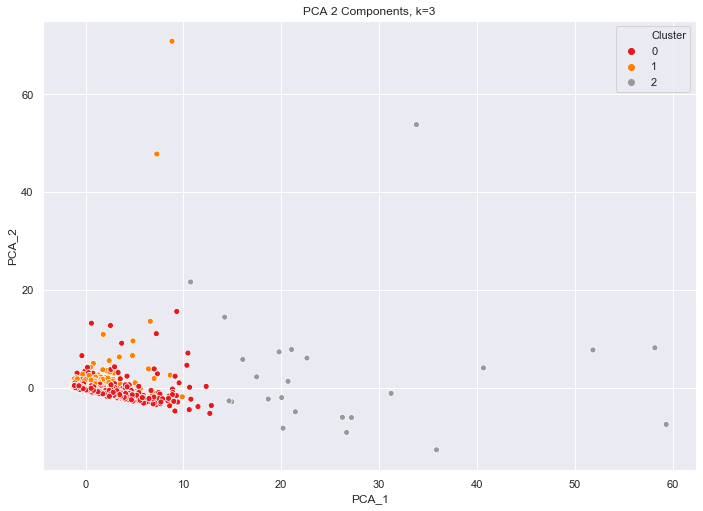

In [240]:
sns.scatterplot(x=df_pca2_k3['PCA_1'],y=df_pca2_k3['PCA_2'],hue=df_pca2_k3['Cluster'],palette='Set1',legend='full')
plt.title('PCA 2 Components, k=3');

### Fit X_pca2 into KMeans,k=4

In [241]:
df_pca2_k4= x_pca_df2.copy()
df_pca2_k4.head()

PCA_1  PCA_2  PCA_3  PCA_4  PCA_5  PCA_6  PCA_7  PCA_8  PCA_9  PCA_10  \
0  10.46   7.05  -7.46   4.78   2.15   0.68   1.42   0.13  -0.06    0.17   
1   0.80   0.95  -1.16  -4.13   0.11  -0.60  -1.00  -3.10  -2.05   -2.21   
2   0.02   1.19  -1.18  -3.98   0.87  -0.33  -0.60  -3.21  -2.12   -2.16   
3   0.34   1.43  -1.29  -4.09  -0.91  -1.28  -1.41   2.57   3.53   -0.96   
4  -0.92   1.59  -1.42  -3.92   1.17  -0.01  -1.58  -3.22  -2.13   -2.04   

   PCA_11  PCA_12  PCA_13  PCA_14  PCA_15  PCA_16  PCA_17  PCA_8  PCA_19  \
0    0.05    0.15    0.02    0.16    0.56   -0.94   -1.23  -0.55   -0.58   
1    0.01   -0.16   -0.03   -0.22    1.17    2.32   -0.99  -0.32   -0.17   
2    0.01   -0.14   -0.04   -0.22    1.49    2.26   -0.77  -0.09   -0.04   
3   -0.57   -0.71   -2.40   17.15    3.47   -0.23   -0.28  -0.18    0.74   
4   -0.01   -0.14   -0.06   -0.23    1.27    1.59   -0.22  -0.17   -0.16   

   PCA_20  PCA_21  
0    1.95    0.82  
1   -0.20   -0.09  
2    0.03   -0.11  
3    0.43    0.28  
4   -0.36   -0.09

In [242]:
# Fitting K-Means to the dataset using X_pca
km = KMeans(n_clusters = 4, init = 'k-means++',random_state=101)
label = km.fit_predict(X)

In [243]:
df_pca2_k4['Cluster']=label

In [244]:
print('df_pca2_k4 shape: ',df_pca2_k4.shape)
df_pca2_k4.head()

df_pca2_k4 shape:  (5878, 22)


PCA_1  PCA_2  PCA_3  PCA_4  PCA_5  PCA_6  PCA_7  PCA_8  PCA_9  PCA_10  \
0  10.46   7.05  -7.46   4.78   2.15   0.68   1.42   0.13  -0.06    0.17   
1   0.80   0.95  -1.16  -4.13   0.11  -0.60  -1.00  -3.10  -2.05   -2.21   
2   0.02   1.19  -1.18  -3.98   0.87  -0.33  -0.60  -3.21  -2.12   -2.16   
3   0.34   1.43  -1.29  -4.09  -0.91  -1.28  -1.41   2.57   3.53   -0.96   
4  -0.92   1.59  -1.42  -3.92   1.17  -0.01  -1.58  -3.22  -2.13   -2.04   

   PCA_11  PCA_12  PCA_13  PCA_14  PCA_15  PCA_16  PCA_17  PCA_8  PCA_19  \
0    0.05    0.15    0.02    0.16    0.56   -0.94   -1.23  -0.55   -0.58   
1    0.01   -0.16   -0.03   -0.22    1.17    2.32   -0.99  -0.32   -0.17   
2    0.01   -0.14   -0.04   -0.22    1.49    2.26   -0.77  -0.09   -0.04   
3   -0.57   -0.71   -2.40   17.15    3.47   -0.23   -0.28  -0.18    0.74   
4   -0.01   -0.14   -0.06   -0.23    1.27    1.59   -0.22  -0.17   -0.16   

   PCA_20  PCA_21  Cluster  
0    1.95    0.82        1  
1   -0.20   -0.09        3  
2    0.03   -0.11        3  
3    0.43    0.28        3  
4   -0.36   -0.09        3

In [245]:
grouped_clustter_pca2_k4=df_pca2_k4.groupby(['Cluster']).agg({
                                             'PCA_1':'mean',
                                             'PCA_2':'mean',
                                             'Cluster':'count'})
grouped_clustter_pca2_k4


PCA_1  PCA_2  Cluster
Cluster                       
0        27.91   3.60       22
1         2.17  -0.86     1113
2         8.05  59.26        2
3        -0.64   0.16     4741

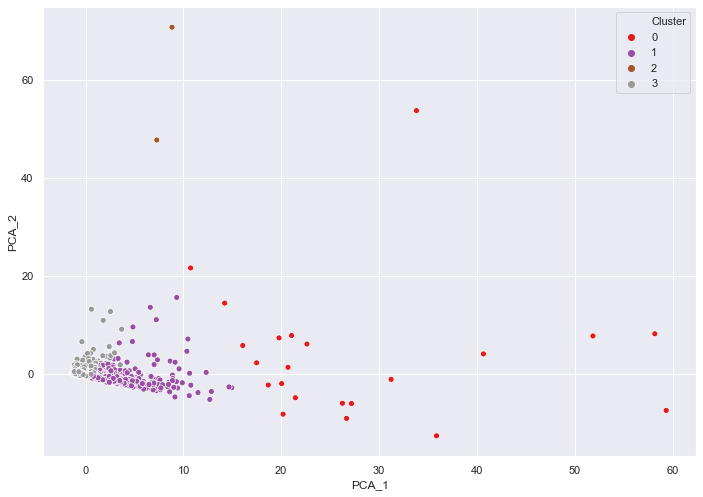

In [246]:
sns.scatterplot(x=df_pca2_k4['PCA_1'],y=df_pca2_k4['PCA_2'],hue=df_pca2_k4['Cluster'],palette='Set1',legend='full')


### Fit X_pca2 into KMeans,k=5

In [247]:
df_pca2_k5= x_pca_df2.copy()
df_pca2_k5.head()


PCA_1  PCA_2  PCA_3  PCA_4  PCA_5  PCA_6  PCA_7  PCA_8  PCA_9  PCA_10  \
0  10.46   7.05  -7.46   4.78   2.15   0.68   1.42   0.13  -0.06    0.17   
1   0.80   0.95  -1.16  -4.13   0.11  -0.60  -1.00  -3.10  -2.05   -2.21   
2   0.02   1.19  -1.18  -3.98   0.87  -0.33  -0.60  -3.21  -2.12   -2.16   
3   0.34   1.43  -1.29  -4.09  -0.91  -1.28  -1.41   2.57   3.53   -0.96   
4  -0.92   1.59  -1.42  -3.92   1.17  -0.01  -1.58  -3.22  -2.13   -2.04   

   PCA_11  PCA_12  PCA_13  PCA_14  PCA_15  PCA_16  PCA_17  PCA_8  PCA_19  \
0    0.05    0.15    0.02    0.16    0.56   -0.94   -1.23  -0.55   -0.58   
1    0.01   -0.16   -0.03   -0.22    1.17    2.32   -0.99  -0.32   -0.17   
2    0.01   -0.14   -0.04   -0.22    1.49    2.26   -0.77  -0.09   -0.04   
3   -0.57   -0.71   -2.40   17.15    3.47   -0.23   -0.28  -0.18    0.74   
4   -0.01   -0.14   -0.06   -0.23    1.27    1.59   -0.22  -0.17   -0.16   

   PCA_20  PCA_21  
0    1.95    0.82  
1   -0.20   -0.09  
2    0.03   -0.11  
3    0.43    0.28  
4   -0.36   -0.09

In [248]:
# Fitting K-Means to the dataset using X_pca
km = KMeans(n_clusters = 5, init = 'k-means++',random_state=101)
label = km.fit_predict(X)


In [249]:
df_pca2_k5['Cluster']=label

In [250]:
print('df_pca2_k5 shape: ',df_pca2_k5.shape)
df_pca2_k5.head()


df_pca2_k5 shape:  (5878, 22)


PCA_1  PCA_2  PCA_3  PCA_4  PCA_5  PCA_6  PCA_7  PCA_8  PCA_9  PCA_10  \
0  10.46   7.05  -7.46   4.78   2.15   0.68   1.42   0.13  -0.06    0.17   
1   0.80   0.95  -1.16  -4.13   0.11  -0.60  -1.00  -3.10  -2.05   -2.21   
2   0.02   1.19  -1.18  -3.98   0.87  -0.33  -0.60  -3.21  -2.12   -2.16   
3   0.34   1.43  -1.29  -4.09  -0.91  -1.28  -1.41   2.57   3.53   -0.96   
4  -0.92   1.59  -1.42  -3.92   1.17  -0.01  -1.58  -3.22  -2.13   -2.04   

   PCA_11  PCA_12  PCA_13  PCA_14  PCA_15  PCA_16  PCA_17  PCA_8  PCA_19  \
0    0.05    0.15    0.02    0.16    0.56   -0.94   -1.23  -0.55   -0.58   
1    0.01   -0.16   -0.03   -0.22    1.17    2.32   -0.99  -0.32   -0.17   
2    0.01   -0.14   -0.04   -0.22    1.49    2.26   -0.77  -0.09   -0.04   
3   -0.57   -0.71   -2.40   17.15    3.47   -0.23   -0.28  -0.18    0.74   
4   -0.01   -0.14   -0.06   -0.23    1.27    1.59   -0.22  -0.17   -0.16   

   PCA_20  PCA_21  Cluster  
0    1.95    0.82        4  
1   -0.20   -0.09        3  
2    0.03   -0.11        3  
3    0.43    0.28        3  
4   -0.36   -0.09        3

In [251]:
grouped_clustter_pca2_k5=df_pca2_k5.groupby(['Cluster']).agg({
                                             'PCA_1':'mean',
                                             'PCA_2':'mean',
                                             'Cluster':'count'})
grouped_clustter_pca2_k5


PCA_1  PCA_2  Cluster
Cluster                       
0        -0.53  -0.02     4730
1         8.05  59.26        2
2        42.53  10.12        7
3        -0.03   1.23      510
4         3.55  -1.14      629

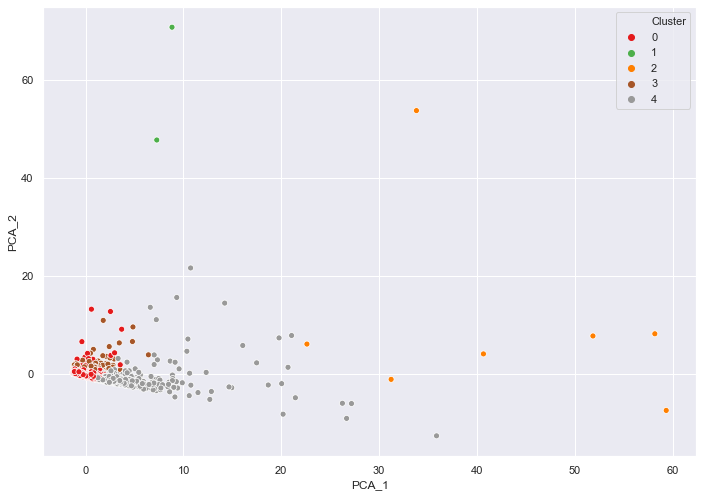

In [252]:
sns.scatterplot(x=df_pca2_k5['PCA_1'],y=df_pca2_k5['PCA_2'],hue=df_pca2_k5['Cluster'],palette='Set1',legend='full')

### Fit X_pca2 into KMeans,k=6

In [253]:
df_pca2_k6= x_pca_df2.copy()
df_pca2_k6.head()


PCA_1  PCA_2  PCA_3  PCA_4  PCA_5  PCA_6  PCA_7  PCA_8  PCA_9  PCA_10  \
0  10.46   7.05  -7.46   4.78   2.15   0.68   1.42   0.13  -0.06    0.17   
1   0.80   0.95  -1.16  -4.13   0.11  -0.60  -1.00  -3.10  -2.05   -2.21   
2   0.02   1.19  -1.18  -3.98   0.87  -0.33  -0.60  -3.21  -2.12   -2.16   
3   0.34   1.43  -1.29  -4.09  -0.91  -1.28  -1.41   2.57   3.53   -0.96   
4  -0.92   1.59  -1.42  -3.92   1.17  -0.01  -1.58  -3.22  -2.13   -2.04   

   PCA_11  PCA_12  PCA_13  PCA_14  PCA_15  PCA_16  PCA_17  PCA_8  PCA_19  \
0    0.05    0.15    0.02    0.16    0.56   -0.94   -1.23  -0.55   -0.58   
1    0.01   -0.16   -0.03   -0.22    1.17    2.32   -0.99  -0.32   -0.17   
2    0.01   -0.14   -0.04   -0.22    1.49    2.26   -0.77  -0.09   -0.04   
3   -0.57   -0.71   -2.40   17.15    3.47   -0.23   -0.28  -0.18    0.74   
4   -0.01   -0.14   -0.06   -0.23    1.27    1.59   -0.22  -0.17   -0.16   

   PCA_20  PCA_21  
0    1.95    0.82  
1   -0.20   -0.09  
2    0.03   -0.11  
3    0.43    0.28  
4   -0.36   -0.09

In [254]:
# Fitting K-Means to the dataset using X_pca
km = KMeans(n_clusters = 6, init = 'k-means++',random_state=101)
label = km.fit_predict(X)


In [255]:
df_pca2_k6['Cluster']=label

In [256]:
print('df_pca2_k6 shape: ',df_pca2_k6.shape)
df_pca2_k6.head()


df_pca2_k6 shape:  (5878, 22)


PCA_1  PCA_2  PCA_3  PCA_4  PCA_5  PCA_6  PCA_7  PCA_8  PCA_9  PCA_10  \
0  10.46   7.05  -7.46   4.78   2.15   0.68   1.42   0.13  -0.06    0.17   
1   0.80   0.95  -1.16  -4.13   0.11  -0.60  -1.00  -3.10  -2.05   -2.21   
2   0.02   1.19  -1.18  -3.98   0.87  -0.33  -0.60  -3.21  -2.12   -2.16   
3   0.34   1.43  -1.29  -4.09  -0.91  -1.28  -1.41   2.57   3.53   -0.96   
4  -0.92   1.59  -1.42  -3.92   1.17  -0.01  -1.58  -3.22  -2.13   -2.04   

   PCA_11  PCA_12  PCA_13  PCA_14  PCA_15  PCA_16  PCA_17  PCA_8  PCA_19  \
0    0.05    0.15    0.02    0.16    0.56   -0.94   -1.23  -0.55   -0.58   
1    0.01   -0.16   -0.03   -0.22    1.17    2.32   -0.99  -0.32   -0.17   
2    0.01   -0.14   -0.04   -0.22    1.49    2.26   -0.77  -0.09   -0.04   
3   -0.57   -0.71   -2.40   17.15    3.47   -0.23   -0.28  -0.18    0.74   
4   -0.01   -0.14   -0.06   -0.23    1.27    1.59   -0.22  -0.17   -0.16   

   PCA_20  PCA_21  Cluster  
0    1.95    0.82        2  
1   -0.20   -0.09        1  
2    0.03   -0.11        1  
3    0.43    0.28        1  
4   -0.36   -0.09        1

In [257]:
grouped_clustter_pca2_k6=df_pca2_k6.groupby(['Cluster']).agg({
                                             'PCA_1':'mean',
                                             'PCA_2':'mean',
                                             'Cluster':'count'})
grouped_clustter_pca2_k6

PCA_1  PCA_2  Cluster
Cluster                       
0        -0.65   0.04     4375
1         0.04   1.25      515
2         2.31  -0.99      967
3        33.81  53.74        1
4        29.96  -0.90       18
5         8.05  59.26        2

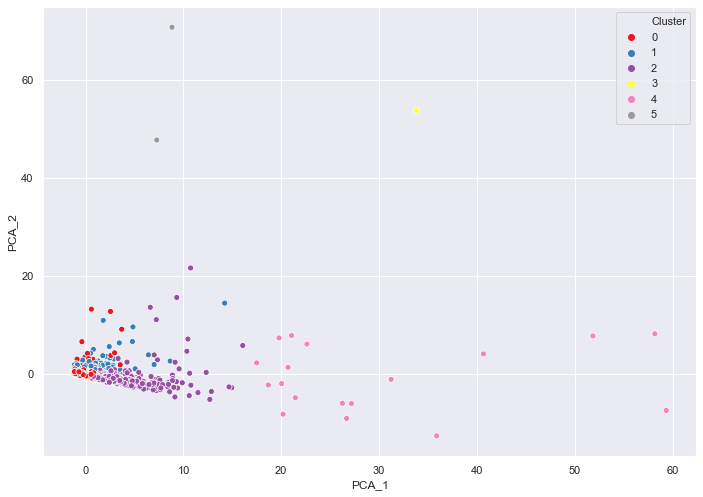

In [258]:
sns.scatterplot(x=df_pca2_k6['PCA_1'],y=df_pca2_k6['PCA_2'],hue=df_pca2_k6['Cluster'],palette='Set1',legend='full')

### Fit X_pca2 into KMeans,k=7

In [259]:
df_pca2_k7= x_pca_df2.copy()
df_pca2_k7.head()

PCA_1  PCA_2  PCA_3  PCA_4  PCA_5  PCA_6  PCA_7  PCA_8  PCA_9  PCA_10  \
0  10.46   7.05  -7.46   4.78   2.15   0.68   1.42   0.13  -0.06    0.17   
1   0.80   0.95  -1.16  -4.13   0.11  -0.60  -1.00  -3.10  -2.05   -2.21   
2   0.02   1.19  -1.18  -3.98   0.87  -0.33  -0.60  -3.21  -2.12   -2.16   
3   0.34   1.43  -1.29  -4.09  -0.91  -1.28  -1.41   2.57   3.53   -0.96   
4  -0.92   1.59  -1.42  -3.92   1.17  -0.01  -1.58  -3.22  -2.13   -2.04   

   PCA_11  PCA_12  PCA_13  PCA_14  PCA_15  PCA_16  PCA_17  PCA_8  PCA_19  \
0    0.05    0.15    0.02    0.16    0.56   -0.94   -1.23  -0.55   -0.58   
1    0.01   -0.16   -0.03   -0.22    1.17    2.32   -0.99  -0.32   -0.17   
2    0.01   -0.14   -0.04   -0.22    1.49    2.26   -0.77  -0.09   -0.04   
3   -0.57   -0.71   -2.40   17.15    3.47   -0.23   -0.28  -0.18    0.74   
4   -0.01   -0.14   -0.06   -0.23    1.27    1.59   -0.22  -0.17   -0.16   

   PCA_20  PCA_21  
0    1.95    0.82  
1   -0.20   -0.09  
2    0.03   -0.11  
3    0.43    0.28  
4   -0.36   -0.09

In [260]:
# Fitting K-Means to the dataset using X_pca
km = KMeans(n_clusters = 7, init = 'k-means++',random_state=101)
label = km.fit_predict(X)

In [261]:
df_pca2_k7['Cluster']=label

In [262]:
print('df_pca2_k7 shape: ',df_pca2_k7.shape)
df_pca2_k7.head()

df_pca2_k7 shape:  (5878, 22)


PCA_1  PCA_2  PCA_3  PCA_4  PCA_5  PCA_6  PCA_7  PCA_8  PCA_9  PCA_10  \
0  10.46   7.05  -7.46   4.78   2.15   0.68   1.42   0.13  -0.06    0.17   
1   0.80   0.95  -1.16  -4.13   0.11  -0.60  -1.00  -3.10  -2.05   -2.21   
2   0.02   1.19  -1.18  -3.98   0.87  -0.33  -0.60  -3.21  -2.12   -2.16   
3   0.34   1.43  -1.29  -4.09  -0.91  -1.28  -1.41   2.57   3.53   -0.96   
4  -0.92   1.59  -1.42  -3.92   1.17  -0.01  -1.58  -3.22  -2.13   -2.04   

   PCA_11  PCA_12  PCA_13  PCA_14  PCA_15  PCA_16  PCA_17  PCA_8  PCA_19  \
0    0.05    0.15    0.02    0.16    0.56   -0.94   -1.23  -0.55   -0.58   
1    0.01   -0.16   -0.03   -0.22    1.17    2.32   -0.99  -0.32   -0.17   
2    0.01   -0.14   -0.04   -0.22    1.49    2.26   -0.77  -0.09   -0.04   
3   -0.57   -0.71   -2.40   17.15    3.47   -0.23   -0.28  -0.18    0.74   
4   -0.01   -0.14   -0.06   -0.23    1.27    1.59   -0.22  -0.17   -0.16   

   PCA_20  PCA_21  Cluster  
0    1.95    0.82        0  
1   -0.20   -0.09        3  
2    0.03   -0.11        3  
3    0.43    0.28        3  
4   -0.36   -0.09        3

In [263]:
grouped_clustter_pca2_k7=df_pca2_k7.groupby(['Cluster']).agg({
                                             'PCA_1':'mean',
                                             'PCA_2':'mean',
                                             'Cluster':'count'})
grouped_clustter_pca2_k7


PCA_1  PCA_2  Cluster
Cluster                       
0         2.18  -0.87     1101
1         0.03   0.76       27
2         8.05  59.26        2
3        -0.64   0.15     4687
4        29.22  -0.55       19
5        19.59  29.90        3
6        -0.29   1.19       39

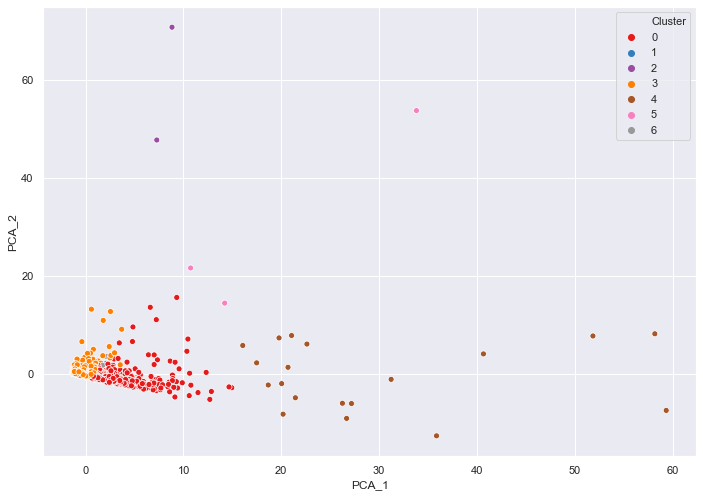

In [264]:
sns.scatterplot(x=df_pca2_k7['PCA_1'],y=df_pca2_k7['PCA_2'],hue=df_pca2_k7['Cluster'],palette='Set1',legend='full')

<font color=darkblue> When using Recency, Frequency and Monetary value as features, below is the clustters formed using KMeans and KMeans with PCA:
    
- k=3
    
|Cluster|KMeans|KMeans with PCA|
|:------|:------|:------|
|0|1,735|2|
|1|24|24|
|2|4,119|5,852|
    
- k=4
    
|Cluster|KMeans|KMeans with PCA|
|:------|:------|:------|
|0|22|22|
|1|1,736|1,773|
|2|2|2|
|3|4,118|4,081|
    
    
- k=5
    
|Cluster|KMeans|KMeans with PCA|
|:------|:------|:------|
|0|4,216|4,108|
|1|1,640|1,748|
|2|19|19|
|3|2|2|
|4|1|1|
    
    
- k=6

    
|Cluster|KMeans|KMeans with PCA|
|:------|:------|:------|
|0|3,986|3,990|
|1|1,610|1,758|
|2|154|106|
|3|106|19|
|4|20|3|
|5|2|2|

- k=7
    
|Cluster|KMeans|KMeans with PCA|
|:------|:------|:------|
|0|3,646|3,743|
|1|1,672|1,590|
|2|518|369|
|3|35|155|
|4|4|18|
|5|2|2|
|6|1|1|

The clusters formed using KMeans and KMeans with PCA differs.<br>PCA has an impact on the clusters formed when uisng other customers attributes.

# Conclusion & Recommendation


<font color=darkblue>
    
In this project, unsupervised learning method ie DBScan, KMeans and KMeans with PCA has been used and KMeans clustering gives a more intuitive, explainable cluster .<br>
    
When using Customers' Recency, Frequency and Monetary as Features, the appropriate clusters formed with KMeans at k=5 where there are:<br>
    
- Cluster 0 has purchased (3,561 Observations)==>**Hybernating**
    - quite sometimes ago (mean: last purchased at past 76 days)
    - not frequent (mean: 5 transactions)
    - spending a little (mean: $ 1,878)<br>
    
- Cluster 1 has purchased (1,914 Observations)==>**Needs Attention/Loosing Soon**
    - very long ago (mean: last purchased at past 472 days)
    - not frequent (mean: 2 transactions)
    - spending the least (mean: $ 739) <br>    
    
- Cluster 2 has purchased (24 Observations)==>**Loyal/Core Customers**
    - quite recently (mean: last purchased at past 23 days)
    - quite frequent (mean: 120 transactions)
    - spending a lot (mean: $ 98,957) <br>
    
- Cluster 3 has purchased (4 Observations)==> **Best Customer/Outliers**
    - very recently (mean: last purchased at past 3.75 days)
    - very frequent (mean: 213 transactions)
    - spending the most (mean: $ 428,612) <br>
    
- Cluster 4 has purchased (375 Observations)==>**Rookies/Potential Loyal**
    - quite recently (mean: last purchased at past 29 days)
    - not so frequent (mean: 29 transactions)
    - spending moderately (mean: $ 13,663) <br><br><br>


However, when using all Customers' attribute as Features, the appropriate clusters formed with KMeans at k=6 where there are:<br>

- Cluster 0 has purchased (3,986 Observations)==>**Hybernating**
    - quite sometimes ago (mean: last purchased at past 266 days)
    - not frequent (mean: 3 transactions)
    - spending the least (mean: $ 769)
    - distance between first purchase date and last purchase date (mean:147 days)<br>
    
- Cluster 1 has purchased (1,610 Observations)==>**Potential Loyal**
    - quite recent (mean: last purchased at past 48 days)
    - quite frequent (mean: 14 transactions)
    - spending moderately (mean: $ 6,048) 
    - distance between first purchase date and last purchase date (mean:590 days)<br>    
    
- Cluster 2 has purchased (154 Observations)==>**Needs Attention**
    - quite sometimes ago (mean: last purchased at past 230 days)
    - not frequent (mean: 4 transactions)
    - spending moderately (mean: $ 2,932)
    - distance between first purchase date and last purchase date (mean:207 days)<br>
    
- Cluster 3 has purchased (20 Observations)==> **Loyal**
    - very recently (mean: last purchased at past 25 days)
    - very frequent (mean: 146 transactions)
    - spending the most (mean: $ 183,568)
    - distance between first purchase date and last purchase date (mean:661 days)<br>
    
- Cluster 4 has purchased (2 Observations)==>**Lost/ Whale**
    - very long ago (mean: last purchased at past 629 days)
    - not so frequent (mean: 2 transactions)
    - spending moderately (mean: $ 12,435) 
    - distance between first purchase date and last purchase date (mean:1 days)<br>
    
- Cluster 4 has purchased (106 Observations)==>**About to Sleep**
    - quite sometimes ago (mean: last purchased at past 132 days)
    - moderately frequent (mean: 7 transactions)
    - spending moderately (mean: $ 4,009)
    - distance between first purchase date and last purchase date (mean:305 days)
    
    
Based on the above 2 types of clustering, stakeholder should discuss to decide on which attributes and k value to be used. <br>

After this unsupervised machine learning has learnt on features, number of cluster and labeled clusters, supervised machine learning like classification can be done for new data.<br>

Further work can be done on clustering and categorizing products into a few categories and include items purchased as one of the features in KMeans Clustering.

# Reference

1. https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf
2. https://towardsdatascience.com/cluster-analysis-create-visualize-and-interpret-customer-segments-474e55d00ebb
3. https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea
4. http://benalexkeen.com/principle-component-analysis-in-python/
5. https://www.putler.com/rfm-analysis/
    